In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('data.csv')
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
# Lets drop the unnamed column. It's just the index.

data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
# Here, our target column is label
# Rest, all others are features
# It is a binary classification problem

In [8]:
# final dataset
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


# Basic Insight into Data

In [9]:
data.shape

(209593, 36)

In [10]:
data.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

The description of all the columns has been provided in the documentation

In [11]:
data.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [12]:
# Note that the date column is in object data type. Let's parse it into proper format

In [4]:
data['pdate']=pd.to_datetime(data['pdate'])

In [5]:
data['pdate'].dtype

dtype('<M8[ns]')

In [6]:
data['pdate'].head()

0   2016-07-20
1   2016-08-10
2   2016-08-19
3   2016-06-06
4   2016-06-22
Name: pdate, dtype: datetime64[ns]

In [5]:
# Let's make the name of the columns more readable
cols=['label', 'mobile', 'age_on_net', 'daily_decr_30', 'daily_decr_90', 'rental_30',
       'rental_90', 'last_rech_days_main', 'last_rech_days_data',
       'last_rech_amt_main', 'cnt_main_rech_30', 'freq_main_rech_30',
       'sum_amt_main_rech_30', 'median_amt_main_rech_30', 'median_main_rech_prebal_30',
       'cnt_main_rech_90', 'freq_main_rech_90', 'sum_amt_main_rech_90',
       'median_amt_main_rech_90', 'median_main_rech_prebal_90', 'cnt_data_rech_30',
       'freq_data_rech_30', 'cnt_data_rech_90', 'freq_data_rech_90', 'cnt_loans_30',
       'amt_loans_30', 'max_amt_loans_30', 'median_amt_loans_30', 'cnt_loans_90',
       'amt_loans_90', 'max_amt_loans_90', 'median_amt_loans_90', 'payback_30',
       'payback_90', 'pcircle', 'pdate']

data.columns=cols

In [17]:
data.head()

,label,mobile,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_days_data,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_data_rech_30,freq_data_rech_30,cnt_data_rech_90,freq_data_rech_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans90,payback_30,payback_90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [21]:
# data range available in terms of date
# starting point
data['pdate'].min()

Timestamp('2016-06-01 00:00:00')

In [22]:
# ending point
data['pdate'].max()

Timestamp('2016-08-21 00:00:00')

In [7]:
# Lets look at the summary of the data

data.describe()

,label,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_days_data,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_data_rech_30,freq_data_rech_30,cnt_data_rech_90,freq_data_rech_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans90,payback_30,payback_90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [35]:
# First of all, there are no missing values

# Looking at the results of describe, we can say that something is fishy in:

# age_on_net (min is -ve and max is too large, also days can't be in fraction)

# daily_dec_30, daily_dec_90, rental_30, rental_90 (all has -ve min and way too large max)

# last_rech_days_main, last_rech_days_data (unusual min and max values, also days can't be in fraction)

# last_rech_amt_main (how the value of recharge can be 0, also very high maxm)

# cnt_main_rech_30, freq_main_rech_30 (unusually high values)

# sum_amt_main_rech_30, median_amt_main_rech_30 (unusually high values)

# median_main_rech_prebal_30 (-ve min and too high max)

# cnt_main_rech_90, freq_main_rech_90 (unusually high values)

# sum_amt_main_rech_90, median_amt_main_rech_90 (unusually high values)

# median_main_rech_prebal_90 (-ve min and too high max)

# cnt_data_rech_30, freq_data_rech_30 (most of the values are 0 but still max is very very high, count in fraction)

# cnt_data_rech_90, freq_data_rech_90 (most of the values are 0 but still max is high)

# cnt_loans_30, amt_loans_30 (max values are little high)

# max_amt_loans_30 (max is tooo high)

# median_amt_loans_30 (how can the max of median be 3)
# That means probably a lot of people didn't even take any loan

# cnt_loans_90 (max is very high, also count can't be fraction), amt_loans_90 (max is a little high)
              
# payback_30, payback_90 (max is too high)
              
# Also check whether there are fraction values in the count columns

In [88]:
# Let's look carefully at data and ensure whether it makes sense or not!

data[data['age_on_net']<=0].shape

(1539, 36)

In [25]:
# There are 1539 (0.734 % of total) rows having negative age, which is not possible

In [89]:
data[data['age_on_net']>=20000].shape

(2089, 36)

In [27]:
# There were no telephones 54 years ago
# The maximum number of days on network could be around 5110 (14 years before 2016)
# There were no cell phones before 2002 (as per internet articles)

In [90]:
data[data['age_on_net']>=5110].shape

(2089, 36)

In [29]:
# There are 2089 rows, where the days exceeds the logical value
# Also, days can't be in fraction

In [6]:
# checking out elements with fractional entry
index=[]
for i in range(len(data['age_on_net'])):
    if int(data['age_on_net'].iloc[i]) < data['age_on_net'].iloc[i]:
        index.append(i)

In [7]:
len(index)

2089

In [38]:
# There are exactly 2089 values which have fractional value of days (which is not possible)

In [91]:
data.iloc[index, :].shape

(2089, 36)

In [44]:
# Lets check whether these are the same values where the values are unusually high
data[data['age_on_net']>=5110].equals(data.iloc[index, :])


True

In [43]:
# These 2089 (0.996 %) values are errorous

In [92]:
data[data['daily_decr_30']<0].shape

(1839, 36)

In [47]:
# 0.87 % rows has negative value

In [93]:
data[data['daily_decr_90']<0].shape

(1839, 36)

In [49]:
data[data['daily_decr_30']<0].equals(data[data['daily_decr_90']<0])

True

In [50]:
# The same rows have -ve values in both daily_decr_30 and daily_decr_90

In [53]:
print(np.percentile(data['daily_decr_30'],75))
print(np.percentile(data['daily_decr_30'],80))
print(np.percentile(data['daily_decr_30'],90))
print(np.percentile(data['daily_decr_30'],95))
print(np.percentile(data['daily_decr_30'],99))
print(np.percentile(data['daily_decr_30'],99.9))

7244.0
9231.0
15590.802000000018
22577.499999999985
41730.43999999977
81874.69305067201


In [55]:
print(np.percentile(data['daily_decr_90'],75))
print(np.percentile(data['daily_decr_90'],80))
print(np.percentile(data['daily_decr_90'],90))
print(np.percentile(data['daily_decr_90'],95))
print(np.percentile(data['daily_decr_90'],99))
print(np.percentile(data['daily_decr_90'],99.9))

7802.79000000001
10120.78
17785.731999999993
26244.257999999994
49967.38359999991
98429.94856000491


In [56]:
# Values after 99 percentile are extremely large

In [59]:
data[data['daily_decr_30']>22578].shape

(10480, 36)

In [60]:
data[data['daily_decr_30']>41731].shape

(2096, 36)

In [61]:
# 2096 rows have value greater than 99 percentile in daily_decr_30

In [62]:
data[data['daily_decr_30']>49967].shape

(1185, 36)

In [63]:
# 1185 rows have value greater than 99 percentile in daily_decr_90

In [57]:
# There are for sure some outliers in these columns

In [67]:
# Also, if rental_30 is the average main balance, it should not be too less than daily average spend

(data['rental_30'] >= data['daily_decr_30']).sum()

104476

In [68]:
# In around half of our data, daily spend is greater than average balance
# How is this possible
# Also take in consideration all the loans taken by customer in last 30 days

# Also, if rental_30 is the average main balance, it should not be too less than daily average spend

((data['rental_30'] + data['amt_loans_30']) >= data['daily_decr_30']).sum()

105825

In [69]:
# Still the number is pretty much the same
# Not sure of how the average balance and daily spend are being calculated

In [70]:
# Also, daily spend should be less than total amount of rechrges in last 30 days ()

(data['sum_amt_main_rech_30'] >= data['daily_decr_30']).sum()

124849

In [71]:
# Around 40% of our data has daily spend more than total amount of recharges done
# How is this possible
# Is it becuase of the loans taken?

((data['sum_amt_main_rech_30'] + data['amt_loans_30']) >= data['daily_decr_30']).sum()

130793

In [72]:
# Nope, still 38% of the values are logically incorrect

In [74]:
data[data['rental_30']<0].shape

(5628, 36)

In [75]:
data[data['rental_90']<0].shape

(5929, 36)

In [76]:
# How come the average main account balance is negative

data[data['rental_30']<0].head()

,label,mobile,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_days_data,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_data_rech_30,freq_data_rech_30,cnt_data_rech_90,freq_data_rech_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans90,payback_30,payback_90,pcircle,pdate
24,0,59645I82735,966.0,291.563333,291.563333,-2020.09,-2020.09,0.0,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-06-23
41,1,85580I70784,545.0,113.750000,113.750000,-110.75,-110.75,6.0,0.0,4048,2,9.0,12048.0,6024.0,45.00,2,9,12048,6024.0,45.00,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,12.0,12.0,UPW,2016-06-25
77,1,98388I70377,383.0,1219.782000,1238.740000,-889.14,-919.80,22.0,0.0,3178,1,0.0,3178.0,3178.0,0.50,1,0,3178,3178.0,0.50,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-07-01
116,1,73365I70375,157.0,63.720000,63.720000,-177.48,-177.48,0.0,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.0,0.0,UPW,2016-06-18
117,1,41894I84454,1140.0,23.833333,23.833333,-40.20,-40.20,6.0,0.0,1547,1,0.0,1547.0,1547.0,24.14,2,34,2494,1247.0,52.14,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,5.0,5.0,UPW,2016-06-05


In [77]:
# The -ve values are definitely not because of loan amount
# It may be due to human error
# Maybe the -ve sign is just a mistake

In [80]:
print(np.percentile(data['rental_30'],75))
print(np.percentile(data['rental_30'],80))
print(np.percentile(data['rental_30'],90))
print(np.percentile(data['rental_30'],95))
print(np.percentile(data['rental_30'],99))
print(np.percentile(data['rental_30'],99.9))
print(np.percentile(data['rental_30'],99.99))

3356.94
4199.12
7321.698
11166.419999999998
19461.376399999943
36847.581920000266
64921.547519993495


In [81]:
print(np.percentile(data['rental_90'],75))
print(np.percentile(data['rental_90'],80))
print(np.percentile(data['rental_90'],90))
print(np.percentile(data['rental_90'],95))
print(np.percentile(data['rental_90'],99))
print(np.percentile(data['rental_90'],99.9))
print(np.percentile(data['rental_90'],99.99))

4201.79
5293.937999999997
9506.848000000004
14642.973999999995
26997.96799999999
48755.00024000065
87980.41751198556


In [82]:
# values after 99 percentile are very large
print(data[data['rental_30']>19462].shape)
print(data[data['rental_90']>26998].shape)

(2096, 36)
(2096, 36)


In [84]:
data[data['rental_30']>19462].equals(data[data['rental_90']>26998])

False

In [85]:
data[data['last_rech_days_main']<0].shape

(1315, 36)

In [102]:
data[data['last_rech_days_main']==0].shape

(20743, 36)

In [103]:
# The value zero should mean that they have recharged today only

In [86]:
data[data['last_rech_days_data']<0].shape

(14, 36)

In [104]:
data[data['last_rech_days_data']==0].shape

(202861, 36)

In [105]:
# Does this mean that almost all the customers recharged their account today only
# Something seems fishy here

In [94]:
print(np.percentile(data['last_rech_days_main'],75))
print(np.percentile(data['last_rech_days_main'],80))
print(np.percentile(data['last_rech_days_main'],90))
print(np.percentile(data['last_rech_days_main'],95))
print(np.percentile(data['last_rech_days_main'],99))
print(np.percentile(data['last_rech_days_main'],99.9))
print(np.percentile(data['last_rech_days_main'],99.99))

7.0
9.0
15.0
25.0
57.0
904737.6438658878
989181.0510047683


In [95]:
print(np.percentile(data['last_rech_days_data'],75))
print(np.percentile(data['last_rech_days_data'],80))
print(np.percentile(data['last_rech_days_data'],90))
print(np.percentile(data['last_rech_days_data'],95))
print(np.percentile(data['last_rech_days_data'],99))
print(np.percentile(data['last_rech_days_data'],99.9))
print(np.percentile(data['last_rech_days_data'],99.99))

0.0
0.0
0.0
0.0
56.0
897311.0982552234
985868.0385246838


In [96]:
# Values after 99 percentile does not make sense

print(data[data['last_rech_days_main']>57].shape)
print(data[data['last_rech_days_data']>56].shape)

(2046, 36)
(2077, 36)


In [10]:
# Also, we'll check the number of fraction values present in this column

indexa=[]
for i in range(len(data['last_rech_days_data'])):
    if int(data['last_rech_days_data'].iloc[i]) < data['last_rech_days_data'].iloc[i]:
        indexa.append(i)
        
len(indexa)

1047

In [11]:
indexb=[]
for i in range(len(data['last_rech_days_main'])):
    if int(data['last_rech_days_main'].iloc[i]) < data['last_rech_days_main'].iloc[i]:
        indexb.append(i)
        
len(indexb)

1047

In [220]:
data.iloc[indexa, :].equals(data.iloc[indexb, :])

False

In [100]:
data[data['last_rech_amt_main']==0].shape

(20995, 36)

In [101]:
data[data['last_rech_amt_main']==0].head()

,label,mobile,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_days_data,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_data_rech_30,freq_data_rech_30,cnt_data_rech_90,freq_data_rech_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans90,payback_30,payback_90,pcircle,pdate
15,0,24075I89239,1037.0,12.000000,12.000000,1216.80,1216.80,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-06-24
16,0,82053I85350,1583.0,1000.000000,1000.000000,1000.80,1087.88,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-07-04
17,1,37204I84452,929.0,10.688000,10.688000,40.00,40.00,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-06-16
24,0,59645I82735,966.0,291.563333,291.563333,-2020.09,-2020.09,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-06-23
32,1,78260I85349,191.0,5.266667,5.266667,1741.50,1741.50,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-06-10


In [108]:
data[(data['last_rech_amt_main']==0) & (data['last_rech_days_main']==0)].shape

(20729, 36)

In [109]:
# There are 20729 rows where the number of days since last rech is 0 (logically, which means today)
# and at the same time, the amount of recharge is also 0
# Not possible
# Something is wrong

In [110]:
print(np.percentile(data['last_rech_amt_main'],75))
print(np.percentile(data['last_rech_amt_main'],80))
print(np.percentile(data['last_rech_amt_main'],90))
print(np.percentile(data['last_rech_amt_main'],95))
print(np.percentile(data['last_rech_amt_main'],99))
print(np.percentile(data['last_rech_amt_main'],99.9))
print(np.percentile(data['last_rech_amt_main'],99.99))

2309.0
2309.0
4067.0
8000.0
10000.0
16000.0
55000.0


In [111]:
# The values after 99.9 percentile are very high

In [112]:
print(data[data['last_rech_amt_main']>10000].shape)
print(data[data['last_rech_amt_main']>16000].shape)

(1519, 36)
(101, 36)


In [113]:
print(np.percentile(data['cnt_main_rech_30'],75))
print(np.percentile(data['cnt_main_rech_30'],80))
print(np.percentile(data['cnt_main_rech_30'],90))
print(np.percentile(data['cnt_main_rech_30'],95))
print(np.percentile(data['cnt_main_rech_30'],99))
print(np.percentile(data['cnt_main_rech_30'],99.9))
print(np.percentile(data['cnt_main_rech_30'],99.99))

5.0
6.0
9.0
12.0
20.0
35.0
55.0


In [114]:
print(data[data['cnt_main_rech_30']>20].shape)
print(data[data['cnt_main_rech_30']>35].shape)
print(data[data['cnt_main_rech_30']>55].shape)

(1762, 36)
(189, 36)
(20, 36)


In [12]:
# Lets check are there any fraction values

indexc=[]
for i in range(len(data['cnt_main_rech_30'])):
    if int(data['cnt_main_rech_30'].iloc[i]) < data['cnt_main_rech_30'].iloc[i]:
        indexc.append(i)
        
len(indexc)

0

In [116]:
print(np.percentile(data['freq_main_rech_30'],75))
print(np.percentile(data['freq_main_rech_30'],80))
print(np.percentile(data['freq_main_rech_30'],90))
print(np.percentile(data['freq_main_rech_30'],95))
print(np.percentile(data['freq_main_rech_30'],99))
print(np.percentile(data['freq_main_rech_30'],99.9))
print(np.percentile(data['freq_main_rech_30'],99.99))

6.0
7.0
12.0
16.0
26.0
891741.2799587618
986291.6918060653


In [117]:
print(data[data['freq_main_rech_30']>26].shape)

(2080, 36)


In [122]:
# Lets zoom in between 99.00 and 99.90
print(np.percentile(data['freq_main_rech_30'],99.1))
print(np.percentile(data['freq_main_rech_30'],99.2))
print(np.percentile(data['freq_main_rech_30'],99.3))
print(np.percentile(data['freq_main_rech_30'],99.4))
print(np.percentile(data['freq_main_rech_30'],99.5))
print(np.percentile(data['freq_main_rech_30'],99.51))
print(np.percentile(data['freq_main_rech_30'],99.6))

27.0
28.0
29.0
35.0
38.0
508989.2266028624
601426.8251415365


In [119]:
print(data[data['freq_main_rech_30']>38].shape)

(1047, 36)


In [13]:
# Lets also check for non fraction values

indexd=[]
for i in range(len(data['freq_main_rech_30'])):
    if int(data['freq_main_rech_30'].iloc[i]) < data['freq_main_rech_30'].iloc[i]:
        indexd.append(i)
        
len(indexd)

1047

In [125]:
data[data['freq_main_rech_30']>38].equals(data.iloc[indexd, :])

True

In [126]:
print(np.percentile(data['sum_amt_main_rech_30'],75))
print(np.percentile(data['sum_amt_main_rech_30'],80))
print(np.percentile(data['sum_amt_main_rech_30'],90))
print(np.percentile(data['sum_amt_main_rech_30'],95))
print(np.percentile(data['sum_amt_main_rech_30'],99))
print(np.percentile(data['sum_amt_main_rech_30'],99.9))
print(np.percentile(data['sum_amt_main_rech_30'],99.99))

10010.0
11849.0
17892.0
24837.0
46857.43999999977
96000.0
160955.8039999909


In [127]:
print(data[data['sum_amt_main_rech_30']>24837].shape)
print(data[data['sum_amt_main_rech_30']>46858].shape)

(10479, 36)
(2096, 36)


In [128]:
print(np.percentile(data['median_amt_main_rech_30'],75))
print(np.percentile(data['median_amt_main_rech_30'],80))
print(np.percentile(data['median_amt_main_rech_30'],90))
print(np.percentile(data['median_amt_main_rech_30'],95))
print(np.percentile(data['median_amt_main_rech_30'],99))
print(np.percentile(data['median_amt_main_rech_30'],99.9))
print(np.percentile(data['median_amt_main_rech_30'],99.99))

1924.0
2309.0
4048.0
7526.0
10000.0
12500.0
32000.0


In [130]:
# Lets zoom in between 99.90 and 99.99
print(np.percentile(data['median_amt_main_rech_30'],99.91))
print(np.percentile(data['median_amt_main_rech_30'],99.92))
print(np.percentile(data['median_amt_main_rech_30'],99.93))
print(np.percentile(data['median_amt_main_rech_30'],99.94))
print(np.percentile(data['median_amt_main_rech_30'],99.95))
print(np.percentile(data['median_amt_main_rech_30'],99.96))

12500.0
13000.0
13944.568400000077
16000.0
16000.0
16000.0


In [132]:
print(data[data['median_amt_main_rech_30']>10000].shape)
print(data[data['median_amt_main_rech_30']>12500].shape)
print(data[data['median_amt_main_rech_30']>16000].shape)

(942, 36)
(175, 36)
(72, 36)


In [133]:
print(data[data['median_main_rech_prebal_30']<0].shape)
print(data[data['median_main_rech_prebal_30']==0].shape)

(1646, 36)
(30680, 36)


In [134]:
data[data['median_main_rech_prebal_30']<0].head()

,label,mobile,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_days_data,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_data_rech_30,freq_data_rech_30,cnt_data_rech_90,freq_data_rech_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans90,payback_30,payback_90,pcircle,pdate
234,1,90696I95203,231.0,19576.000000,22653.000000,9448.16,9698.07,6.0,0.0,3178,4,6.0,10204.0,2551.0,-186.50,5,23,12128,1924.0,-191.00,0.0,0.0,0,0,3,30,12.0,0.0,3.0,30,12,0.0,3.500000,3.500000,UPW,2016-08-16
332,0,06194I70378,595.0,115.877667,115.877667,1652.56,1652.56,6.0,0.0,8000,1,0.0,8000.0,8000.0,-192.77,1,0,8000,8000.0,-192.77,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-13
588,1,33621I84458,1935.0,2505.519667,2516.330000,284.43,312.22,2.0,0.0,773,4,12.0,6367.0,773.0,-170.20,4,12,6367,773.0,-170.20,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,12.666667,12.666667,UPW,2016-07-07
617,1,03916I90845,874.0,3936.389667,4033.790000,475.70,779.70,9.0,0.0,2309,3,4.0,6157.0,2309.0,-177.40,11,1,22114,2309.0,-108.40,0.0,0.0,0,0,4,24,6.0,0.0,7.0,42,6,0.0,4.666667,3.333333,UPW,2016-07-19
627,1,45970I70781,630.0,772.303667,797.010000,55.88,152.40,26.0,0.0,770,1,0.0,770.0,770.0,-118.60,3,2,3852,773.0,-179.60,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-19


In [135]:
print(np.percentile(data['median_main_rech_prebal_30'],75))
print(np.percentile(data['median_main_rech_prebal_30'],80))
print(np.percentile(data['median_main_rech_prebal_30'],90))
print(np.percentile(data['median_main_rech_prebal_30'],95))
print(np.percentile(data['median_main_rech_prebal_30'],99))
print(np.percentile(data['median_main_rech_prebal_30'],99.9))
print(np.percentile(data['median_main_rech_prebal_30'],99.99))

83.0
104.13600000000005
237.39400000000052
402.4
1331.5399999999936
907696.1305681639
985633.2462235299


In [136]:
print(data[data['median_main_rech_prebal_30']> 403].shape)
print(data[data['median_main_rech_prebal_30']>1332].shape)

(10443, 36)
(2095, 36)


In [142]:
# Lets zoom in between 99.0 and 99.90
print(np.percentile(data['median_main_rech_prebal_30'],99.1))
print(np.percentile(data['median_main_rech_prebal_30'],99.2))
print(np.percentile(data['median_main_rech_prebal_30'],99.3))
print(np.percentile(data['median_main_rech_prebal_30'],99.4))
print(np.percentile(data['median_main_rech_prebal_30'],99.48))
print(np.percentile(data['median_main_rech_prebal_30'],99.5))
print(np.percentile(data['median_main_rech_prebal_30'],99.6))

1546.1834399999889
1867.5711999999855
2424.7311999999974
3656.948000000033
7197.626560001104
27573.396000000324
598473.2787581179


In [143]:
print(data[data['median_main_rech_prebal_30']> 3657].shape)
print(data[data['median_main_rech_prebal_30']>7198].shape)

(1258, 36)
(1090, 36)


In [146]:
print(np.percentile(data['cnt_main_rech_90'],75))
print(np.percentile(data['cnt_main_rech_90'],80))
print(np.percentile(data['cnt_main_rech_90'],90))
print(np.percentile(data['cnt_main_rech_90'],95))
print(np.percentile(data['cnt_main_rech_90'],99))
print(np.percentile(data['cnt_main_rech_90'],99.9))
print(np.percentile(data['cnt_main_rech_90'],99.95))
print(np.percentile(data['cnt_main_rech_90'],99.99))
print(np.percentile(data['cnt_main_rech_90'],99.999))

8.0
10.0
15.0
20.0
33.0
60.0
70.0
93.04079999998794
149.94487999976263


In [149]:
print(data[data['cnt_main_rech_90']> 33].shape)
print(data[data['cnt_main_rech_90']> 60].shape)
print(data[data['cnt_main_rech_90']>70].shape)
print(data[data['cnt_main_rech_90']> 90].shape)
# It does not make sense that someone would recharge more than once on an average

(2055, 36)
(200, 36)
(101, 36)
(26, 36)


In [14]:
# Lets check are there any fraction values

indexe=[]
for i in range(len(data['cnt_main_rech_90'])):
    if int(data['cnt_main_rech_90'].iloc[i]) < data['cnt_main_rech_90'].iloc[i]:
        indexe.append(i)
        
len(indexe)

0

In [151]:
print(np.percentile(data['freq_main_rech_90'],75))
print(np.percentile(data['freq_main_rech_90'],80))
print(np.percentile(data['freq_main_rech_90'],90))
print(np.percentile(data['freq_main_rech_90'],95))
print(np.percentile(data['freq_main_rech_90'],99))
print(np.percentile(data['freq_main_rech_90'],99.9))
print(np.percentile(data['freq_main_rech_90'],99.99))

8.0
11.0
30.0
37.0
54.0
74.0
85.0


In [153]:
print(data[data['freq_main_rech_90']> 54].shape)
print(data[data['freq_main_rech_90']> 74].shape)
print(data[data['freq_main_rech_90']>85].shape)

(1972, 36)
(176, 36)
(14, 36)


In [15]:
# Lets also check for non fraction values

indexf=[]
for i in range(len(data['freq_main_rech_90'])):
    if int(data['freq_main_rech_90'].iloc[i]) < data['freq_main_rech_90'].iloc[i]:
        indexf.append(i)
        
len(indexf)

0

In [155]:
print(np.percentile(data['sum_amt_main_rech_90'],75))
print(np.percentile(data['sum_amt_main_rech_90'],80))
print(np.percentile(data['sum_amt_main_rech_90'],90))
print(np.percentile(data['sum_amt_main_rech_90'],95))
print(np.percentile(data['sum_amt_main_rech_90'],99))
print(np.percentile(data['sum_amt_main_rech_90'],99.9))
print(np.percentile(data['sum_amt_main_rech_90'],99.99))

16000.0
19078.0
29627.0
41780.99999999997
78717.23999999996
157651.4240000007
263460.6695999821


In [156]:
print(np.percentile(data['sum_amt_main_rech_90'],99.1))
print(np.percentile(data['sum_amt_main_rech_90'],99.3))
print(np.percentile(data['sum_amt_main_rech_90'],99.5))
print(np.percentile(data['sum_amt_main_rech_90'],99.7))

81483.01599999997
88374.51999999999
99300.4800000003
116031.70399999974


In [157]:
print(data[data['sum_amt_main_rech_90']> 41781].shape)
print(data[data['sum_amt_main_rech_90']> 78718].shape)
print(data[data['sum_amt_main_rech_90']>88375].shape)

(10480, 36)
(2096, 36)
(1468, 36)


In [158]:
print(np.percentile(data['median_amt_main_rech_90'],75))
print(np.percentile(data['median_amt_main_rech_90'],80))
print(np.percentile(data['median_amt_main_rech_90'],90))
print(np.percentile(data['median_amt_main_rech_90'],95))
print(np.percentile(data['median_amt_main_rech_90'],99))
print(np.percentile(data['median_amt_main_rech_90'],99.9))
print(np.percentile(data['median_amt_main_rech_90'],99.99))

1924.0
2309.0
4048.0
7526.0
10000.0
12500.0
32000.0


In [162]:
# Lets zoom in between 99.90 and 99.99
print(np.percentile(data['median_amt_main_rech_90'],99.91))
print(np.percentile(data['median_amt_main_rech_90'],99.92))
print(np.percentile(data['median_amt_main_rech_90'],99.93))
print(np.percentile(data['median_amt_main_rech_90'],99.94))
print(np.percentile(data['median_amt_main_rech_90'],99.95))
print(np.percentile(data['median_amt_main_rech_90'],99.96))

12500.0
13207.916799994156
16000.0
16000.0
16000.0
16000.0


In [163]:
print(data[data['median_amt_main_rech_90']> 10000].shape)
print(data[data['median_amt_main_rech_90']> 12500].shape)
print(data[data['median_amt_main_rech_90']>13208].shape)
print(data[data['median_amt_main_rech_90']>16000].shape)

(977, 36)
(179, 36)
(168, 36)
(71, 36)


In [164]:
print(data[data['median_main_rech_prebal_90']<0].shape)
print(data[data['median_main_rech_prebal_90']==0].shape)

(1730, 36)
(23391, 36)


In [165]:
print(np.percentile(data['median_main_rech_prebal_90'],75))
print(np.percentile(data['median_main_rech_prebal_90'],80))
print(np.percentile(data['median_main_rech_prebal_90'],90))
print(np.percentile(data['median_main_rech_prebal_90'],95))
print(np.percentile(data['median_main_rech_prebal_90'],99))
print(np.percentile(data['median_main_rech_prebal_90'],99.5))
print(np.percentile(data['median_main_rech_prebal_90'],99.9))
print(np.percentile(data['median_main_rech_prebal_90'],99.99))

79.3100000000002
96.0
203.0
345.7739999999999
840.1963999999957
1297.0400000000081
3766.1296800004534
13378.901399995757


In [166]:
print(data[data['median_main_rech_prebal_90']>841].shape)
print(data[data['median_main_rech_prebal_90']>1298].shape)
print(data[data['median_main_rech_prebal_90']>3766].shape)

(2094, 36)
(1045, 36)
(210, 36)


In [167]:
print(data[data['cnt_data_rech_30']==0].shape)

(205479, 36)


In [169]:
print(data[data['freq_data_rech_30']==0].shape)

(208014, 36)


In [170]:
print(data[data['cnt_data_rech_90']==0].shape)

(204226, 36)


In [171]:
print(data[data['freq_data_rech_90']==0].shape)

(208728, 36)


In [172]:
# most of the values in these four features are zero
# Still max values are very large

In [178]:
print(np.percentile(data['cnt_data_rech_30'],99))
print(np.percentile(data['cnt_data_rech_30'],99.1))
print(np.percentile(data['cnt_data_rech_30'],99.3))
print(np.percentile(data['cnt_data_rech_30'],99.4))
print(np.percentile(data['cnt_data_rech_30'],99.49))
print(np.percentile(data['cnt_data_rech_30'],99.5))
print(np.percentile(data['cnt_data_rech_30'],99.9))
print(np.percentile(data['cnt_data_rech_30'],99.99))

1.0
1.0
2.0
3.0
9.0
18.640000000130385
81776.67246336403
97740.35634975019


In [183]:
print(data[data['cnt_data_rech_30']>9].shape)

(1067, 36)


In [16]:
# Lets also check the no of fractional values

indexg=[]
for i in range(len(data['cnt_data_rech_30'])):
    if int(data['cnt_data_rech_30'].iloc[i]) < data['cnt_data_rech_30'].iloc[i]:
        indexg.append(i)
        
len(indexg)

1047

In [194]:
print(np.percentile(data['cnt_data_rech_90'],99))
print(np.percentile(data['cnt_data_rech_90'],99.1))
print(np.percentile(data['cnt_data_rech_90'],99.3))
print(np.percentile(data['cnt_data_rech_90'],99.4))
print(np.percentile(data['cnt_data_rech_90'],99.49))
print(np.percentile(data['cnt_data_rech_90'],99.5))
print(np.percentile(data['cnt_data_rech_90'],99.9))
print(np.percentile(data['cnt_data_rech_90'],99.99))

1.0
1.0
1.0
1.0
2.0
2.0
5.0
14.0


In [197]:
# Lets zoom in
print(np.percentile(data['cnt_data_rech_90'],99.91))
print(np.percentile(data['cnt_data_rech_90'],99.93))
print(np.percentile(data['cnt_data_rech_90'],99.95))
print(np.percentile(data['cnt_data_rech_90'],99.97))
print(np.percentile(data['cnt_data_rech_90'],99.98))
print(np.percentile(data['cnt_data_rech_90'],99.99))
print(np.percentile(data['cnt_data_rech_90'],99.999))

5.0
6.0
7.0
9.0
11.0
14.0
27.90407999997842


In [198]:
print(data[data['cnt_data_rech_90']>9].shape)
print(data[data['cnt_data_rech_90']>11].shape)
print(data[data['cnt_data_rech_90']>14].shape)
print(data[data['cnt_data_rech_90']>20].shape)

(54, 36)
(41, 36)
(18, 36)
(6, 36)


In [17]:
# Lets also check the no of fractional values

indexj=[]
for i in range(len(data['cnt_data_rech_90'])):
    if int(data['cnt_data_rech_90'].iloc[i]) < data['cnt_data_rech_90'].iloc[i]:
        indexj.append(i)
        
len(indexj)

0

In [184]:
print(np.percentile(data['freq_data_rech_30'],99))
print(np.percentile(data['freq_data_rech_30'],99.1))
print(np.percentile(data['freq_data_rech_30'],99.3))
print(np.percentile(data['freq_data_rech_30'],99.4))
print(np.percentile(data['freq_data_rech_30'],99.49))
print(np.percentile(data['freq_data_rech_30'],99.5))
print(np.percentile(data['freq_data_rech_30'],99.9))
print(np.percentile(data['freq_data_rech_30'],99.99))

0.0
0.0
3.0
7.0
18.0
23.080000000016298
895426.6915349315
990901.6003305933


In [185]:
print(data[data['freq_data_rech_30']>18].shape)

(1068, 36)


In [18]:
# Lets also check the no of fractional values

indexh=[]
for i in range(len(data['freq_data_rech_30'])):
    if int(data['freq_data_rech_30'].iloc[i]) < data['freq_data_rech_30'].iloc[i]:
        indexh.append(i)
        
len(indexh)

1047

In [191]:
print(np.percentile(data['freq_data_rech_90'],99))
print(np.percentile(data['freq_data_rech_90'],99.1))
print(np.percentile(data['freq_data_rech_90'],99.3))
print(np.percentile(data['freq_data_rech_90'],99.4))
print(np.percentile(data['freq_data_rech_90'],99.49))
print(np.percentile(data['freq_data_rech_90'],99.5))
print(np.percentile(data['freq_data_rech_90'],99.8))
print(np.percentile(data['freq_data_rech_90'],99.85))
print(np.percentile(data['freq_data_rech_90'],99.9))
print(np.percentile(data['freq_data_rech_90'],99.99))

0.0
0.0
0.0
0.0
0.0
0.0
8.0
11.0
16.0
34.0


In [192]:
print(data[data['freq_data_rech_90']>8].shape)
print(data[data['freq_data_rech_90']>11].shape)
print(data[data['freq_data_rech_90']>16].shape)

(403, 36)
(308, 36)
(201, 36)


In [19]:
# Lets also check the no of fractional values

indexi=[]
for i in range(len(data['freq_data_rech_90'])):
    if int(data['freq_data_rech_90'].iloc[i]) < data['freq_data_rech_90'].iloc[i]:
        indexi.append(i)
        
len(indexi)

0

In [201]:
print(np.percentile(data['cnt_loans_30'],75))
print(np.percentile(data['cnt_loans_30'],80))
print(np.percentile(data['cnt_loans_30'],90))
print(np.percentile(data['cnt_loans_30'],95))
print(np.percentile(data['cnt_loans_30'],99))
print(np.percentile(data['cnt_loans_30'],99.5))
print(np.percentile(data['cnt_loans_30'],99.9))
print(np.percentile(data['cnt_loans_30'],99.99))

4.0
4.0
6.0
8.0
12.0
15.0
21.0
31.0


In [202]:
print(data[data['cnt_loans_30']>15].shape)
print(data[data['cnt_loans_30']>21].shape)
print(data[data['cnt_loans_30']>31].shape)

(837, 36)
(186, 36)
(14, 36)


In [215]:
# Lets also check the no of fractional values

indexj=[]
for i in range(len(data['cnt_loans_30'])):
    if int(data['cnt_loans_30'].iloc[i]) < data['cnt_loans_30'].iloc[i]:
        indexj.append(i)
        
len(indexj)

0

In [203]:
print(np.percentile(data['amt_loans_30'],75))
print(np.percentile(data['amt_loans_30'],80))
print(np.percentile(data['amt_loans_30'],90))
print(np.percentile(data['amt_loans_30'],95))
print(np.percentile(data['amt_loans_30'],99))
print(np.percentile(data['amt_loans_30'],99.5))
print(np.percentile(data['amt_loans_30'],99.9))
print(np.percentile(data['amt_loans_30'],99.99))

24.0
24.0
36.0
48.0
84.0
102.0
144.0
228.0


In [204]:
print(data[data['amt_loans_30']>102].shape)
print(data[data['amt_loans_30']>144].shape)
print(data[data['amt_loans_30']>228].shape)

(909, 36)
(207, 36)
(19, 36)


In [216]:
# Lets also check the no of fractional values
# Because loan amount can only be in multiples of 6

indexk=[]
for i in range(len(data['amt_loans_30'])):
    if int(data['amt_loans_30'].iloc[i]) < data['amt_loans_30'].iloc[i]:
        indexk.append(i)
        
len(indexk)

0

In [205]:
# Still, the higher values are not completely illogical

In [206]:
print(np.percentile(data['max_amt_loans_30'],75))
print(np.percentile(data['max_amt_loans_30'],80))
print(np.percentile(data['max_amt_loans_30'],90))
print(np.percentile(data['max_amt_loans_30'],95))
print(np.percentile(data['max_amt_loans_30'],99))
print(np.percentile(data['max_amt_loans_30'],99.5))
print(np.percentile(data['max_amt_loans_30'],99.9))
print(np.percentile(data['max_amt_loans_30'],99.99))

6.0
6.0
12.0
12.0
12.0
12.0
82123.55096896678
97897.0293470602


In [213]:
# Lets zoom in

print(np.percentile(data['max_amt_loans_30'],99.5))
print(np.percentile(data['max_amt_loans_30'],99.6))
print(np.percentile(data['max_amt_loans_30'],99.7))
print(np.percentile(data['max_amt_loans_30'],99.8))
print(np.percentile(data['max_amt_loans_30'],99.85))
print(np.percentile(data['max_amt_loans_30'],99.9))

12.0
25426.14949468673
44236.96055410312
63160.666360127376
72047.70158875607
82123.55096896678


In [214]:
print(data[data['max_amt_loans_30']>12].shape)

(1047, 36)


In [20]:
# Lets also check the no of fractional values
# Because loan amount can only be in multiples of 6

indexl=[]
for i in range(len(data['max_amt_loans_30'])):
    if int(data['max_amt_loans_30'].iloc[i]) < data['max_amt_loans_30'].iloc[i]:
        indexl.append(i)
        
len(indexl)

1047

In [222]:
data[data['max_amt_loans_30']>12].equals(data.iloc[indexl, :])

True

In [223]:
# The same rows have both kind of discrepency

In [224]:
print(np.percentile(data['cnt_loans_90'],75))
print(np.percentile(data['cnt_loans_90'],80))
print(np.percentile(data['cnt_loans_90'],90))
print(np.percentile(data['cnt_loans_90'],95))
print(np.percentile(data['cnt_loans_90'],99))
print(np.percentile(data['cnt_loans_90'],99.5))
print(np.percentile(data['cnt_loans_90'],99.9))
print(np.percentile(data['cnt_loans_90'],99.99))

5.0
6.0
9.0
12.0
23.0
68.12000000002445
4144.622189872052
4910.26159534299


In [235]:
# lets zoom in

print(np.percentile(data['cnt_loans_90'],99.1))
print(np.percentile(data['cnt_loans_90'],99.2))
print(np.percentile(data['cnt_loans_90'],99.3))
print(np.percentile(data['cnt_loans_90'],99.4))
print(np.percentile(data['cnt_loans_90'],99.45))
print(np.percentile(data['cnt_loans_90'],99.49))
print(np.percentile(data['cnt_loans_90'],99.495))
print(np.percentile(data['cnt_loans_90'],99.5))

24.0
26.0
28.0
33.0
38.0
49.0
54.0
68.12000000002445


In [237]:
print(data[data['cnt_loans_90']>49].shape)
print(data[data['cnt_loans_90']>54].shape)

(1068, 36)
(1057, 36)
(1055, 36)


In [21]:
# Lets also check the no of fractional values

indexm=[]
for i in range(len(data['cnt_loans_90'])):
    if int(data['cnt_loans_90'].iloc[i]) < data['cnt_loans_90'].iloc[i]:
        indexm.append(i)
        
len(indexm)

1047

In [238]:
print(np.percentile(data['amt_loans_90'],75))
print(np.percentile(data['amt_loans_90'],80))
print(np.percentile(data['amt_loans_90'],90))
print(np.percentile(data['amt_loans_90'],95))
print(np.percentile(data['amt_loans_90'],99))
print(np.percentile(data['amt_loans_90'],99.5))
print(np.percentile(data['amt_loans_90'],99.9))
print(np.percentile(data['amt_loans_90'],99.99))

30.0
36.0
54.0
72.0
132.0
156.0
222.0
336.0


In [239]:
# makes sense

In [240]:
print(data[data['amt_loans_90']>336].shape)

(20, 36)


In [242]:
print(np.percentile(data['payback_30'],75))
print(np.percentile(data['payback_30'],80))
print(np.percentile(data['payback_30'],90))
print(np.percentile(data['payback_30'],95))
print(np.percentile(data['payback_30'],99))
print(np.percentile(data['payback_30'],99.5))
print(np.percentile(data['payback_30'],99.9))
print(np.percentile(data['payback_30'],99.99))

3.75
4.5
8.0
13.0
38.6666666666667
59.40400000000081
122.0
157.0


In [254]:
# The max value can't be said too high

In [243]:
print(data[data['payback_30']>38].shape)
print(data[data['payback_30']>60].shape)
print(data[data['payback_30']>122].shape)
print(data[data['payback_30']>157].shape)

(2156, 36)
(1016, 36)
(208, 36)
(19, 36)


In [245]:
print(data[data['amt_loans_30']>38].shape)
print(data[data['amt_loans_30']>60].shape)
print(data[data['amt_loans_30']>122].shape)
print(data[data['amt_loans_30']>157].shape)

(19990, 36)
(5713, 36)
(473, 36)
(143, 36)


In [246]:
# There are more than 19k people who took a loan of more than 38 rupees
# But only around 2100 people repaid loan amount exceeding 38 rupees in last 30 days

In [22]:
# Lets also check the no of fractional values

indexn=[]
for i in range(len(data['payback_30'])):
    if int(data['payback_30'].iloc[i]) < data['payback_30'].iloc[i]:
        indexn.append(i)
        
len(indexn)

70022

In [248]:
# There are a lot of non int value
# But, this column can have non int values

In [249]:
print(np.percentile(data['payback_90'],75))
print(np.percentile(data['payback_90'],80))
print(np.percentile(data['payback_90'],90))
print(np.percentile(data['payback_90'],95))
print(np.percentile(data['payback_90'],99))
print(np.percentile(data['payback_90'],99.5))
print(np.percentile(data['payback_90'],99.9))
print(np.percentile(data['payback_90'],99.99))

4.5
5.5
10.0
17.0
49.7699999999968
72.5
132.5
158.02039999999397


In [250]:
print(data[data['payback_90']>49].shape)
print(data[data['payback_90']>72].shape)
print(data[data['payback_90']>133].shape)
print(data[data['payback_90']>158].shape)

(2137, 36)
(1053, 36)
(204, 36)
(21, 36)


In [251]:
print(data[data['amt_loans_90']>49].shape)
print(data[data['amt_loans_90']>72].shape)
print(data[data['amt_loans_90']>133].shape)
print(data[data['amt_loans_90']>158].shape)

(23321, 36)
(10336, 36)
(1770, 36)
(921, 36)


In [252]:
# A lot of people are defaulting

In [253]:
# The max value can't be said too high

# Data Cleaning

In [289]:
# Lets make a copy of data and remove unwanted and illogical values
# and see how much data is retained

aata=data.copy()

In [256]:
aata.head()

,label,mobile,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_days_data,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_data_rech_30,freq_data_rech_30,cnt_data_rech_90,freq_data_rech_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans90,payback_30,payback_90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [290]:
age_list=data[data['age_on_net']<0]['age_on_net'].values
print(age_list.min())
print(age_list.max())
print(len(age_list))

-48.0
-1.0
1539


In [291]:
# all the values range between -1 and -48
# Lets check whether there are fractional values
indexo=[]
for i in age_list:
    if int(i) > i:
        indexo.append(i)
print(len(indexo))

0


In [260]:
# Now, there could be 2 reasons,
# either the -ve sign is due to human error, so we can just make the sign positive
# or the value itself i errorous, in which case we'll have to remove it

In [292]:
# Lets check the values apart from this in the series
print(data[data['age_on_net']>=0]['age_on_net'].min())
print(data[(data['age_on_net']>=0) & (data['age_on_net']<=48)].shape)

1.0
(220, 36)


In [293]:
# There are other 220 customers whose age is between 1 day and 48 days

# Now, there can be this possibility that -ve sign is just a typing error
# In that case, the characteristics of data of these 220 customers and those 1539 customers should be same

# Lets create two seperate databases and use describe function to check this

data_age_a= data[data['age_on_net']<0]
data_age_b= data[(data['age_on_net']>=0) & (data['age_on_net']<=48)]

In [267]:
data_age_a.describe()

,label,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_days_data,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_data_rech_30,freq_data_rech_30,cnt_data_rech_90,freq_data_rech_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans90,payback_30,payback_90
count,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.0,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000
mean,0.680312,-31.682261,264.932700,265.123469,1279.717615,1404.082573,2935.386976,3758.760116,936.415854,1.173489,2755.506901,1227.197531,876.867122,3255.494376,1.474984,6.714750,1494.743990,909.069526,34.328005,181.891742,3360.935021,0.001949,0.0,1.013645,6.085770,326.084182,0.083171,21.291184,6.085770,6.000000,0.083171,1.648690,1.648690
std,0.466507,13.909741,795.161113,795.476798,2656.995646,3123.290878,47374.386375,53513.855256,827.902963,0.839019,45044.129997,1367.830333,727.238165,48229.176708,1.128248,15.398347,1598.863943,769.631193,68.382979,3342.013351,54128.478457,0.044122,0.0,0.121524,0.744585,4416.281623,0.273866,266.859089,0.744585,0.216366,0.273866,9.686211,9.686211
min,0.000000,-48.000000,0.000000,0.000000,-3548.440000,-3548.440000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-198.000000,0.000000,0.000000,0.000000,0.000000,-195.630000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-43.000000,4.650000,4.650000,87.165000,87.165000,1.000000,0.000000,770.000000,1.000000,0.000000,770.000000,770.000000,1.000000,1.000000,0.000000,770.000000,770.000000,3.000000,0.000000,0.000000,0.000000,0.0,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,-36.000000,11.417000,11.417000,340.380000,349.580000,1.000000,0.000000,773.000000,1.000000,0.000000,773.000000,773.000000,15.000000,1.000000,0.000000,946.000000,773.000000,17.600000,0.000000,0.000000,0.000000,0.0,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
75%,1.000000,-21.000000,47.083500,47.083500,1404.290000,1447.180000,1.000000,0.000000,947.000000,1.000000,0.000000,1540.000000,947.000000,46.000000,2.000000,1.000000,1716.000000,947.000000,50.000000,0.000000,0.000000,0.000000,0.0,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
max,1.000000,-1.000000,13824.000000,13824.000000,49277.190000,61952.230000,854513.137951,988180.193119,10000.000000,6.000000,913009.580807,20000.000000,10000.000000,901634.506066,10.000000,80.000000,20000.000000,10000.000000,1024.600000,95662.663054,997831.685585,1.000000,0.0,2.000000,12.000000,94132.633958,1.000000,4878.461588,12.000000,12.000000,1.000000,145.500000,145.500000


In [294]:
data_age_b.describe()

,label,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_days_data,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_data_rech_30,freq_data_rech_30,cnt_data_rech_90,freq_data_rech_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans_90,payback_30,payback_90
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.654545,24.050000,624.813595,628.782274,3079.867318,3615.783818,3.636364,7458.199581,1124.890909,0.922727,5804.346184,1327.972727,950.025000,38.170682,1.236364,6.222727,1726.404545,1024.359091,53.993477,207.236919,0.081818,0.086364,0.086364,0.990909,5.945455,228.787359,0.065909,0.990909,5.945455,5.727273,0.065909,1.590909,1.590909
std,0.476601,22.625242,1794.938195,1796.037998,7900.019248,8698.298871,9.693219,78041.376956,1544.203646,0.848545,62136.606997,2216.234579,1393.039813,100.867113,1.138189,17.572561,2480.676242,1258.762914,187.250439,3073.007550,0.907924,0.814702,0.924944,0.286546,1.719278,2620.839584,0.246383,0.286546,1.719278,1.252644,0.246383,13.385432,13.385432
min,0.000000,1.000000,-0.233333,-0.233333,-339.300000,-339.300000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-167.500000,0.000000,0.000000,0.000000,0.000000,-167.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.116750,1.116750,53.065000,53.065000,0.000000,0.000000,577.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,577.500000,129.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,43.000000,19.466000,19.466000,225.720000,228.060000,1.000000,0.000000,770.000000,1.000000,0.000000,770.000000,770.000000,8.750000,1.000000,0.000000,773.000000,770.000000,14.260000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
75%,1.000000,47.000000,700.000000,700.000000,2196.240000,2901.010000,2.000000,0.000000,1539.000000,1.000000,0.000000,1540.000000,1160.000000,39.812500,2.000000,0.000000,1924.000000,1539.000000,43.525000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
max,1.000000,48.000000,20392.000000,20392.000000,81478.240000,84034.840000,42.000000,824055.269128,12500.000000,4.000000,775952.500408,22067.000000,12500.000000,836.500000,6.000000,86.000000,22067.000000,10000.000000,2332.000000,45580.122138,13.000000,11.000000,13.000000,2.000000,12.000000,37014.497508,1.000000,2.000000,12.000000,6.000000,1.000000,156.500000,156.500000


In [295]:
# The median of each feature in describe function is pretty much similar
# Hence, we'll just multiply the -ve values with -1
def age(x):
    if x<0:
        return (-1*x)
    else:
        return x

aata['age_on_net'] = aata['age_on_net'].apply(lambda x : age(x))

In [15]:
aata[aata['age_on_net']<0].shape

(0, 36)

In [296]:
# Now, there are some indexes where the values are fractional in age
# Lets drop them

aata.drop(index, axis=0, inplace=True)

In [297]:
print('% of data remaining : ' , aata.shape[0]/data.shape[0]*100)

% of data remaining :  99.00330640813387


In [292]:
# Now, lets see the maximum value of age
print(np.percentile(aata['age_on_net'],75))
print(np.percentile(aata['age_on_net'],80))
print(np.percentile(aata['age_on_net'],90))
print(np.percentile(aata['age_on_net'],95))
print(np.percentile(aata['age_on_net'],99))
print(np.percentile(aata['age_on_net'],99.9))
print(np.percentile(aata['age_on_net'],99.99))

963.0
1092.0
1379.0
1676.0
2042.0
2335.497000000032
2407.0


In [293]:
print(aata[aata['age_on_net']>2407].shape)

(20, 36)


In [294]:
# The max values are making sense now
print(aata['age_on_net'].max())

2440.0


In [298]:
# Same is the case with daily_decr_30
# Maybe the -ve sign is due to typing error

# Lets check

print(aata[aata['daily_decr_30']<0].shape)
decr_30_list=aata[aata['daily_decr_30']<0]['daily_decr_30'].values
print(decr_30_list.min())
print(decr_30_list.max())

(1811, 36)
-93.0126666666667
-0.000666666666666667


In [299]:
print(aata[aata['daily_decr_30']>=0]['daily_decr_30'].min())
print(aata[(aata['daily_decr_30']>=0) & (aata['daily_decr_30']<=94)].shape)

0.0
(68804, 36)


In [300]:
# There are 68k values that have same decr range as these 1811 values

# Now, there can be this possibility that -ve sign is just a typing error
# In that case, the characteristics of data of these customers should be same

# Lets create two seperate databases and use describe function to check this

data_decr_30_a= aata[aata['daily_decr_30']<0]
data_decr_30_b= aata[(aata['daily_decr_30']>=0) & (aata['daily_decr_30']<=94)]

In [298]:
data_decr_30_a.describe()

,label,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_days_data,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_data_rech_30,freq_data_rech_30,cnt_data_rech_90,freq_data_rech_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans90,payback_30,payback_90
count,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.0,1811.000000,1811.000000,1811.000000
mean,0.152954,618.277195,-1.657112,-1.661101,986.521877,990.835141,2388.422113,2093.506457,436.526781,0.092766,1533.961745,312.429045,265.108504,7101.016310,0.205411,0.408062,535.473771,431.738266,40.859569,332.131716,3303.763322,0.006074,0.001657,1.014909,6.089453,283.941823,0.017118,12.890158,6.089453,6.0,0.017118,0.065710,0.065710
std,0.360043,540.248642,3.501441,3.505850,2599.648002,2616.685365,42902.155745,40723.332355,1750.741918,0.327737,32929.047449,2111.985971,1643.235989,74147.396220,0.489439,4.041323,2432.090171,1717.800812,677.900251,4656.116871,50469.585008,0.096723,0.070496,0.121222,0.727331,4243.381904,0.122066,194.674472,0.727331,0.0,0.122066,1.547709,1.547709
min,0.000000,44.000000,-93.012667,-93.012667,0.000000,0.000000,-23.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-193.200000,0.000000,0.000000,0.000000,0.000000,-193.200000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.0,0.000000,0.000000,0.000000
25%,0.000000,155.500000,-2.400000,-2.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.0,0.000000,0.000000,0.000000
50%,0.000000,441.000000,-0.666667,-0.666667,100.050000,100.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.0,0.000000,0.000000,0.000000
75%,0.000000,964.500000,-0.180000,-0.180000,1229.550000,1229.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.0,0.000000,0.000000,0.000000
max,1.000000,2305.000000,-0.000667,-0.000667,70540.470000,70540.470000,995749.962400,957414.094475,32000.000000,2.000000,803774.115164,55773.000000,32000.000000,966491.907719,4.000000,69.000000,55773.000000,32000.000000,27523.600000,99665.854254,967267.279630,3.000000,3.000000,2.000000,12.000000,90956.928520,1.000000,4501.526975,12.000000,6.0,1.000000,52.500000,52.500000


In [299]:
data_decr_30_b.describe()

,label,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_days_data,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_data_rech_30,freq_data_rech_30,cnt_data_rech_90,freq_data_rech_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans90,payback_30,payback_90
count,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000,68804.000000
mean,0.818237,606.158101,28.799880,29.255383,795.606079,816.655741,3870.794111,3805.913373,1446.310316,2.185004,3848.050198,3197.964639,1260.270042,3594.793043,2.593672,7.869383,3837.223839,1346.618932,80.806153,235.699287,3826.949591,0.018022,0.009171,1.872042,11.244724,293.395511,0.051698,17.074304,11.274025,6.005407,0.051603,2.449033,2.473797
std,0.385652,487.486944,25.109197,35.184219,1518.760965,1684.553476,54865.270730,54091.242135,1730.170774,2.241512,54904.380351,3491.161535,1509.452602,52391.390369,2.530270,13.636772,4074.297827,1577.946100,357.606723,3973.466382,54631.734219,0.203442,0.402765,1.353462,8.129444,4427.800542,0.203761,230.243395,8.159477,0.333011,0.203527,8.150878,8.215723
min,0.000000,1.000000,0.000000,0.000000,-2201.760000,-2201.760000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,205.000000,7.554583,7.693250,85.700000,86.872500,1.000000,0.000000,770.000000,1.000000,0.000000,770.000000,473.000000,0.000000,1.000000,0.000000,773.000000,770.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,468.000000,21.941667,22.133333,315.000000,316.800000,3.000000,0.000000,773.000000,2.000000,0.000000,2309.000000,773.000000,24.500000,2.000000,1.000000,2665.000000,773.000000,27.500000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
75%,1.000000,893.000000,45.034750,45.282833,938.152500,943.110000,6.000000,0.000000,1547.000000,3.000000,4.000000,4640.000000,1539.000000,69.500000,4.000000,8.000000,5614.000000,1543.000000,72.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.500000,2.500000
max,1.000000,2404.000000,94.000000,4521.000000,61652.140000,98402.600000,997717.809631,996627.049171,55000.000000,22.000000,999606.368132,55946.000000,32000.000000,999479.419319,26.000000,86.000000,78747.000000,32000.000000,41456.500000,99842.336335,998233.943828,30.000000,39.000000,14.000000,84.000000,99788.550177,2.000000,4981.993623,84.000000,12.000000,1.000000,156.000000,156.000000


In [301]:
# Looking at the describe function, the data is different
# Lets drop this data

aata=aata[aata['daily_decr_30']>=0]
aata.shape

(205693, 36)

In [302]:
print('% of data remaining : ' , aata.shape[0]/data.shape[0]*100)

% of data remaining :  98.13925083375877


In [302]:
print(aata[aata['daily_decr_90']<0].shape)

(0, 36)


In [303]:
# Automatically, all the -ve values in daily_decr_90 are removed

In [304]:
# The maximum values in daily_decr_30 and daily_decr_90 are not yet treated

In [306]:
# Lets treat -ve values in rental_30 and rental_90

print(aata[aata['rental_30']<0].shape)
print(aata[aata['rental_90']<0].shape)

(5573, 36)
(5871, 36)


In [303]:
rental_30_list=aata[aata['rental_30']<0]['rental_30'].values
print(rental_30_list.min())
print(rental_30_list.max())

-23737.14
-0.01


In [304]:
print(aata[aata['rental_30']>=0]['rental_30'].min())
print(aata[(aata['rental_30']>=0) & (aata['rental_30']<=23737)].shape)

0.0
(199116, 36)


In [305]:
# There are 199k values that have same rental_30 range as these 5573 values

# Now, there can be this possibility that -ve sign is just a typing error
# In that case, the characteristics of data of these customers should be same

# Lets create two seperate databases and use describe function to check this

data_rental_30_a= aata[aata['rental_30']<0]
data_rental_30_b= aata[(aata['rental_30']>=0) & (aata['rental_30']<=23737)]

In [310]:
data_rental_30_a.describe()

,label,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_days_data,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_data_rech_30,freq_data_rech_30,cnt_data_rech_90,freq_data_rech_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans90,payback_30,payback_90
count,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000
mean,0.929302,711.276153,1055.078059,1065.933379,-422.827292,-464.484682,2605.527789,3388.570785,4435.975058,2.896286,3594.104186,12596.007536,3946.683653,3665.321912,3.576709,9.522519,15549.250852,4135.174053,158.337315,247.199961,4216.395215,0.024403,0.038399,2.207070,13.511574,293.275104,0.062354,19.640877,14.054190,6.253006,0.061008,2.018583,2.159293
std,0.256343,514.002248,2737.285991,2769.911234,720.052862,782.086074,44159.972628,50495.425063,4005.914399,3.349525,53356.759018,20682.417207,3803.651487,52392.228584,3.840654,14.118273,24167.672659,3810.813327,675.779299,3996.075679,57410.769816,0.216296,1.225754,1.818834,11.036994,4391.654106,0.222997,249.080391,11.692608,1.211282,0.220030,5.235923,5.529517
min,0.000000,4.000000,0.983333,0.983333,-23737.140000,-24720.580000,-29.000000,-22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-199.830000,0.000000,0.000000,0.000000,0.000000,-199.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,272.000000,56.078000,56.183333,-480.000000,-534.720000,1.000000,0.000000,773.000000,1.000000,0.000000,1886.000000,773.000000,3.500000,1.000000,0.000000,3193.000000,860.000000,9.920000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,602.000000,133.010000,133.360000,-198.170000,-222.900000,4.000000,0.000000,2320.000000,2.000000,1.000000,8000.000000,2309.000000,27.500000,3.000000,2.000000,9539.000000,2593.000000,32.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,0.000000
75%,1.000000,1066.000000,391.811000,391.811000,-75.460000,-84.560000,10.000000,0.000000,8000.000000,4.000000,6.000000,16000.000000,8000.000000,117.500000,5.000000,12.000000,19539.000000,8000.000000,126.400000,0.000000,0.000000,0.000000,0.000000,3.000000,18.000000,6.000000,0.000000,3.000000,18.000000,6.000000,0.000000,2.333333,2.500000
max,1.000000,2365.000000,47822.832000,48090.240000,-0.010000,-0.010000,989897.780004,980228.533619,55000.000000,84.000000,981036.790879,810096.000000,55000.000000,985012.636171,99.000000,72.000000,953036.000000,55000.000000,35182.910000,88208.626958,997003.984521,6.000000,57.000000,24.000000,144.000000,96401.963129,1.000000,4949.929322,144.000000,12.000000,1.000000,146.500000,146.500000


In [311]:
data_rental_30_b.describe()

,label,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_days_data,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_data_rech_30,freq_data_rech_30,cnt_data_rech_90,freq_data_rech_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans90,payback_30,payback_90
count,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000,199116.000000
mean,0.880226,653.426179,5484.060890,6198.072915,2645.403400,3427.565477,3795.280367,3734.124723,2003.150119,4.035708,3777.949873,7580.959983,1758.444276,3815.549325,6.424662,7.733407,12309.630803,1805.743607,89.911245,261.933209,3744.496496,0.041323,0.045325,2.788028,18.148647,275.421857,0.054074,18.557408,23.994516,6.715573,0.045951,3.459731,4.407129
std,0.324698,497.288608,9120.632193,10803.470274,3695.038239,5042.704380,54208.701499,53514.161321,2227.567539,4.238526,53893.025082,9484.465463,1927.896678,53772.324391,7.180932,12.578088,16352.078158,1941.144149,333.171692,4181.473070,53876.916076,0.379271,0.936789,2.568950,17.442963,4251.278516,0.218444,224.820673,26.609966,2.120703,0.200686,8.894071,10.406896
min,0.000000,1.000000,0.000000,0.000000,0.000000,-5105.030000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,243.000000,43.855750,44.062250,317.720000,362.307500,1.000000,0.000000,770.000000,1.000000,0.000000,1543.000000,770.000000,11.670000,2.000000,0.000000,2319.000000,773.000000,15.100000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,518.000000,1617.145000,1656.000000,1147.870000,1420.720000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,34.690000,4.000000,2.000000,7226.000000,1539.000000,36.500000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.769231
75%,1.000000,959.000000,7460.631250,8068.105000,3430.122500,4288.880000,7.000000,0.000000,2309.000000,6.000000,6.000000,10005.000000,1924.000000,83.000000,9.000000,8.000000,16000.000000,1924.000000,79.000000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.833333,4.600000
max,1.000000,2440.000000,212202.000000,259525.000000,23704.610000,71937.600000,998650.377733,999171.809410,55000.000000,115.000000,999606.368132,202624.000000,55000.000000,999479.419319,172.000000,88.000000,418133.000000,55000.000000,41456.500000,99914.441420,999809.240107,30.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,426.000000,12.000000,3.000000,171.500000,171.500000


In [306]:
# The data may be similar, but for now, lets drop all the negative values from rental_30 and rental_90

aata=aata[aata['rental_30']>=0]
aata.shape

(200120, 36)

In [307]:
aata=aata[aata['rental_90']>=0]
aata.shape

(199822, 36)

In [308]:
print('% of data remaining : ' , aata.shape[0]/data.shape[0]*100)

% of data remaining :  95.33810766580945


In [315]:
# The maximum values in both are not yet treated

In [316]:
aata[aata['last_rech_days_main']<0].shape

(1220, 36)

In [309]:
last_rech_days_main_list=aata[aata['last_rech_days_main']<0]['last_rech_days_main'].values
print(last_rech_days_main_list.min())
print(last_rech_days_main_list.max())

-29.0
-1.0


In [310]:
print(aata[aata['last_rech_days_main']>=0]['last_rech_days_main'].min())
print(aata[(aata['last_rech_days_main']>=1) & (aata['last_rech_days_main']<=29)].shape)

0.0
(172349, 36)


In [311]:
# There are 172k values that have same last_rech_days_main range as these 1220 values

# Now, there can be this possibility that -ve sign is just a typing error
# In that case, the characteristics of data of these customers should be same

# Lets create two seperate databases and use describe function to check this

data_last_rech_days_main_list_a= aata[aata['last_rech_days_main']<0]
data_last_rech_days_main_list_b= aata[(aata['last_rech_days_main']>=1) & (aata['last_rech_days_main']<=29)]

In [320]:
data_last_rech_days_main_list_a.describe()

,label,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_days_data,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_data_rech_30,freq_data_rech_30,cnt_data_rech_90,freq_data_rech_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans90,payback_30,payback_90
count,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.00000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.0,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000
mean,0.993443,665.436885,43.495121,43.543522,494.633295,495.397328,-22.324590,2436.247774,2303.774590,2.053279,2769.967230,4124.160656,2185.941803,1374.916101,2.536066,18.97541,4956.194262,2147.853689,158.042307,79.688832,6048.738507,0.018033,0.0,1.351639,8.109836,389.796214,0.061066,12.481168,8.109836,5.990164,0.061066,0.468866,0.468866
std,0.080745,499.142992,129.405891,129.700208,993.586868,995.926995,7.517956,43260.864233,2416.794948,1.238412,44502.045548,3863.443754,2094.992142,29952.946976,1.603271,22.17207,4597.043215,2064.837182,438.516920,2311.314611,67218.732990,0.133124,0.0,0.660715,3.964287,5328.228733,0.228597,198.175104,3.964287,0.242833,0.228597,2.002566,2.002566
min,0.000000,43.000000,0.000000,0.000000,0.000000,0.000000,-29.000000,-29.000000,770.000000,1.000000,0.000000,770.000000,173.000000,-199.900000,1.000000,0.00000,770.000000,173.000000,-199.900000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,248.750000,10.444250,10.444250,74.670000,74.670000,-28.000000,0.000000,770.000000,1.000000,0.000000,1539.000000,773.000000,18.897500,1.000000,0.00000,1719.750000,773.000000,20.200000,0.000000,0.000000,0.000000,0.0,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,539.000000,18.387167,18.387167,221.185000,221.185000,-25.000000,0.000000,1539.000000,2.000000,1.000000,3085.000000,1539.000000,49.000000,2.000000,4.00000,3542.500000,1539.000000,50.650000,0.000000,0.000000,0.000000,0.0,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
75%,1.000000,1006.500000,32.012167,32.012167,548.250000,548.250000,-20.000000,0.000000,2309.000000,3.000000,34.000000,5395.000000,2309.000000,129.542500,3.000000,35.00000,6179.250000,2309.000000,118.775000,0.000000,0.000000,0.000000,0.0,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,0.000000
max,1.000000,2345.000000,1277.066667,1279.000000,21894.810000,21894.810000,-1.000000,912889.351021,34783.000000,10.000000,985357.579659,36503.000000,13637.000000,775731.487316,15.000000,72.00000,36503.000000,13637.000000,6735.620000,78565.711245,997831.685585,1.000000,0.0,5.000000,30.000000,96775.751803,1.000000,4770.509656,30.000000,6.000000,1.000000,41.333333,41.333333


In [321]:
data_last_rech_days_main_list_b.describe()

,label,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_days_data,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_data_rech_30,freq_data_rech_30,cnt_data_rech_90,freq_data_rech_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans90,payback_30,payback_90
count,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000,172349.000000
mean,0.916588,659.853048,6266.580007,7087.749784,3028.613382,3931.386198,5.252859,3794.838197,2177.944241,4.649577,3785.666096,8758.816959,2011.734008,3722.703255,7.355117,8.623073,14071.117192,1957.577404,94.930828,269.581064,3742.197898,0.044949,0.047595,3.060575,19.985738,276.502508,0.053250,18.774123,26.725029,6.804844,0.044021,3.985885,5.047772
std,0.276505,496.511679,9731.149943,11563.395385,4438.982378,5981.519976,5.439804,53969.690986,2217.478641,4.273075,54016.857622,9857.107979,1962.911803,52844.863949,7.371648,12.910270,17122.456284,1899.495444,309.857993,4252.108085,53816.366697,0.423046,0.931903,2.662841,18.158355,4255.626445,0.213031,222.834542,27.815814,2.203158,0.192763,9.454652,11.003578
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,251.000000,67.044000,67.123333,443.700000,510.000000,1.000000,0.000000,773.000000,2.000000,0.000000,3078.000000,773.000000,19.630000,3.000000,1.000000,3856.000000,773.000000,20.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,12.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,526.000000,2557.185333,2611.500000,1371.600000,1732.080000,3.000000,0.000000,1539.000000,3.000000,2.000000,6156.000000,1539.000000,44.500000,5.000000,3.000000,8668.000000,1539.000000,43.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,3.000000,18.000000,6.000000,0.000000,1.888889,2.400000
75%,1.000000,963.000000,8723.000000,9525.500000,3837.530000,4794.780000,7.000000,0.000000,2309.000000,6.000000,7.000000,11075.000000,1974.000000,93.500000,10.000000,10.000000,17821.000000,1924.000000,85.200000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,36.000000,6.000000,0.000000,4.333333,5.200000
max,1.000000,2440.000000,265926.000000,320630.000000,198926.110000,200148.110000,29.000000,999171.809410,55000.000000,203.000000,999606.368132,275010.000000,55000.000000,999479.419319,336.000000,88.000000,418133.000000,55000.000000,27611.700000,99914.441420,999809.240107,38.000000,57.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [312]:
# Lets convert negative values into positive values for these 2 columns

aata['last_rech_days_main'] = aata['last_rech_days_main'].apply(lambda x : age(x))

In [313]:
aata['last_rech_days_data'] = aata['last_rech_days_data'].apply(lambda x : age(x))

In [314]:
print(aata[aata['last_rech_days_main']<0].shape)
print(aata[aata['last_rech_days_data']<0].shape)

(0, 36)
(0, 36)


In [315]:
# First reset the index

aata.reset_index(drop=True, inplace=True)

In [316]:
# Also, lets remove fractional values from both the columns

# Also, we'll check the number of fraction values present in this column

ind=[]
for i in range(len(aata['last_rech_days_data'])):
    if int(aata['last_rech_days_data'].iloc[i]) < aata['last_rech_days_data'].iloc[i]:
        ind.append(i)
        
len(ind)

1008

In [317]:
aata.drop(index=ind, axis=0, inplace=True)

In [318]:
aata.reset_index(drop=True, inplace=True)

In [319]:
inda=[]
for i in range(len(aata['last_rech_days_main'])):
    if int(aata['last_rech_days_main'].iloc[i]) < aata['last_rech_days_main'].iloc[i]:
        inda.append(i)
        
len(inda)

1003

In [320]:
aata.drop(index=inda, axis=0, inplace=True)

In [321]:
aata.shape

(197811, 36)

In [322]:
print('% of data remaining : ' , aata.shape[0]/data.shape[0]*100)

% of data remaining :  94.37862905726814


In [340]:
# Now, lets look at the maximum values

print(np.percentile(aata['last_rech_days_main'],75))
print(np.percentile(aata['last_rech_days_main'],80))
print(np.percentile(aata['last_rech_days_main'],90))
print(np.percentile(aata['last_rech_days_main'],95))
print(np.percentile(aata['last_rech_days_main'],99))
print(np.percentile(aata['last_rech_days_main'],99.9))
print(np.percentile(aata['last_rech_days_main'],100))

7.0
9.0
15.0
24.0
47.0
79.0
113.0


In [339]:
# Now, lets look at the maximum values

print(np.percentile(aata['last_rech_days_data'],75))
print(np.percentile(aata['last_rech_days_data'],80))
print(np.percentile(aata['last_rech_days_data'],90))
print(np.percentile(aata['last_rech_days_data'],95))
print(np.percentile(aata['last_rech_days_data'],99))
print(np.percentile(aata['last_rech_days_data'],99.9))
print(np.percentile(aata['last_rech_days_data'],99.99))
print(np.percentile(aata['last_rech_days_data'],100))

0.0
0.0
0.0
0.0
38.0
100.0
111.0
115.0


In [341]:
# The maximum values make sense now

In [342]:
# now, lets have a deeper look at these columns

print(aata[aata['last_rech_days_main']==0].shape)
print(aata[aata['last_rech_days_data']==0].shape)

(18330, 36)
(192328, 36)


In [343]:
# Almost all the rows in data column is zero, therefore, we'll drop it
# Many rows in main column are also zero

In [344]:
# The max values in last_rech_amt_main and cnt_rech_main_30 are not treated yet

In [323]:
# Lets treat max values in freq_rech_main_30

# But first, we'll remove the fractional values

aata.reset_index(drop=True, inplace=True)

indb=[]
for i in range(len(aata['freq_main_rech_30'])):
    if int(aata['freq_main_rech_30'].iloc[i]) < aata['freq_main_rech_30'].iloc[i]:
        indb.append(i)
        
len(indb)

999

In [324]:
aata.drop(index=indb, axis=0, inplace=True)

In [325]:
aata.shape

(196812, 36)

In [326]:
print('% of data remaining : ' , aata.shape[0]/data.shape[0]*100)

% of data remaining :  93.90199100160788


In [350]:
print(np.percentile(aata['freq_main_rech_30'],99.1))
print(np.percentile(aata['freq_main_rech_30'],99.2))
print(np.percentile(aata['freq_main_rech_30'],99.3))
print(np.percentile(aata['freq_main_rech_30'],99.4))
print(np.percentile(aata['freq_main_rech_30'],99.5))
print(np.percentile(aata['freq_main_rech_30'],99.51))
print(np.percentile(aata['freq_main_rech_30'],99.6))
print(np.percentile(aata['freq_main_rech_30'],99.9))
print(np.percentile(aata['freq_main_rech_30'],100))

24.0
25.0
25.0
26.0
26.0
26.626100000023143
27.0
35.0
38.0


In [351]:
# The max values makes sense now

In [352]:
# the max values in sum_amt_main_rech_30, median_amt_main_rech_30 are not yet treated

In [353]:
# Lets treat the -ve values in median_main_rech_prebal_90

print(aata[aata['median_main_rech_prebal_90']<0].shape)

(1661, 36)


In [327]:
median_main_rech_prebal_90_list=aata[aata['median_main_rech_prebal_90']<0]['median_main_rech_prebal_90'].values
print(median_main_rech_prebal_90_list.min())
print(median_main_rech_prebal_90_list.max())

-200.0
-0.700000000000045


In [328]:
print(aata[aata['median_main_rech_prebal_90']>=0]['median_main_rech_prebal_90'].min())
print(aata[(aata['median_main_rech_prebal_90']>=0) & (aata['median_main_rech_prebal_90']<=200)].shape)

0.0
(175474, 36)


In [329]:
# There are 172k values that have same last_rech_days_main range as these 1220 values

# Now, there can be this possibility that -ve sign is just a typing error
# In that case, the characteristics of data of these customers should be same

# Lets create two seperate databases and use describe function to check this

median_main_rech_prebal_90_list_a= aata[aata['median_main_rech_prebal_90']<0]
median_main_rech_prebal_90_list_b= aata[(aata['median_main_rech_prebal_90']>=0) & (aata['median_main_rech_prebal_90']<=200)]

In [358]:
median_main_rech_prebal_90_list_a.describe()

,label,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_days_data,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_data_rech_30,freq_data_rech_30,cnt_data_rech_90,freq_data_rech_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans90,payback_30,payback_90
count,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.00000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000
mean,0.782059,874.903672,4078.405277,4506.593818,2597.326550,3328.589669,6.708007,0.267309,1923.996990,3.744732,3.966887,6237.076460,1684.901565,3613.974516,5.576159,8.48224,9414.704395,1722.738712,-146.349214,97.849532,4077.751716,0.019266,0.012643,2.427453,15.298013,214.995942,0.034618,22.946221,19.954244,6.415412,0.032511,6.002288,7.729946
std,0.412971,548.576508,6356.997768,7356.570237,4337.755166,5800.705324,9.345941,4.104605,1716.207747,3.354710,5.263948,6343.470389,1469.459355,51800.830083,5.513052,13.65281,10811.218815,1383.244698,44.097479,2197.081220,56100.042079,0.373347,0.322579,2.172183,13.871907,3795.198479,0.169619,236.897179,21.081319,1.845438,0.162333,16.184638,18.129267
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,1.000000,0.00000,173.000000,173.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,419.000000,36.101333,36.744000,310.300000,338.560000,2.000000,0.000000,773.000000,1.000000,0.000000,1547.000000,773.000000,-180.900000,2.000000,0.00000,2313.000000,773.000000,-181.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,784.000000,1358.000000,1447.000000,1105.260000,1340.780000,3.000000,0.000000,1539.000000,3.000000,2.000000,4617.000000,1539.000000,-155.700000,4.000000,3.00000,5579.000000,1539.000000,-158.030000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,2.000000
75%,1.000000,1269.000000,5865.000000,6168.640000,2907.220000,3688.560000,7.000000,0.000000,1924.000000,5.000000,6.000000,8565.000000,1547.000000,-106.000000,8.000000,9.00000,12314.000000,1547.000000,-121.500000,0.000000,0.000000,0.000000,0.000000,3.000000,18.000000,6.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.600000,7.000000
max,1.000000,2420.000000,67760.000000,81768.610000,47047.600000,69548.490000,73.000000,107.000000,17391.000000,27.000000,36.000000,80644.000000,17391.000000,864195.385017,35.000000,88.00000,110644.000000,17391.000000,-0.700000,61432.889685,952690.165606,14.000000,10.000000,20.000000,132.000000,89753.049869,1.000000,3957.470384,186.000000,12.000000,1.000000,164.500000,164.500000


In [359]:
median_main_rech_prebal_90_list_b.describe()

,label,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_days_data,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_data_rech_30,freq_data_rech_30,cnt_data_rech_90,freq_data_rech_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans90,payback_30,payback_90
count,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000,175474.000000
mean,0.873001,646.072814,5374.008128,6076.797013,2782.569035,3603.979651,5.985924,0.929676,1873.365536,4.026049,3.935204,7238.085352,1645.615117,3831.903155,6.422439,7.649071,11725.172430,1672.692174,44.100069,264.444617,3775.371778,0.041151,0.044377,2.865194,18.587198,269.087909,0.050443,18.481833,24.741272,6.689880,0.042300,3.591205,4.569977
std,0.332973,495.656298,8888.553877,10546.217263,4290.135721,5760.270995,9.076462,7.079120,2071.648353,4.191041,5.417455,8924.135403,1772.680760,54174.388790,7.118207,12.485707,15334.406121,1764.761247,42.621513,4208.290220,54087.090442,0.407860,0.911071,2.632323,17.838115,4198.164785,0.210419,223.527620,27.341470,2.080405,0.192484,8.853275,10.415915
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,238.000000,42.735000,42.952000,322.320000,369.000000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,10.350000,2.000000,0.000000,2312.000000,771.500000,13.710000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,508.000000,1608.807667,1648.460000,1161.480000,1444.240000,3.000000,0.000000,1539.000000,3.000000,2.000000,4620.000000,1539.000000,29.000000,4.000000,2.000000,6951.000000,1539.000000,30.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,1.285714,2.000000
75%,1.000000,948.000000,7364.670250,7968.977500,3487.552500,4358.917500,7.000000,0.000000,1924.000000,6.000000,6.000000,9539.000000,1547.000000,67.000000,9.000000,8.000000,15415.000000,1547.000000,63.097500,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,4.000000,4.875000
max,1.000000,2440.000000,265926.000000,320630.000000,147045.420000,172084.420000,113.000000,115.000000,55000.000000,91.000000,38.000000,275010.000000,55000.000000,999479.419319,121.000000,88.000000,418133.000000,55000.000000,200.000000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,170.500000,170.500000


In [330]:
# The data seems same
# Also, the discrepency in median_main_rech_prebal_30 and median_main_rech_prebal_90 is almost same
# so do the same for median_main_rech_prebal_30 also

# Lets convert negative values into positive

aata['median_main_rech_prebal_90'] = aata['median_main_rech_prebal_90'].apply(lambda x : age(x))
aata['median_main_rech_prebal_30'] = aata['median_main_rech_prebal_30'].apply(lambda x : age(x))

In [331]:
print(aata[aata['median_main_rech_prebal_90']<0].shape)
print(aata[aata['median_main_rech_prebal_30']<0].shape)

(0, 36)
(0, 36)


In [363]:
# Now, lets treat max values in both

print(np.percentile(aata['median_main_rech_prebal_30'],99.1))
print(np.percentile(aata['median_main_rech_prebal_30'],99.2))
print(np.percentile(aata['median_main_rech_prebal_30'],99.3))
print(np.percentile(aata['median_main_rech_prebal_30'],99.4))
print(np.percentile(aata['median_main_rech_prebal_30'],99.48))
print(np.percentile(aata['median_main_rech_prebal_30'],99.5))
print(np.percentile(aata['median_main_rech_prebal_30'],99.6))
print(np.percentile(aata['median_main_rech_prebal_30'],99.7))
print(np.percentile(aata['median_main_rech_prebal_30'],99.8))
print(np.percentile(aata['median_main_rech_prebal_30'],99.9))
print(np.percentile(aata['median_main_rech_prebal_30'],99.99))
print(np.percentile(aata['median_main_rech_prebal_30'],100))

1450.0814000000014
1740.7919999999576
2242.686710000027
3372.4279800000595
6062.494928000154
8367.06850000107
592190.9428988583
694257.6079963522
800607.1363587389
901492.4739600415
985582.3336497406
999479.4193189591


In [364]:
print(aata[aata['median_main_rech_prebal_90']>=10000].shape)

(27, 36)


In [365]:
# Obviously, the median value of balance before recharge should be very low,
# that's why some would recharge (when balance goes low)

In [332]:
aata=aata[aata['median_main_rech_prebal_90']<=10000]
aata.shape

(196785, 36)

In [333]:
print('% of data remaining : ' , aata.shape[0]/data.shape[0]*100)

% of data remaining :  93.88910889199545


In [383]:
# Now, lets treat max values in both

print(np.percentile(aata['median_main_rech_prebal_30'],99.1))
print(np.percentile(aata['median_main_rech_prebal_30'],99.2))
print(np.percentile(aata['median_main_rech_prebal_30'],99.3))
print(np.percentile(aata['median_main_rech_prebal_30'],99.4))
print(np.percentile(aata['median_main_rech_prebal_30'],99.48))
print(np.percentile(aata['median_main_rech_prebal_30'],99.5))
print(np.percentile(aata['median_main_rech_prebal_30'],99.6))
print(np.percentile(aata['median_main_rech_prebal_30'],99.7))
print(np.percentile(aata['median_main_rech_prebal_30'],99.8))
print(np.percentile(aata['median_main_rech_prebal_30'],99.9))
print(np.percentile(aata['median_main_rech_prebal_30'],99.99))
print(np.percentile(aata['median_main_rech_prebal_30'],100))

1429.8893700000015
1715.1380799999943
2191.064999999973
3284.279740000076
5663.807740000017
7374.75325000167
592241.7889772834
694356.7258418781
800651.3930752443
901504.7332047288
985582.677035358
999479.4193189591


In [388]:
print(aata[aata['median_main_rech_prebal_30']>=10000].shape)

(967, 36)


In [334]:
# Lets remove these values

aata=aata[aata['median_main_rech_prebal_30']<=10000]
aata.shape

(195818, 36)

In [335]:
print('% of data remaining : ' , aata.shape[0]/data.shape[0]*100)

% of data remaining :  93.42773852180177


In [369]:
# Now, the max values in this column started making sense

In [371]:
# Now lets treat max values in cnt_main_rech_90, freq_main_rech_90

print(np.percentile(aata['cnt_main_rech_90'],75))
print(np.percentile(aata['cnt_main_rech_90'],80))
print(np.percentile(aata['cnt_main_rech_90'],90))
print(np.percentile(aata['cnt_main_rech_90'],95))
print(np.percentile(aata['cnt_main_rech_90'],99))
print(np.percentile(aata['cnt_main_rech_90'],99.9))
print(np.percentile(aata['cnt_main_rech_90'],99.95))
print(np.percentile(aata['cnt_main_rech_90'],99.99))
print(np.percentile(aata['cnt_main_rech_90'],100))

9.0
10.0
15.0
20.0
34.0
60.0
70.0
92.0
172.0


In [372]:
print(np.percentile(aata['freq_main_rech_90'],75))
print(np.percentile(aata['freq_main_rech_90'],80))
print(np.percentile(aata['freq_main_rech_90'],90))
print(np.percentile(aata['freq_main_rech_90'],95))
print(np.percentile(aata['freq_main_rech_90'],99))
print(np.percentile(aata['freq_main_rech_90'],99.9))
print(np.percentile(aata['freq_main_rech_90'],99.95))
print(np.percentile(aata['freq_main_rech_90'],99.99))
print(np.percentile(aata['freq_main_rech_90'],100))

8.0
11.0
30.0
37.0
54.0
74.0
77.0
85.0
88.0


In [373]:
# The freq values are not that absurd,
# but count value of > 90 is a little absurd

print(aata[aata['cnt_main_rech_90']>=92].shape)

(21, 36)


In [374]:
# There are 21 values, lets keep them for once
# we'll see whether to treat them or not in future

In [375]:
# The max values in sum_amt_main_rech_90 are not yet treated

In [376]:
# Lets look at the max values in median_amt_main_rech_90

print(np.percentile(aata['median_amt_main_rech_90'],99.91))
print(np.percentile(aata['median_amt_main_rech_90'],99.92))
print(np.percentile(aata['median_amt_main_rech_90'],99.93))
print(np.percentile(aata['median_amt_main_rech_90'],99.94))
print(np.percentile(aata['median_amt_main_rech_90'],99.95))
print(np.percentile(aata['median_amt_main_rech_90'],99.96))
print(np.percentile(aata['median_amt_main_rech_90'],100))

12187.0
12500.0
12500.0
13000.0
15400.0
16000.0
55000.0


In [377]:
print(aata[aata['median_amt_main_rech_90']>=16000].shape)

(98, 36)


In [336]:
# Lets remove these values

aata=aata[aata['median_amt_main_rech_90']<=16000]
aata.shape

(195775, 36)

In [337]:
print('% of data remaining : ' , aata.shape[0]/data.shape[0]*100)

% of data remaining :  93.40722256945604


In [391]:
print(aata[aata['cnt_data_rech_30']==0].shape)
print(aata[aata['freq_data_rech_30']==0].shape)
print(aata[aata['cnt_data_rech_90']==0].shape)
print(aata[aata['freq_data_rech_90']==0].shape)

(191899, 36)
(194283, 36)
(190689, 36)
(194949, 36)


In [382]:
# Almost all the values in these columns are zero
# Lets drop them from the dataset

In [392]:
print(np.percentile(aata['cnt_loans_30'],99))
print(np.percentile(aata['cnt_loans_30'],99.5))
print(np.percentile(aata['cnt_loans_30'],99.9))
print(np.percentile(aata['cnt_loans_30'],99.99))
print(np.percentile(aata['cnt_loans_30'],100))

12.0
15.0
21.0
30.42259999999078
50.0


In [393]:
# Lets retain all the values in this column
# The max values are not that high

In [394]:
print(np.percentile(aata['amt_loans_30'],99))
print(np.percentile(aata['amt_loans_30'],99.5))
print(np.percentile(aata['amt_loans_30'],99.9))
print(np.percentile(aata['amt_loans_30'],99.99))
print(np.percentile(aata['amt_loans_30'],100))

84.0
102.0
145.3560000001453
224.53559999994468
306.0


In [395]:
# Amount of loan is not that high
# It makes sense

In [338]:
# Lets remove fractional values from max_amt_loans_30

indd=[]
for i in range(len(aata['max_amt_loans_30'])):
    if int(aata['max_amt_loans_30'].iloc[i]) < aata['max_amt_loans_30'].iloc[i]:
        indd.append(i)
        
len(indd)

985

In [339]:
# lets remove these values

aata.reset_index(drop=True, inplace=True)

aata.drop(indd, inplace=True)
aata.shape

(194790, 36)

In [340]:
print('% of data remaining : ' , aata.shape[0]/data.shape[0]*100)

% of data remaining :  92.93726412618743


In [399]:
print(np.percentile(aata['max_amt_loans_30'],99.5))
print(np.percentile(aata['max_amt_loans_30'],99.6))
print(np.percentile(aata['max_amt_loans_30'],99.7))
print(np.percentile(aata['max_amt_loans_30'],99.8))
print(np.percentile(aata['max_amt_loans_30'],99.85))
print(np.percentile(aata['max_amt_loans_30'],99.9))
print(np.percentile(aata['max_amt_loans_30'],100))

12.0
12.0
12.0
12.0
12.0
12.0
12.0


In [400]:
# Now, the values make sense

In [341]:
# Lets remove fractional values from cnt_loans_90

inde=[]
for i in range(len(aata['cnt_loans_90'])):
    if int(aata['cnt_loans_90'].iloc[i]) < aata['cnt_loans_90'].iloc[i]:
        inde.append(i)
        
len(inde)

964

In [342]:
# lets remove these values

aata.reset_index(drop=True, inplace=True)

aata.drop(inde, inplace=True)
aata.shape

(193826, 36)

In [343]:
print('% of data remaining : ' , aata.shape[0]/data.shape[0]*100)

% of data remaining :  92.47732510150625


In [404]:
print(np.percentile(aata['cnt_loans_90'],99.5))
print(np.percentile(aata['cnt_loans_90'],99.6))
print(np.percentile(aata['cnt_loans_90'],99.7))
print(np.percentile(aata['cnt_loans_90'],99.9))
print(np.percentile(aata['cnt_loans_90'],100))

23.875
25.0
26.0
33.0
71.0


In [405]:
# Now, the values make sense

In [406]:
print(np.percentile(aata['amt_loans_90'],99.5))
print(np.percentile(aata['amt_loans_90'],99.9))
print(np.percentile(aata['amt_loans_90'],99.99))
print(np.percentile(aata['amt_loans_90'],100))

156.0
222.0
336.0
438.0


In [407]:
# Now, the max values make sense

In [408]:
print(np.percentile(aata['payback_30'],99.5))
print(np.percentile(aata['payback_30'],99.9))
print(np.percentile(aata['payback_30'],99.99))
print(np.percentile(aata['payback_30'],100))

60.5
122.5
157.0
171.5


In [409]:
print(np.percentile(aata['payback_90'],99.5))
print(np.percentile(aata['payback_90'],99.9))
print(np.percentile(aata['payback_90'],99.99))
print(np.percentile(aata['payback_90'],100))

74.0
133.5
158.3087499999965
171.5


In [410]:
# The max values make sense now

In [344]:
# The data retained at the end of this stage

print('% of data remaining : ' , aata.shape[0]/data.shape[0]*100)

% of data remaining :  92.47732510150625


# Data Cleaning 2

In [77]:
# Now, lets look at the describe function after stage-1 cleaning

aata.describe()

,label,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_days_data,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_data_rech_30,freq_data_rech_30,cnt_data_rech_90,freq_data_rech_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans90,payback_30,payback_90
count,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000
mean,0.880326,653.737347,5543.713833,6270.535671,2794.588395,3617.034451,6.205824,0.957421,2000.599419,4.042755,3.928668,7612.350835,1757.382761,93.884357,6.444440,7.719795,12372.256658,1800.018749,90.072381,265.680242,3756.459752,0.042440,0.045613,2.791055,18.188643,6.675637,0.053979,3.758546,24.080887,6.722658,0.045801,3.469742,4.421551
std,0.324581,497.556955,9314.719094,11045.190853,4332.227990,5811.797213,9.322802,7.145343,2192.497052,4.245788,5.440292,9601.492049,1906.291985,242.923086,7.213157,12.565639,16545.353655,1892.901840,237.802638,4222.388268,53934.772916,0.405845,0.932113,2.575403,17.536133,2.179710,0.218297,4.074451,26.775405,2.129410,0.200408,8.927723,10.447776
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,243.000000,44.141500,44.410167,322.422500,369.600000,1.000000,0.000000,770.000000,1.000000,0.000000,1543.000000,770.000000,12.200000,2.000000,0.000000,2319.000000,773.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,518.000000,1641.772333,1690.000000,1165.120000,1443.300000,3.000000,0.000000,1539.000000,3.000000,2.000000,4629.000000,1539.000000,35.500000,4.000000,2.000000,7226.000000,1539.000000,37.835000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.782609
75%,1.000000,959.000000,7523.884750,8132.607500,3494.315000,4364.447500,7.000000,0.000000,2309.000000,6.000000,6.000000,10006.000000,1924.000000,84.000000,9.000000,8.000000,16000.000000,1924.000000,81.000000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.833333,4.600000
max,1.000000,2440.000000,265926.000000,320630.000000,198926.110000,200148.110000,113.000000,115.000000,55000.000000,99.000000,38.000000,275010.000000,55000.000000,9054.000000,172.000000,88.000000,418133.000000,16000.000000,9875.000000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,12.000000,3.000000,71.000000,438.000000,12.000000,3.000000,171.500000,171.500000


In [59]:
# Lets make another copy of the data

bata=aata.copy()

In [60]:
# Now, first drop the columns

bata.drop(['last_rech_days_data', 'cnt_data_rech_30', 'freq_data_rech_30', 'cnt_data_rech_90', 'freq_data_rech_90'], axis=1, inplace=True)

In [80]:
bata.describe()

,label,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans90,payback_30,payback_90
count,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000,193826.000000
mean,0.880326,653.737347,5543.713833,6270.535671,2794.588395,3617.034451,6.205824,2000.599419,4.042755,3.928668,7612.350835,1757.382761,93.884357,6.444440,7.719795,12372.256658,1800.018749,90.072381,2.791055,18.188643,6.675637,0.053979,3.758546,24.080887,6.722658,0.045801,3.469742,4.421551
std,0.324581,497.556955,9314.719094,11045.190853,4332.227990,5811.797213,9.322802,2192.497052,4.245788,5.440292,9601.492049,1906.291985,242.923086,7.213157,12.565639,16545.353655,1892.901840,237.802638,2.575403,17.536133,2.179710,0.218297,4.074451,26.775405,2.129410,0.200408,8.927723,10.447776
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,243.000000,44.141500,44.410167,322.422500,369.600000,1.000000,770.000000,1.000000,0.000000,1543.000000,770.000000,12.200000,2.000000,0.000000,2319.000000,773.000000,16.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,518.000000,1641.772333,1690.000000,1165.120000,1443.300000,3.000000,1539.000000,3.000000,2.000000,4629.000000,1539.000000,35.500000,4.000000,2.000000,7226.000000,1539.000000,37.835000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.782609
75%,1.000000,959.000000,7523.884750,8132.607500,3494.315000,4364.447500,7.000000,2309.000000,6.000000,6.000000,10006.000000,1924.000000,84.000000,9.000000,8.000000,16000.000000,1924.000000,81.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.833333,4.600000
max,1.000000,2440.000000,265926.000000,320630.000000,198926.110000,200148.110000,113.000000,55000.000000,99.000000,38.000000,275010.000000,55000.000000,9054.000000,172.000000,88.000000,418133.000000,16000.000000,9875.000000,50.000000,306.000000,12.000000,3.000000,71.000000,438.000000,12.000000,3.000000,171.500000,171.500000


In [417]:
# Now, in stage 2, we'll treat

# daily_decr_30 (max)
# daily_decr_90 (max)
# rental_30 (max)
# rental_90 (max)
# sum_amt_main_rech_30 (max)
# median_amt_main_rech_30 (max)
# sum_amt_main_rech_90 (max)

# Still, we suspect there would be some outliers left in 

# last_rech_amt_main

In [418]:
# Now, there are two ways to treat them:
# 1. Remove the absurdly large values
# 2. Replace all of them with the logical extreme value

In [419]:
# Now, we'll first try and remove them
# Then, in next stage of Data cleaning, instead of removing them, we'll replace them

In [420]:
# Then, we'll proceed with basic modelling to get an idea of which cleaning strategy is working the best

In [421]:
# Lets remove all the out of context large values

In [422]:
print(np.percentile(bata['daily_decr_30'],90))
print(np.percentile(bata['daily_decr_30'],95))
print(np.percentile(bata['daily_decr_30'],99))
print(np.percentile(bata['daily_decr_30'],99.9))
print(np.percentile(bata['daily_decr_30'],99.95))
print(np.percentile(bata['daily_decr_30'],99.99))
print(np.percentile(bata['daily_decr_30'],100))

15898.63466666665
22903.602000000024
42221.25
82110.17500000002
96053.88750000636
132838.79357999584
265926.0


In [423]:
print(bata[bata['daily_decr_30']>=43000].shape)

(1827, 31)


In [61]:
# Lets remove these

bata=bata[bata['daily_decr_30']<=43000]
bata.shape

(191999, 31)

In [62]:
print('% of data remaining : ' , bata.shape[0]/data.shape[0]*100)

% of data remaining :  91.60563568439785


In [426]:
print(np.percentile(bata['daily_decr_90'],90))
print(np.percentile(bata['daily_decr_90'],95))
print(np.percentile(bata['daily_decr_90'],99))
print(np.percentile(bata['daily_decr_90'],99.9))
print(np.percentile(bata['daily_decr_90'],99.95))
print(np.percentile(bata['daily_decr_90'],99.99))
print(np.percentile(bata['daily_decr_90'],100))

17236.406000000003
24594.59600000001
40028.04680000008
56879.64830000013
61150.162140003624
73711.92046999361
102320.12


In [428]:
# Now, these values are not that high

print(bata[bata['daily_decr_90']>=61150].shape)

(96, 31)


In [63]:
# Lets remove these

bata=bata[bata['daily_decr_90']<=61150]
bata.shape

(191903, 31)

In [64]:
print('% of data remaining : ' , bata.shape[0]/data.shape[0]*100)

% of data remaining :  91.55983262799808


In [450]:
print(np.percentile(bata['rental_30'],95))
print(np.percentile(bata['rental_30'],99))
print(np.percentile(bata['rental_30'],99.9))
print(np.percentile(bata['rental_30'],99.99))
print(np.percentile(bata['rental_30'],100))

10937.07
18993.70399999996
35238.2453600003
61629.91535999683
198926.11


In [452]:
print(bata[bata['rental_30']>=62000].shape)

(19, 31)


In [65]:
bata=bata[bata['rental_30']<=62000]
bata.shape

(191883, 31)

In [66]:
print('% of data remaining : ' , bata.shape[0]/data.shape[0]*100)

% of data remaining :  91.55029032458145


In [455]:
print(np.percentile(bata['rental_90'],95))
print(np.percentile(bata['rental_90'],99))
print(np.percentile(bata['rental_90'],99.9))
print(np.percentile(bata['rental_90'],99.99))
print(np.percentile(bata['rental_90'],100))

14401.468000000003
26315.481199999893
45751.369980000236
70353.87836798388
104105.18


In [456]:
print(bata[bata['rental_90']>=70500].shape)

(19, 31)


In [67]:
bata=bata[bata['rental_90']<=70500]
bata.shape

(191863, 31)

In [68]:
print('% of data remaining : ' , bata.shape[0]/data.shape[0]*100)

% of data remaining :  91.54074802116483


In [433]:
# The values are not that large

In [435]:
print(np.percentile(bata['sum_amt_main_rech_30'],95))
print(np.percentile(bata['sum_amt_main_rech_30'],99))
print(np.percentile(bata['sum_amt_main_rech_30'],99.9))
print(np.percentile(bata['sum_amt_main_rech_30'],99.99))
print(np.percentile(bata['sum_amt_main_rech_30'],100))

23141.899999999994
37846.98000000001
67767.52600000237
100509.83939999464
147178.0


In [436]:
print(bata[bata['sum_amt_main_rech_30']>=70000].shape)
print(bata[bata['sum_amt_main_rech_30']>=100000].shape)

(161, 31)
(22, 31)


In [69]:
bata=bata[bata['sum_amt_main_rech_30']<=70000]
bata.shape

(191703, 31)

In [70]:
print('% of data remaining : ' , bata.shape[0]/data.shape[0]*100)

% of data remaining :  91.46440959383185


In [439]:
print(np.percentile(bata['sum_amt_main_rech_90'],95))
print(np.percentile(bata['sum_amt_main_rech_90'],99))
print(np.percentile(bata['sum_amt_main_rech_90'],99.9))
print(np.percentile(bata['sum_amt_main_rech_90'],99.99))
print(np.percentile(bata['sum_amt_main_rech_90'],100))

38557.899999999965
63952.129999999976
96137.18100000318
128060.00749998601
193485.0


In [440]:
print(bata[bata['sum_amt_main_rech_90']>=97000].shape)
print(bata[bata['sum_amt_main_rech_90']>=129000].shape)

(186, 31)
(17, 31)


In [71]:
bata=bata[bata['sum_amt_main_rech_90']<=97000]
bata.shape

(191518, 31)

In [72]:
print('% of data remaining : ' , bata.shape[0]/data.shape[0]*100)

% of data remaining :  91.3761432872281


In [444]:
print(np.percentile(bata['median_amt_main_rech_30'],95))
print(np.percentile(bata['median_amt_main_rech_30'],99))
print(np.percentile(bata['median_amt_main_rech_30'],99.9))
print(np.percentile(bata['median_amt_main_rech_30'],99.99))
print(np.percentile(bata['median_amt_main_rech_30'],99.995))
print(np.percentile(bata['median_amt_main_rech_30'],100))

5787.0
9000.0
11874.0
16000.0
16000.0
33437.0


In [445]:
print(bata[bata['median_amt_main_rech_30']>12000].shape)
print(bata[bata['median_amt_main_rech_30']>16000].shape)

(123, 31)
(9, 31)


In [73]:
bata=bata[bata['median_amt_main_rech_30']<=12000]
bata.shape

(191395, 31)

In [74]:
print('% of data remaining : ' , bata.shape[0]/data.shape[0]*100)

% of data remaining :  91.31745812121588


In [80]:
# The data cleaning in stage 2 is complete

In [81]:
bata.describe()

,label,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans90,payback_30,payback_90
count,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.00000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000
mean,0.878915,653.170428,4967.845337,5585.197180,2687.982164,3477.245149,6.237216,1953.606588,3.941446,3.942799,7090.370673,1710.632018,91.856950,6.23985,7.774801,11403.914303,1757.617132,88.448099,2.747663,17.783505,6.644531,0.054197,3.675059,23.420236,6.691523,0.046088,3.482718,4.435447
std,0.326226,497.193574,7331.904819,8605.294909,4049.676222,5434.577874,9.350945,2102.386997,4.014715,5.457689,7814.392393,1815.817995,233.170575,6.71663,12.616770,13090.298777,1821.508394,230.904893,2.481947,16.527824,2.144652,0.218778,3.885762,25.178079,2.093939,0.201045,8.963660,10.478548
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,243.000000,43.121667,43.299833,314.800000,360.000000,1.000000,770.000000,1.000000,0.000000,1543.000000,770.000000,12.000000,2.00000,0.000000,2319.000000,773.000000,15.800000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,517.000000,1557.581333,1600.000000,1132.910000,1405.300000,3.000000,1539.000000,3.000000,2.000000,4624.000000,1539.000000,35.000000,4.00000,2.000000,7111.000000,1539.000000,37.500000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.777778
75%,1.000000,958.000000,7217.080000,7770.605000,3365.160000,4224.860000,7.000000,2309.000000,5.000000,6.000000,9637.000000,1731.500000,83.200000,8.00000,9.000000,15568.000000,1731.500000,80.500000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,4.000000,4.642857
max,1.000000,2440.000000,42991.965000,61149.960000,61324.900000,70484.530000,113.000000,55000.000000,78.000000,38.000000,69937.000000,12000.000000,8553.400000,104.00000,88.000000,96817.000000,16000.000000,9875.000000,33.000000,258.000000,12.000000,3.000000,71.000000,426.000000,12.000000,3.000000,171.500000,171.500000


# Data Cleaning 3

In [460]:
# Here, we'll create a copy of aata and replace the upper limit instead of removing values from the data

In [461]:
# Now, we'll create a function to replace all the values greater than a threshold with the threshold

In [75]:
cata=aata.copy()

In [6]:
def replace(col, limit):
    for i in range(len(cata)):
        if cata[col].iloc[i] > limit:
            cata[col].iloc[i]=limit

In [77]:
replace('daily_decr_30', 43000)

In [78]:
replace('daily_decr_90', 61150)
replace('rental_30', 62000)
replace('rental_90', 70500)
replace('sum_amt_main_rech_30', 70000)
replace('sum_amt_main_rech_30', 97000)

In [79]:
cata=cata[cata['median_amt_main_rech_30']<=12000]
cata.shape

(193686, 36)

In [80]:
print('% of data remaining : ' , cata.shape[0]/data.shape[0]*100)

% of data remaining :  92.4105289775899


# Basic Modelling

In [473]:
# Lets model all these different data sets and see which cleaning strategy is working the best

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,f1_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
from sklearn.metrics import roc_curve, roc_auc_score

In [8]:
def get_score(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    f=f1_score(pred,y_test)
    return train_score,f

In [9]:
lrc=LogisticRegression(n_jobs=-1,random_state=45)
dtc=DecisionTreeClassifier(random_state=45)
svc=SVC(random_state=45)
knnc=KNeighborsClassifier(n_jobs=-1)
rfc=RandomForestClassifier(n_jobs=-1,random_state=45)
gbc=GradientBoostingClassifier(random_state=45)
xgbc=XGBClassifier(n_jobs=-1,random_state=45)

In [84]:
# Also, handle categorical column pcircle
data1=data.copy()
data1['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [85]:
# But before splitting target and independent variables, lets drop unnecessary columns


data1.drop(['last_rech_days_data', 'cnt_data_rech_30', 'freq_data_rech_30', 'cnt_data_rech_90', 'freq_data_rech_90', 'mobile', 'pdate', 'pcircle'], axis=1, inplace=True)

In [86]:
x=data1.drop(['label'], axis=1)
y=data1['label']

In [10]:
# Lets standardize the data

from sklearn.preprocessing import StandardScaler
scx=StandardScaler()
xs=pd.DataFrame(scx.fit_transform(x), columns=x.columns)

In [109]:
print("LR ", get_score(lrc,xs,y))
print("DT ", get_score(dtc,x,y))
# print("SVC ", get_score(svc,xs,y))
print("KNN ", get_score(knnc,xs,y))
print("RF ", get_score(rfc,x,y))
print("GB ", get_score(gbc,x,y))
print("XGB ", get_score(xgbc,x,y))

LR  (0.876502919958777, 0.9337496938525593)
DT  (0.9996946448337722, 0.9217316984977482)
KNN  (0.9142906217794572, 0.9373416508761098)
RF  (0.9996501138720307, 0.9505267058387592)
GB  (0.9097484636818199, 0.9492548575740426)
XGB  (0.9241637721541535, 0.9523870011643908)


In [88]:
# But before splitting target and independent variables, lets drop unnecessary columns


aata.drop(['last_rech_days_data', 'cnt_data_rech_30', 'freq_data_rech_30', 'cnt_data_rech_90', 'freq_data_rech_90', 'mobile', 'pdate', 'pcircle'], axis=1, inplace=True)

In [89]:
xa=aata.drop(['label'], axis=1)
ya=aata['label']
scx=StandardScaler()
xas=pd.DataFrame(scx.fit_transform(xa), columns=xa.columns)

In [90]:
print("LR ", get_score(lrc,xas,ya))
# print("DT ", get_score(dtc,xa,ya))
# print("SVC ", get_score(svc,xas,ya))
# print("KNN ", get_score(knnc,xas,ya))
print("RF ", get_score(rfc,xa,ya))
# print("GB ", get_score(gbc,xa,ya))
print("XGB ", get_score(xgbc,xa,ya))

LR  (0.8808067744842435, 0.9366737176097304)
RF  (0.9995872572556735, 0.9521826683504556)
XGB  (0.9228583810853759, 0.9534602943186479)


In [91]:
bata.drop(['mobile', 'pdate', 'pcircle'], axis=1, inplace=True)

In [92]:
xb=bata.drop(['label'], axis=1)
yb=bata['label']
scx=StandardScaler()
xbs=pd.DataFrame(scx.fit_transform(xb), columns=xb.columns)

In [115]:
print("LR ", get_score(lrc,xbs,yb))
print("RF ", get_score(rfc,xb,yb))
print("XGB ", get_score(xgbc,xb,yb))

LR  (0.879731932620902, 0.9359982134881643)
RF  (0.9995611162972148, 0.9514525023650754)
XGB  (0.9223036517910634, 0.9524490195852402)


In [93]:
cata.drop(['mobile', 'pdate', 'pcircle'], axis=1, inplace=True)

xc=cata.drop(['label'], axis=1)
yc=cata['label']
scx=StandardScaler()
xcs=pd.DataFrame(scx.fit_transform(xc), columns=xc.columns)

In [117]:
print("LR ", get_score(lrc,xcs,yc))
print("RF ", get_score(rfc,xc,yc))
print("XGB ", get_score(xgbc,xc,yc))

LR  (0.8810992400044058, 0.9363927192498621)
RF  (0.9996076109703712, 0.9515694148966427)
XGB  (0.9244823218416125, 0.9523072370068523)


In [94]:
# Lets also treat the class imbalance using class weights

class_weight={0:7, 1:1}
lrci=LogisticRegression(n_jobs=-1,random_state=45, class_weight=class_weight)
rfci=RandomForestClassifier(n_jobs=-1,random_state=45, class_weight=class_weight)

In [101]:
print("LR ", get_score(lrci,xas,ya))
# print("RF ", get_score(rfci,xa,ya))

LR  (0.7334644938054193, 0.8277568930688035)


In [124]:
# From the results of basic modelling, we can say that best performing data set is 'cata'
# But 'bata' is also not different from it and because we have made certain assumptions in cata,
# we'll use bata for further modelling

# Data Visualization

## Univariate analysis

In [125]:
bata.head()

,label,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans90,payback_30,payback_90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [126]:
bata.describe()

,label,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans90,payback_30,payback_90
count,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.00000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000,191395.000000
mean,0.878915,653.170428,4967.845337,5585.197180,2687.982164,3477.245149,6.237216,1953.606588,3.941446,3.942799,7090.370673,1710.632018,91.856950,6.23985,7.774801,11403.914303,1757.617132,88.448099,2.747663,17.783505,6.644531,0.054197,3.675059,23.420236,6.691523,0.046088,3.482718,4.435447
std,0.326226,497.193574,7331.904819,8605.294909,4049.676222,5434.577874,9.350945,2102.386997,4.014715,5.457689,7814.392393,1815.817995,233.170575,6.71663,12.616770,13090.298777,1821.508394,230.904893,2.481947,16.527824,2.144652,0.218778,3.885762,25.178079,2.093939,0.201045,8.963660,10.478548
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,243.000000,43.121667,43.299833,314.800000,360.000000,1.000000,770.000000,1.000000,0.000000,1543.000000,770.000000,12.000000,2.00000,0.000000,2319.000000,773.000000,15.800000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,517.000000,1557.581333,1600.000000,1132.910000,1405.300000,3.000000,1539.000000,3.000000,2.000000,4624.000000,1539.000000,35.000000,4.00000,2.000000,7111.000000,1539.000000,37.500000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.777778
75%,1.000000,958.000000,7217.080000,7770.605000,3365.160000,4224.860000,7.000000,2309.000000,5.000000,6.000000,9637.000000,1731.500000,83.200000,8.00000,9.000000,15568.000000,1731.500000,80.500000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,4.000000,4.642857
max,1.000000,2440.000000,42991.965000,61149.960000,61324.900000,70484.530000,113.000000,55000.000000,78.000000,38.000000,69937.000000,12000.000000,8553.400000,104.00000,88.000000,96817.000000,16000.000000,9875.000000,33.000000,258.000000,12.000000,3.000000,71.000000,426.000000,12.000000,3.000000,171.500000,171.500000


In [127]:
bata['label'].value_counts()

1    168220
0     23175
Name: label, dtype: int64

In [128]:
# The data is imbalance

In [129]:
# Now, in univariate analysis, we'll check the skewness of the variables and their distribution

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='age_on_net'>

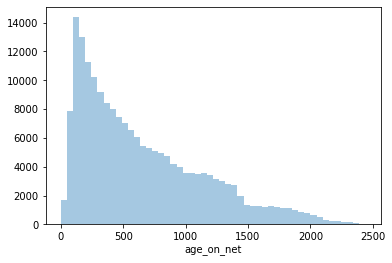

In [158]:
sns.distplot(bata['age_on_net'], kde=False)

In [133]:
# As expected, the data is skewed
# Very less customers are connected with the network for more than 1000 days

<AxesSubplot:xlabel='daily_decr_30'>

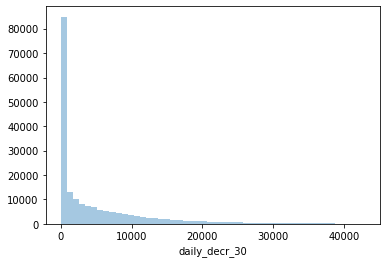

In [159]:
sns.distplot(bata['daily_decr_30'], kde=False)

In [135]:
# It is decaying exponentially and highly skewed

<AxesSubplot:xlabel='daily_decr_90'>

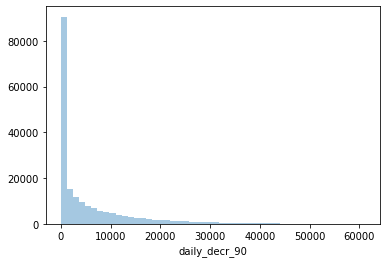

In [163]:
sns.distplot(bata['daily_decr_90'], kde=False)

In [137]:
# It is decaying exponentially and highly skewed

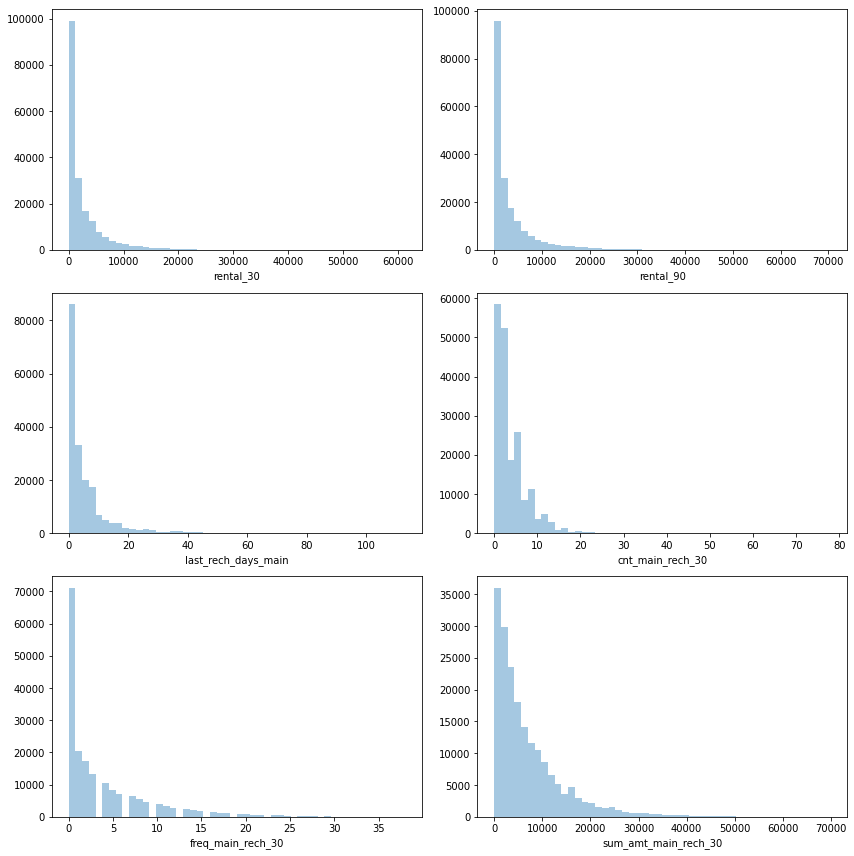

In [164]:
# Lets make subplots
fig=plt.figure()

fig.set_figheight(12)
fig.set_figwidth(12)

ax1=fig.add_subplot(321)
sns.distplot(bata['rental_30'], label='rental_30', ax=ax1, kde=False)

ax2=fig.add_subplot(322)
sns.distplot(bata['rental_90'], label='rental_90', ax=ax2, kde=False)

ax3=fig.add_subplot(323)
sns.distplot(bata['last_rech_days_main'], label='last_rech_days_main', ax=ax3, kde=False)

ax4=fig.add_subplot(324)
sns.distplot(bata['cnt_main_rech_30'], label='cnt_main_rech_30', ax=ax4, kde=False)

ax5=fig.add_subplot(325)
sns.distplot(bata['freq_main_rech_30'], label='freq_main_rech_30', ax=ax5, kde=False)

ax6=fig.add_subplot(326)
sns.distplot(bata['sum_amt_main_rech_30'], label='sum_amt_main_rech_30', ax=ax6, kde=False)

plt.tight_layout()
plt.show()

In [ ]:
# very few people have average balance above 10000 Rs
# for most of the people, count of recharges lie below 20 in last 30 days
# for most of the customers, the last_rech_days_main is below 20
# very few people recharged for more than 30000 rs in a month

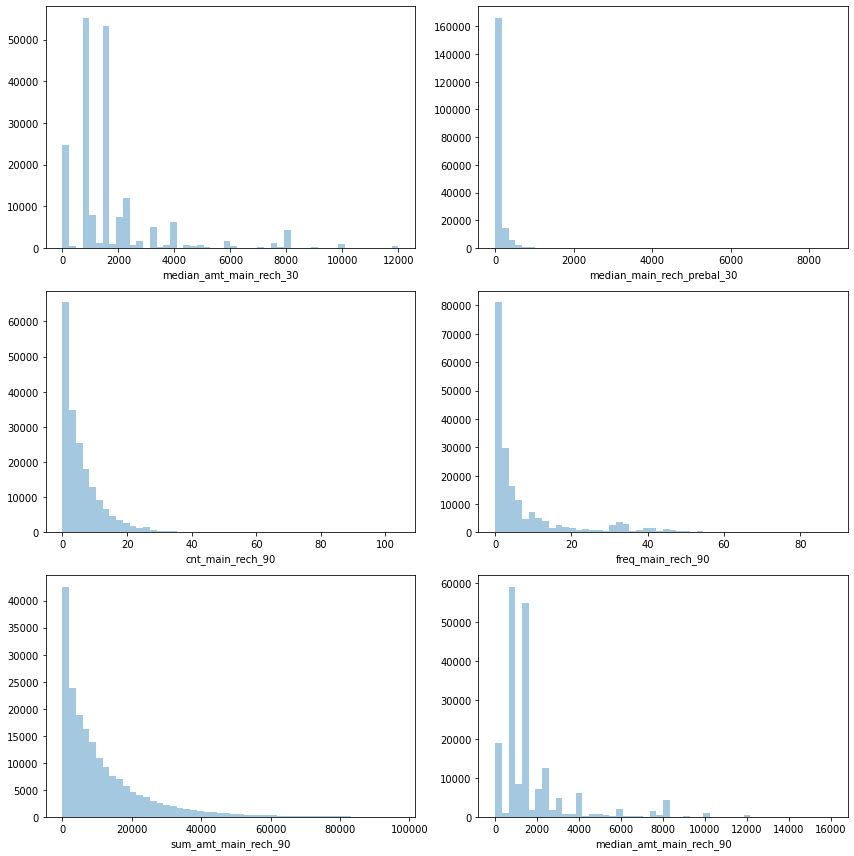

In [165]:
fig=plt.figure()

fig.set_figheight(12)
fig.set_figwidth(12)

ax1=fig.add_subplot(321)
sns.distplot(bata['median_amt_main_rech_30'], label='median_amt_main_rech_30', ax=ax1, kde=False)

ax2=fig.add_subplot(322)
sns.distplot(bata['median_main_rech_prebal_30'], label='median_main_rech_prebal_30', ax=ax2, kde=False)

ax3=fig.add_subplot(323)
sns.distplot(bata['cnt_main_rech_90'], label='cnt_main_rech_90', ax=ax3, kde=False)

ax4=fig.add_subplot(324)
sns.distplot(bata['freq_main_rech_90'], label='freq_main_rech_90', ax=ax4, kde=False)

ax5=fig.add_subplot(325)
sns.distplot(bata['sum_amt_main_rech_90'], label='sum_amt_main_rech_90', ax=ax5, kde=False)

ax6=fig.add_subplot(326)
sns.distplot(bata['median_amt_main_rech_90'], label='median_amt_main_rech_90', ax=ax6, kde=False)

plt.tight_layout()
plt.show()

In [ ]:
# median_main_rech_prebal_30 is almost zero for most of the customers

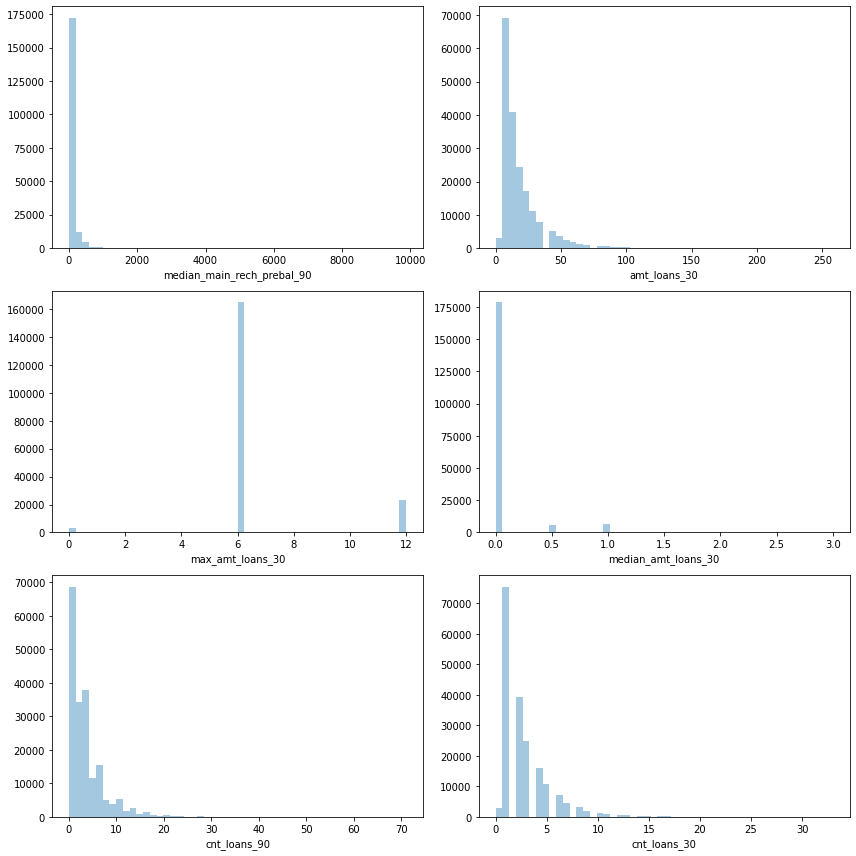

In [166]:
fig=plt.figure()

fig.set_figheight(12)
fig.set_figwidth(12)

ax1=fig.add_subplot(321)
sns.distplot(bata['median_main_rech_prebal_90'], label='median_main_rech_prebal_90', ax=ax1, kde=False)

ax2=fig.add_subplot(322)
sns.distplot(bata['amt_loans_30'], label='amt_loans_30', ax=ax2, kde=False)

ax3=fig.add_subplot(323)
sns.distplot(bata['max_amt_loans_30'], label='max_amt_loans_30', ax=ax3, kde=False)

ax4=fig.add_subplot(324)
sns.distplot(bata['median_amt_loans_30'], label='median_amt_loans_30', ax=ax4, kde=False)

ax5=fig.add_subplot(325)
sns.distplot(bata['cnt_loans_90'], label='cnt_loans_90', ax=ax5, kde=False)

ax6=fig.add_subplot(326)
sns.distplot(bata['cnt_loans_30'], label='cnt_loans_30', ax=ax6, kde=False)

plt.tight_layout()
plt.show()

In [ ]:
# max_amt_loans is 6 rs for most of the customers
# there are very few who have never taken a loan

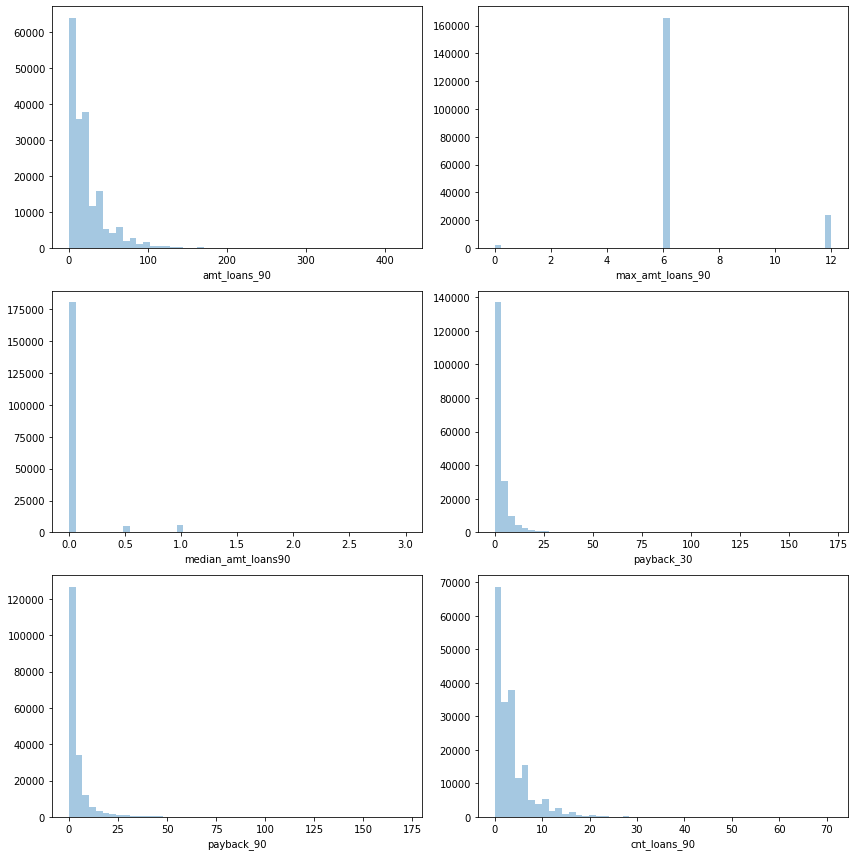

In [167]:
fig=plt.figure()

fig.set_figheight(12)
fig.set_figwidth(12)

ax1=fig.add_subplot(321)
sns.distplot(bata['amt_loans_90'], label='amt_loans_90', ax=ax1, kde=False)

ax2=fig.add_subplot(322)
sns.distplot(bata['max_amt_loans_90'], label='max_amt_loans_90', ax=ax2, kde=False)

ax3=fig.add_subplot(323)
sns.distplot(bata['median_amt_loans90'], label='median_amt_loans90', ax=ax3, kde=False)

ax4=fig.add_subplot(324)
sns.distplot(bata['payback_30'], label='payback_30', ax=ax4, kde=False)

ax5=fig.add_subplot(325)
sns.distplot(bata['payback_90'], label='payback_90', ax=ax5, kde=False)

ax6=fig.add_subplot(326)
sns.distplot(bata['cnt_loans_90'], label='cnt_loans_90', ax=ax6, kde=False)

plt.tight_layout()
plt.show()

In [168]:
# amount of loans for most customers lie below 100 rs in last 90 days
# Look at payback,
# most of the customers paid back only a sum in range o to 25 rs

In [169]:
# Now, lets draw a comparison between various important features

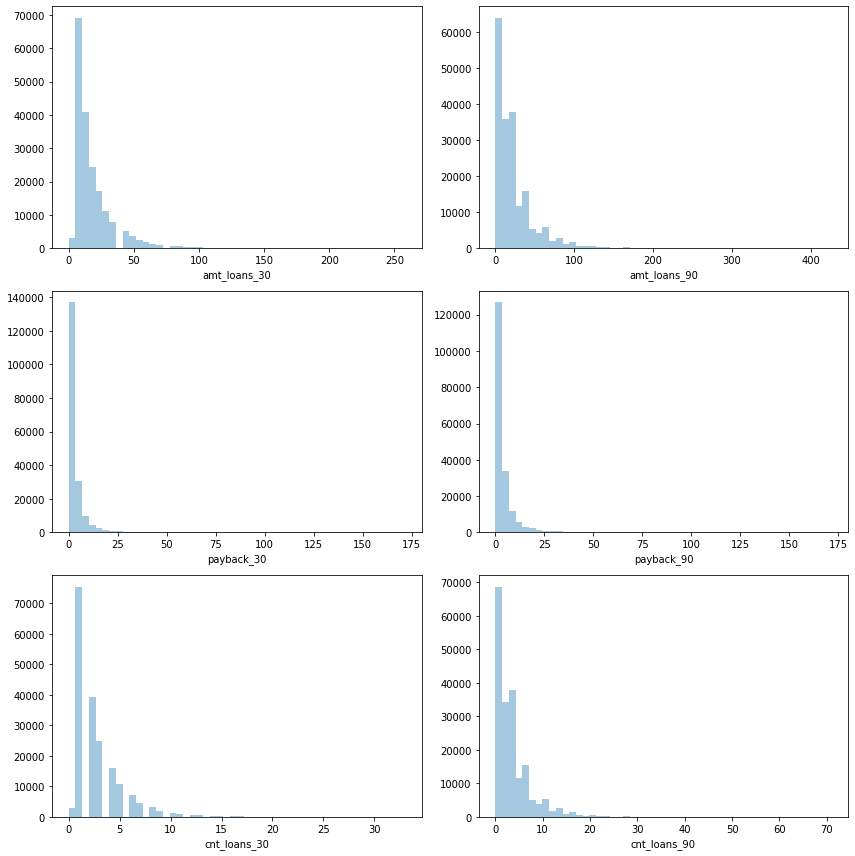

In [170]:
fig=plt.figure()

fig.set_figheight(12)
fig.set_figwidth(12)

ax1=fig.add_subplot(321)
sns.distplot(bata['amt_loans_30'], label='amt_loans_30', ax=ax1, kde=False)

ax2=fig.add_subplot(322)
sns.distplot(bata['amt_loans_90'], label='amt_loans_90', ax=ax2, kde=False)

ax3=fig.add_subplot(323)
sns.distplot(bata['payback_30'], label='payback_30', ax=ax3, kde=False)

ax4=fig.add_subplot(324)
sns.distplot(bata['payback_90'], label='payback_90', ax=ax4, kde=False)

ax5=fig.add_subplot(325)
sns.distplot(bata['cnt_loans_30'], label='cnt_loans_30', ax=ax5, kde=False)

ax6=fig.add_subplot(326)
sns.distplot(bata['cnt_loans_90'], label='cnt_loans_90', ax=ax6, kde=False)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='median_main_rech_prebal_90'>

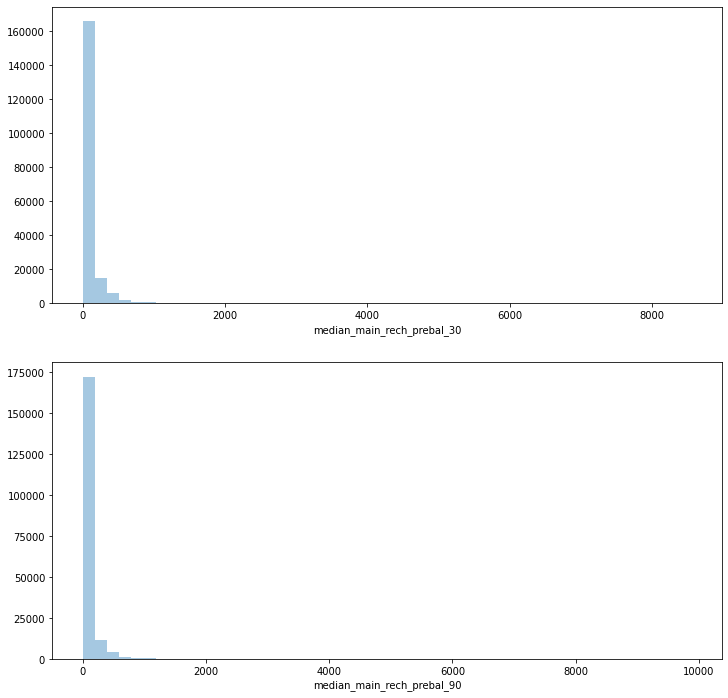

In [171]:
fig=plt.figure()

fig.set_figheight(12)
fig.set_figwidth(12)

ax1=fig.add_subplot(211)
sns.distplot(bata['median_main_rech_prebal_30'], label='median_main_rech_prebal_30', ax=ax1, kde=False)

ax2=fig.add_subplot(212)
sns.distplot(bata['median_main_rech_prebal_90'], label='median_main_rech_prebal_90', ax=ax2, kde=False)

In [172]:
# Almost same trend for both

<AxesSubplot:xlabel='cnt_main_rech_90'>

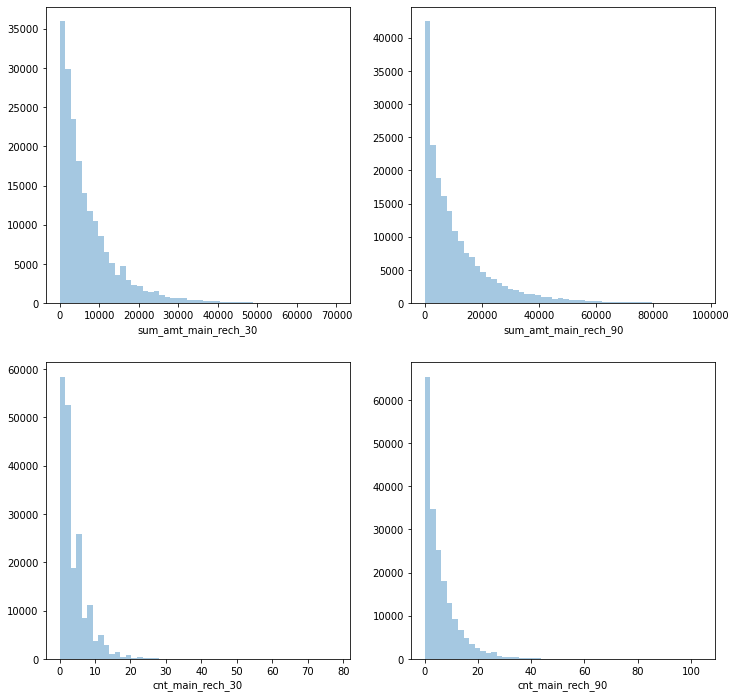

In [173]:
fig=plt.figure()

fig.set_figheight(12)
fig.set_figwidth(12)

ax1=fig.add_subplot(221)
sns.distplot(bata['sum_amt_main_rech_30'], label='sum_amt_main_rech_30', ax=ax1, kde=False)

ax2=fig.add_subplot(222)
sns.distplot(bata['sum_amt_main_rech_90'], label='sum_amt_main_rech_90', ax=ax2, kde=False)

ax3=fig.add_subplot(223)
sns.distplot(bata['cnt_main_rech_30'], label='cnt_main_rech_30', ax=ax3, kde=False)

ax4=fig.add_subplot(224)
sns.distplot(bata['cnt_main_rech_90'], label='cnt_main_rech_90', ax=ax4, kde=False)

In [174]:
# Now, we'll take some important features as per the insights drawn from above graphs and 
# compare the distributions of each feature label wise

In [175]:
label_1=bata[bata['label']==1]
label_0=bata[bata['label']==0]

<AxesSubplot:xlabel='age_on_net'>

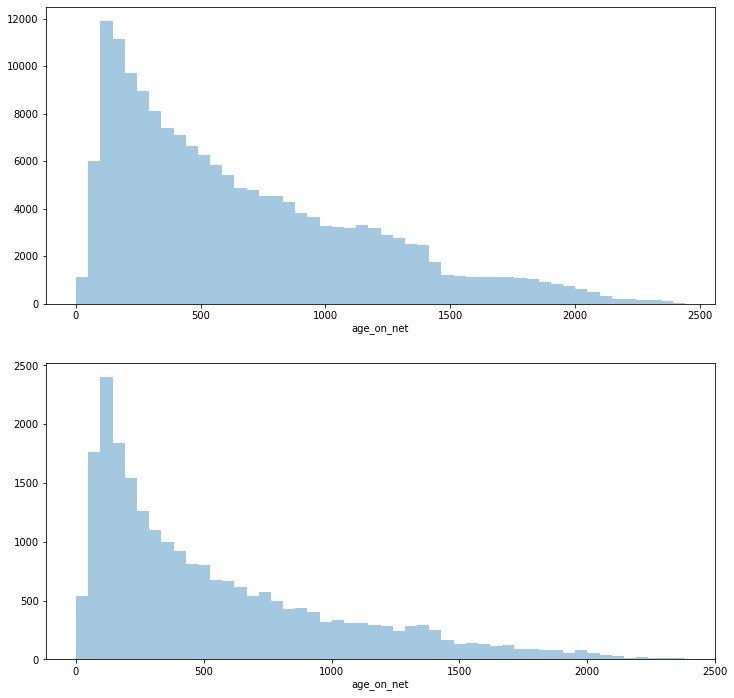

In [176]:
fig=plt.figure()

fig.set_figheight(12)
fig.set_figwidth(12)

ax1=fig.add_subplot(211)
sns.distplot(label_1['age_on_net'], label='age_on_net_1', ax=ax1, kde=False)

ax2=fig.add_subplot(212)
sns.distplot(label_0['age_on_net'], label='age_on_net_0', ax=ax2, kde=False)

In [177]:
# As expected, more number of customers are old who pay the loans on time

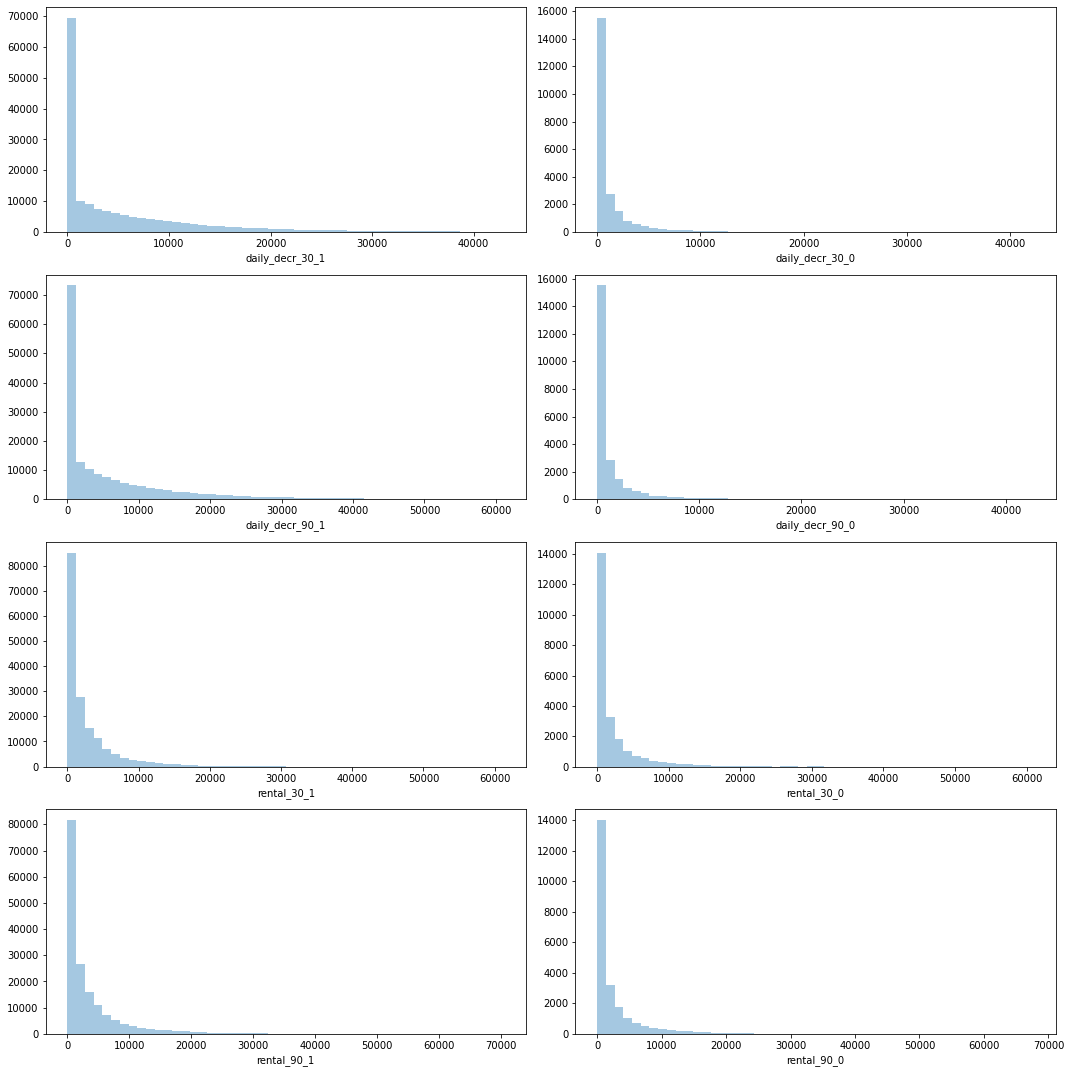

In [184]:


fig=plt.figure()

fig.set_figheight(15)
fig.set_figwidth(15)

ax1=fig.add_subplot(421)
sns.distplot(label_1['daily_decr_30'], axlabel='daily_decr_30_1', ax=ax1, kde=False)

ax2=fig.add_subplot(422)
sns.distplot(label_0['daily_decr_30'], axlabel='daily_decr_30_0', ax=ax2, kde=False)

ax3=fig.add_subplot(423)
sns.distplot(label_1['daily_decr_90'], axlabel='daily_decr_90_1', ax=ax3, kde=False)

ax4=fig.add_subplot(424)
sns.distplot(label_0['daily_decr_90'], axlabel='daily_decr_90_0', ax=ax4, kde=False)

ax5=fig.add_subplot(425)
sns.distplot(label_1['rental_30'], axlabel='rental_30_1', ax=ax5, kde=False)

ax6=fig.add_subplot(426)
sns.distplot(label_0['rental_30'], axlabel='rental_30_0', ax=ax6, kde=False)

ax7=fig.add_subplot(427)
sns.distplot(label_1['rental_90'], axlabel='rental_90_1', ax=ax7, kde=False)

ax8=fig.add_subplot(428)
sns.distplot(label_0['rental_90'], axlabel='rental_90_0', ax=ax8, kde=False)

plt.tight_layout()
plt.show()

In [183]:
# Those who are genuine customers spend more on daily basis
# More number of customers have an avg balance between 0 to 10000 for genuine ones

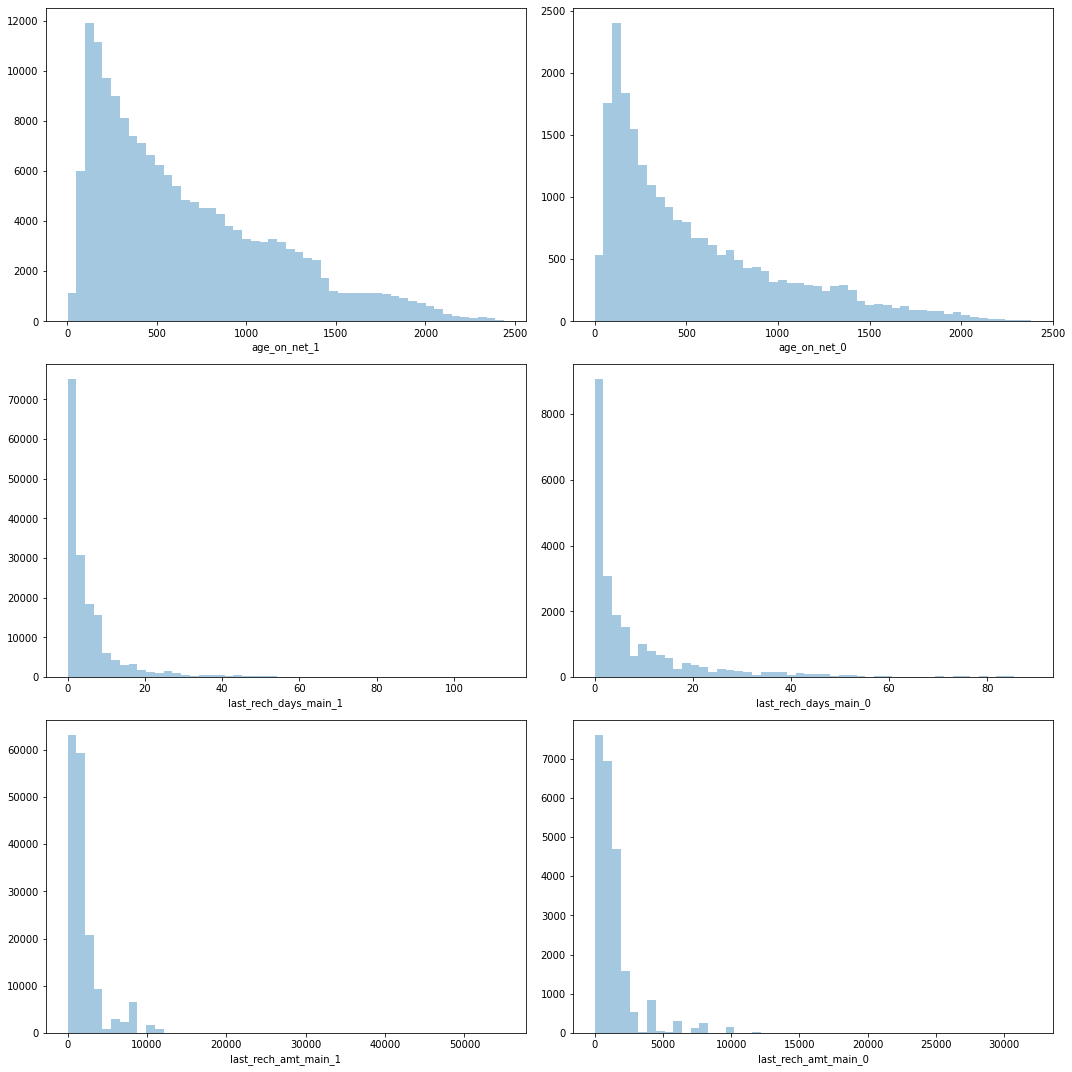

In [185]:


fig=plt.figure()

fig.set_figheight(15)
fig.set_figwidth(15)

ax1=fig.add_subplot(321)
sns.distplot(label_1['age_on_net'], axlabel='age_on_net_1', ax=ax1, kde=False)

ax2=fig.add_subplot(322)
sns.distplot(label_0['age_on_net'], axlabel='age_on_net_0', ax=ax2, kde=False)

ax3=fig.add_subplot(323)
sns.distplot(label_1['last_rech_days_main'], axlabel='last_rech_days_main_1', ax=ax3, kde=False)

ax4=fig.add_subplot(324)
sns.distplot(label_0['last_rech_days_main'], axlabel='last_rech_days_main_0', ax=ax4, kde=False)

ax5=fig.add_subplot(325)
sns.distplot(label_1['last_rech_amt_main'], axlabel='last_rech_amt_main_1', ax=ax5, kde=False)

ax6=fig.add_subplot(326)
sns.distplot(label_0['last_rech_amt_main'], axlabel='last_rech_amt_main_0', ax=ax6, kde=False)


plt.tight_layout()
plt.show()

In [186]:
# most genuine customers recahrged phone within last 20 days
# There is a larger population of defaulters who recharged last between 20 to 40 days than genuine customers
# higher portion of genuine customers whose last recharge value was higher

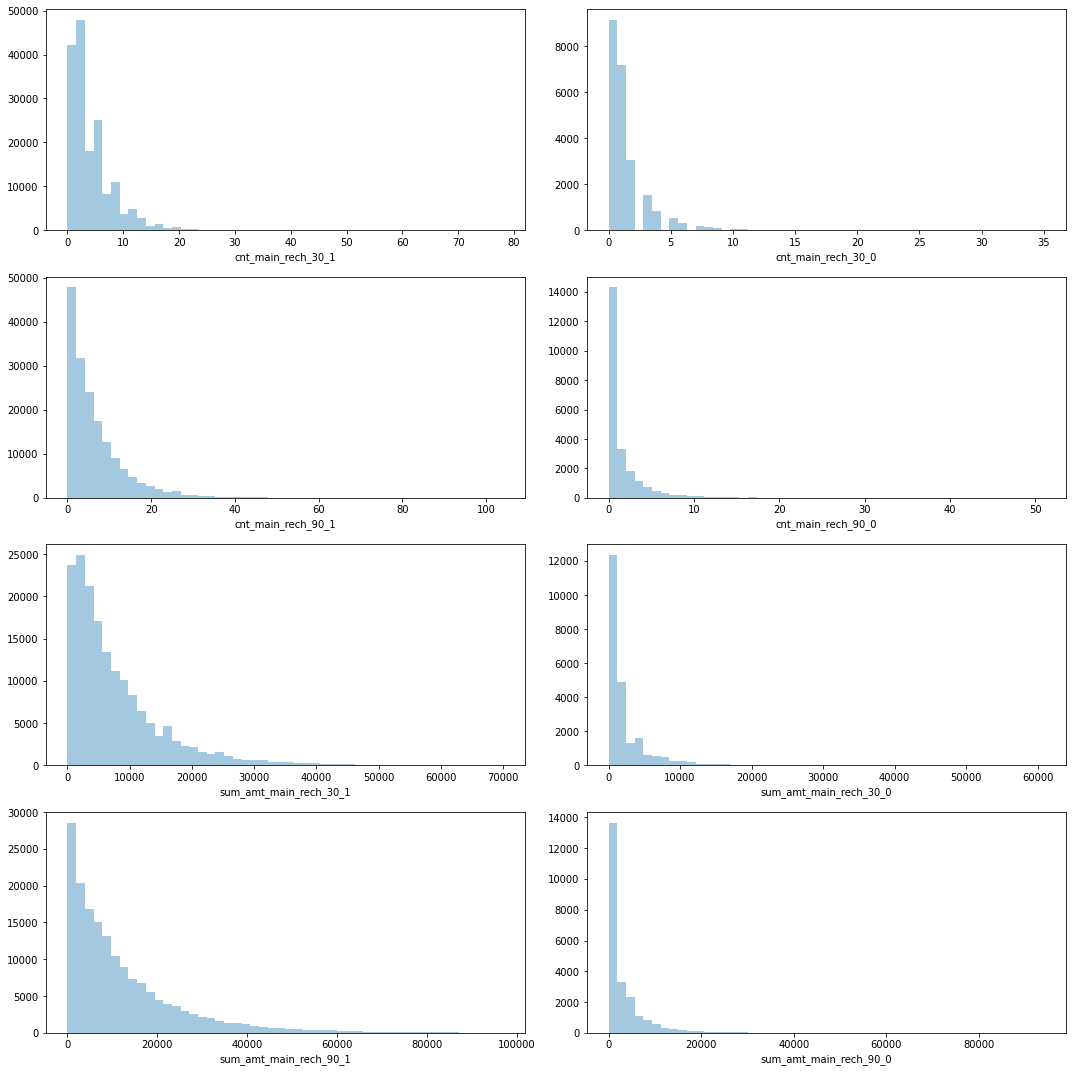

In [188]:


fig=plt.figure()

fig.set_figheight(15)
fig.set_figwidth(15)

ax1=fig.add_subplot(421)
sns.distplot(label_1['cnt_main_rech_30'], axlabel='cnt_main_rech_30_1', ax=ax1, kde=False)

ax2=fig.add_subplot(422)
sns.distplot(label_0['cnt_main_rech_30'], axlabel='cnt_main_rech_30_0', ax=ax2, kde=False)

ax3=fig.add_subplot(423)
sns.distplot(label_1['cnt_main_rech_90'], axlabel='cnt_main_rech_90_1', ax=ax3, kde=False)

ax4=fig.add_subplot(424)
sns.distplot(label_0['cnt_main_rech_90'], axlabel='cnt_main_rech_90_0', ax=ax4, kde=False)

ax5=fig.add_subplot(425)
sns.distplot(label_1['sum_amt_main_rech_30'], axlabel='sum_amt_main_rech_30_1', ax=ax5, kde=False)

ax6=fig.add_subplot(426)
sns.distplot(label_0['sum_amt_main_rech_30'], axlabel='sum_amt_main_rech_30_0', ax=ax6, kde=False)

ax7=fig.add_subplot(427)
sns.distplot(label_1['sum_amt_main_rech_90'], axlabel='sum_amt_main_rech_90_1', ax=ax7, kde=False)

ax8=fig.add_subplot(428)
sns.distplot(label_0['sum_amt_main_rech_90'], axlabel='sum_amt_main_rech_90_0', ax=ax8, kde=False)

plt.tight_layout()
plt.show()

In [189]:
# The count of recharges in both 30 and 90 days are greater for genuine customers
# The sum of amount is also larger for them

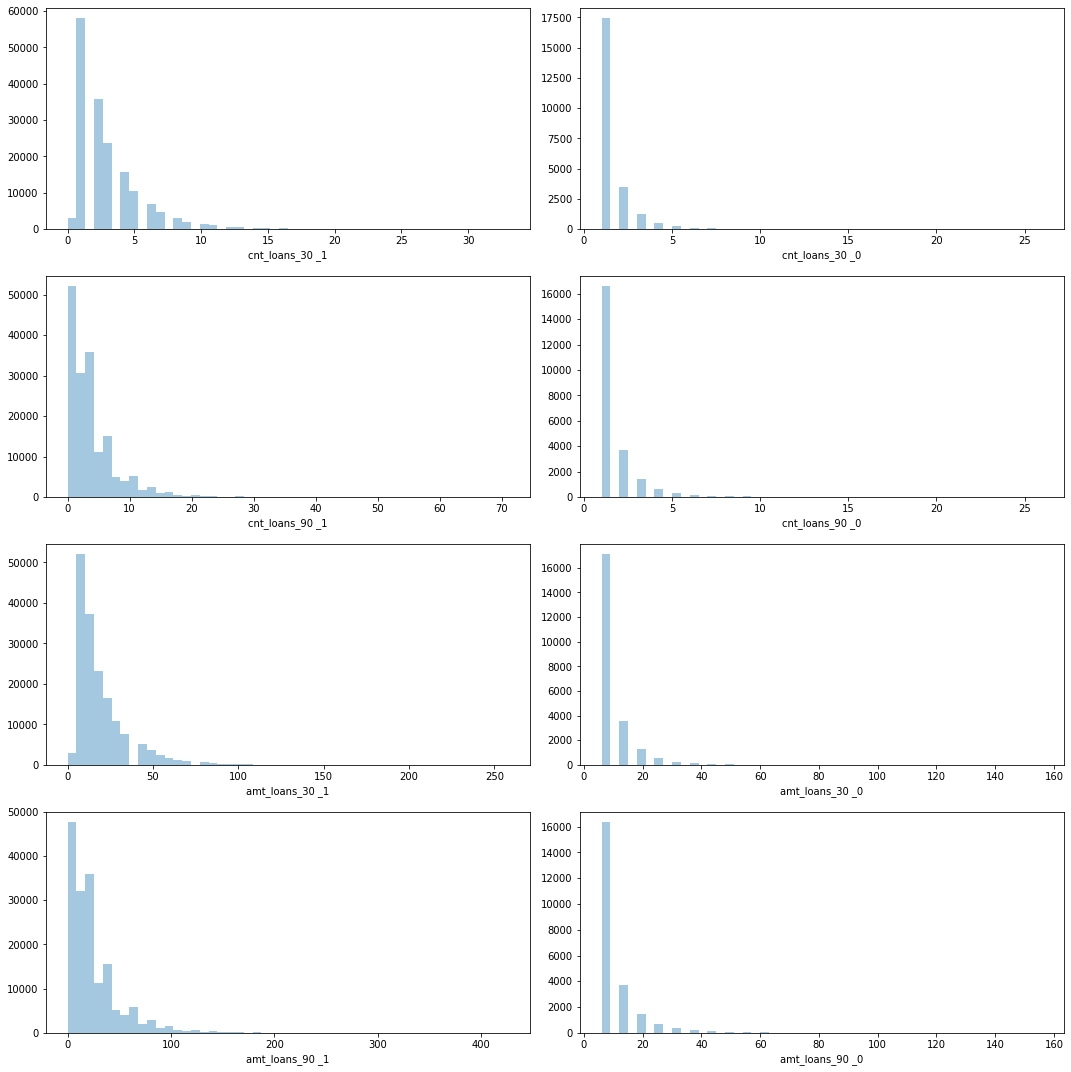

In [190]:


fig=plt.figure()

fig.set_figheight(15)
fig.set_figwidth(15)

ax1=fig.add_subplot(421)
sns.distplot(label_1['cnt_loans_30'], axlabel='cnt_loans_30 _1', ax=ax1, kde=False)

ax2=fig.add_subplot(422)
sns.distplot(label_0['cnt_loans_30'], axlabel='cnt_loans_30 _0', ax=ax2, kde=False)

ax3=fig.add_subplot(423)
sns.distplot(label_1['cnt_loans_90'], axlabel='cnt_loans_90 _1', ax=ax3, kde=False)

ax4=fig.add_subplot(424)
sns.distplot(label_0['cnt_loans_90'], axlabel='cnt_loans_90 _0', ax=ax4, kde=False)

ax5=fig.add_subplot(425)
sns.distplot(label_1['amt_loans_30'], axlabel='amt_loans_30 _1', ax=ax5, kde=False)

ax6=fig.add_subplot(426)
sns.distplot(label_0['amt_loans_30'], axlabel='amt_loans_30 _0', ax=ax6, kde=False)

ax7=fig.add_subplot(427)
sns.distplot(label_1['amt_loans_90'], axlabel='amt_loans_90 _1', ax=ax7, kde=False)

ax8=fig.add_subplot(428)
sns.distplot(label_0['amt_loans_90'], axlabel='amt_loans_90 _0', ax=ax8, kde=False)

plt.tight_layout()
plt.show()


In [191]:
# The amount and count of loans are also higher for genuine customers

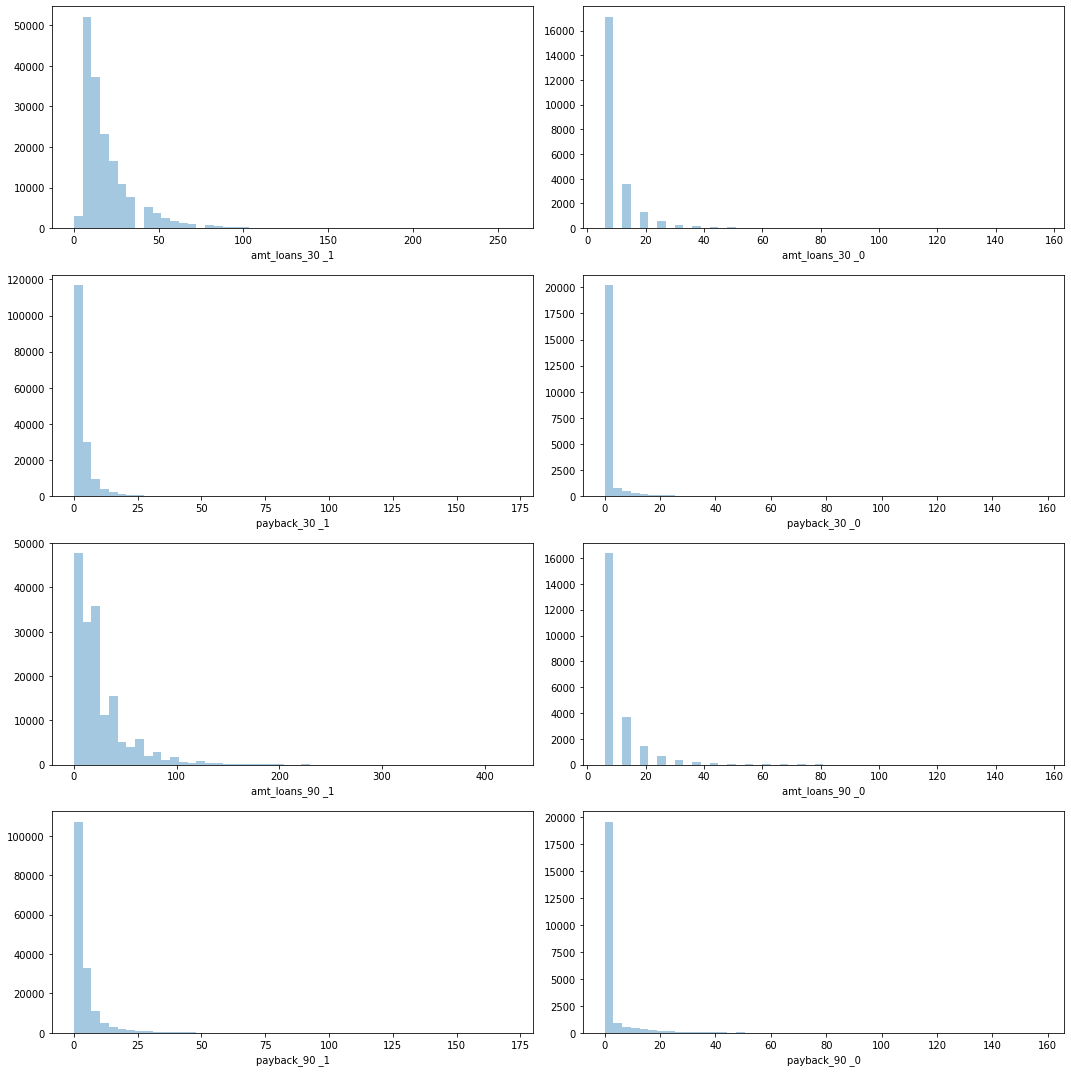

In [192]:


fig=plt.figure()

fig.set_figheight(15)
fig.set_figwidth(15)

ax1=fig.add_subplot(421)
sns.distplot(label_1['amt_loans_30'], axlabel='amt_loans_30 _1', ax=ax1, kde=False)

ax2=fig.add_subplot(422)
sns.distplot(label_0['amt_loans_30'], axlabel='amt_loans_30 _0', ax=ax2, kde=False)

ax3=fig.add_subplot(423)
sns.distplot(label_1['payback_30'], axlabel='payback_30 _1', ax=ax3, kde=False)

ax4=fig.add_subplot(424)
sns.distplot(label_0['payback_30'], axlabel='payback_30 _0', ax=ax4, kde=False)

ax5=fig.add_subplot(425)
sns.distplot(label_1['amt_loans_90'], axlabel='amt_loans_90 _1', ax=ax5, kde=False)

ax6=fig.add_subplot(426)
sns.distplot(label_0['amt_loans_90'], axlabel='amt_loans_90 _0', ax=ax6, kde=False)

ax7=fig.add_subplot(427)
sns.distplot(label_1['payback_90'], axlabel='payback_90 _1', ax=ax7, kde=False)

ax8=fig.add_subplot(428)
sns.distplot(label_0['payback_90'], axlabel='payback_90 _0', ax=ax8, kde=False)

plt.tight_layout()
plt.show()


In [12]:
p=['age_on_net', 'daily_decr_30', 'daily_decr_90', 'rental_30',
       'rental_90', 'last_rech_days_main',
       'last_rech_amt_main', 'cnt_main_rech_30','sum_amt_main_rech_30', 'median_main_rech_prebal_30',
       'cnt_main_rech_90', 'sum_amt_main_rech_90', 'median_main_rech_prebal_90', 'cnt_loans_30',
       'amt_loans_30', 'cnt_loans_90',
       'amt_loans_90', 'payback_30',
       'payback_90']



In [203]:
# Now look at category wise describe function

label_1.describe().loc[['mean', '50%', 'min', 'max']][p]

,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_amt_main,cnt_main_rech_30,sum_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,sum_amt_main_rech_90,median_main_rech_prebal_90,cnt_loans_30,amt_loans_30,cnt_loans_90,amt_loans_90,payback_30,payback_90
mean,667.942272,5470.122209,6171.640682,2764.313337,3617.577746,5.913173,2054.611461,4.295565,7759.011848,98.535467,6.837285,12536.635198,93.648819,2.926049,18.991309,3.96268,25.293413,3.628691,4.607075
50%,535.000000,2204.850000,2267.220000,1199.340000,1506.600000,3.000000,1539.000000,3.000000,5397.000000,39.620000,5.000000,8097.000000,41.000000,2.000000,12.000000,3.00000,18.000000,1.571429,2.200000
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,2440.000000,42991.965000,61149.960000,61324.900000,70484.530000,113.000000,55000.000000,78.000000,69937.000000,8553.400000,104.000000,96817.000000,9875.000000,33.000000,258.000000,71.00000,426.000000,171.500000,171.500000


In [204]:

label_0.describe().loc[['mean', '50%', 'min', 'max']][p]

,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_amt_main,cnt_main_rech_30,sum_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,sum_amt_main_rech_90,median_main_rech_prebal_90,cnt_loans_30,amt_loans_30,cnt_loans_90,amt_loans_90,payback_30,payback_90
mean,545.946278,1321.976277,1328.389152,2133.918305,2458.615184,8.589342,1220.444142,1.371003,2236.915728,43.37971,1.903258,3181.851348,50.697719,1.452816,9.01644,1.587314,9.82343,2.423147,3.189649
50%,388.000000,54.600000,57.350000,669.810000,754.910000,3.000000,773.000000,1.000000,773.000000,8.00000,1.000000,1539.000000,13.400000,1.000000,6.00000,1.000000,6.00000,0.000000,0.000000
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,6.00000,1.000000,6.00000,0.000000,0.000000
max,2382.000000,42305.613333,42734.900000,60990.280000,67715.460000,89.000000,32000.000000,35.000000,60851.000000,8438.00000,51.000000,93980.000000,9400.000000,26.000000,156.00000,26.000000,156.00000,158.000000,158.000000


In [217]:
# Now, lets look at the value counts

bata[bata['age_on_net']==1].shape

(111, 28)

In [238]:
bata[bata['age_on_net']==1]['label'].value_counts()

1    68
0    43
Name: label, dtype: int64

In [218]:
# There are 111 customers who are just 1 day old

In [219]:
bata[bata['daily_decr_30']==0].shape

(3981, 28)

In [239]:
bata[bata['daily_decr_30']==0]['label'].value_counts()

0    3466
1     515
Name: label, dtype: int64

In [259]:
# around 4000 customers do not spend anything on a daily basis (over 30 days)
# most of the customers are defaulters who don't spend anything

In [221]:
bata[bata['daily_decr_90']==0].shape

(3904, 28)

In [240]:
bata[bata['daily_decr_90']==0]['label'].value_counts()

0    3466
1     438
Name: label, dtype: int64

In [260]:
# around 4000 customers do not spend anything on a daily basis (over 90 days)
# most of the customers who don't spend anything are defaulters 

In [223]:
bata[bata['rental_30']==0].shape

(6458, 28)

In [241]:
bata[bata['rental_30']==0]['label'].value_counts()

1    3642
0    2816
Name: label, dtype: int64

In [261]:
# There is approximately an equal proportion of customers who have an average balance of zero

In [222]:
bata[bata['rental_90']==0].shape

(5872, 28)

In [242]:
bata[bata['rental_90']==0]['label'].value_counts()

1    3056
0    2816
Name: label, dtype: int64

In [224]:
bata[bata['last_rech_days_main']==0].shape

(17929, 28)

In [243]:
bata[bata['last_rech_days_main']==0]['label'].value_counts()

1    10561
0     7368
Name: label, dtype: int64

In [225]:
bata[bata['last_rech_amt_main']==0].shape

(18071, 28)

In [244]:
bata[bata['last_rech_amt_main']==0]['label'].value_counts()

1    10612
0     7459
Name: label, dtype: int64

In [226]:
bata[bata['cnt_main_rech_30']==0].shape

(24276, 28)

In [245]:
bata[bata['cnt_main_rech_30']==0]['label'].value_counts()

1    15135
0     9141
Name: label, dtype: int64

In [262]:
# There are many customers who are genuine and didn't recharge their number even once in last 30 days

In [227]:
bata[bata['sum_amt_main_rech_30']==0].shape

(24276, 28)

In [246]:
bata[bata['sum_amt_main_rech_30']==0]['label'].value_counts()

1    15135
0     9141
Name: label, dtype: int64

In [228]:
bata[bata['median_main_rech_prebal_30']==0].shape

(26908, 28)

In [247]:
bata[bata['median_main_rech_prebal_30']==0]['label'].value_counts()

1    17212
0     9696
Name: label, dtype: int64

In [263]:
# Lot of customers recharge only when their prebal is zero

In [230]:
bata[bata['cnt_main_rech_90']==0].shape

(18024, 28)

In [248]:
bata[bata['cnt_main_rech_90']==0]['label'].value_counts()

1    10604
0     7420
Name: label, dtype: int64

In [231]:
bata[bata['sum_amt_main_rech_90']==0].shape

(18024, 28)

In [249]:
bata[bata['sum_amt_main_rech_90']==0]['label'].value_counts()

1    10604
0     7420
Name: label, dtype: int64

In [232]:
bata[bata['median_main_rech_prebal_90']==0].shape

(20267, 28)

In [253]:
bata[bata['median_main_rech_prebal_90']==0]['label'].value_counts()

1    12253
0     8014
Name: label, dtype: int64

In [229]:
bata[bata['cnt_loans_30']==0].shape

(3051, 28)

In [254]:
bata[bata['cnt_loans_30']==0]['label'].value_counts()

1    3051
Name: label, dtype: int64

In [264]:
# One who hasn't taken any loan can't be a deafaulter

In [233]:
bata[bata['amt_loans_30']==0].shape

(3051, 28)

In [255]:
bata[bata['amt_loans_30']==0]['label'].value_counts()

1    3051
Name: label, dtype: int64

In [234]:
bata[bata['cnt_loans_90']==0].shape

(1897, 28)

In [256]:
bata[bata['cnt_loans_90']==0]['label'].value_counts()

1    1897
Name: label, dtype: int64

In [235]:
bata[bata['payback_30']==0].shape

(96795, 28)

In [257]:
bata[bata['payback_30']==0]['label'].value_counts()

1    77122
0    19673
Name: label, dtype: int64

In [236]:
bata[bata['payback_90']==0].shape

(86503, 28)

In [258]:
bata[bata['payback_90']==0]['label'].value_counts()

1    67463
0    19040
Name: label, dtype: int64

In [265]:
# There are some variables which seem continuous but actually are categorical

bata['max_amt_loans_30'].value_counts()

6.0     164733
12.0     23611
0.0       3051
Name: max_amt_loans_30, dtype: int64

In [266]:
bata['max_amt_loans_90'].value_counts()

6     165542
12     23956
0       1897
Name: max_amt_loans_90, dtype: int64

In [267]:
# Most of the customers have taken a loan of 6 rs
# very few are there who haven't taken a loan

In [268]:
pd.crosstab(bata['max_amt_loans_30'], bata['label'])

label,0,1
max_amt_loans_30,,
0.0,0,3051
6.0,22230,142503
12.0,945,22666


In [269]:
# less number of people who took a loan of 12 rs defaulted

In [270]:
# Lets check for the skewness

bata.skew()

label                         -2.323044
age_on_net                     0.957903
daily_decr_30                  2.071514
daily_decr_90                  2.266082
rental_30                      3.292464
rental_90                      3.375252
last_rech_days_main            3.497143
last_rech_amt_main             2.656055
cnt_main_rech_30               2.318959
freq_main_rech_30              1.997132
sum_amt_main_rech_30           2.188858
median_amt_main_rech_30        2.553776
median_main_rech_prebal_30    13.182952
cnt_main_rech_90               2.439950
freq_main_rech_90              2.288002
sum_amt_main_rech_90           2.168556
median_amt_main_rech_90        2.614970
median_main_rech_prebal_90    15.163232
cnt_loans_30                   2.462238
amt_loans_30                   2.541926
max_amt_loans_30               1.423505
median_amt_loans_30            4.568156
cnt_loans_90                   2.710719
amt_loans_90                   2.761583
max_amt_loans_90               1.684810


In [271]:
# As we have seen already, the data is highly skewed wrt some features

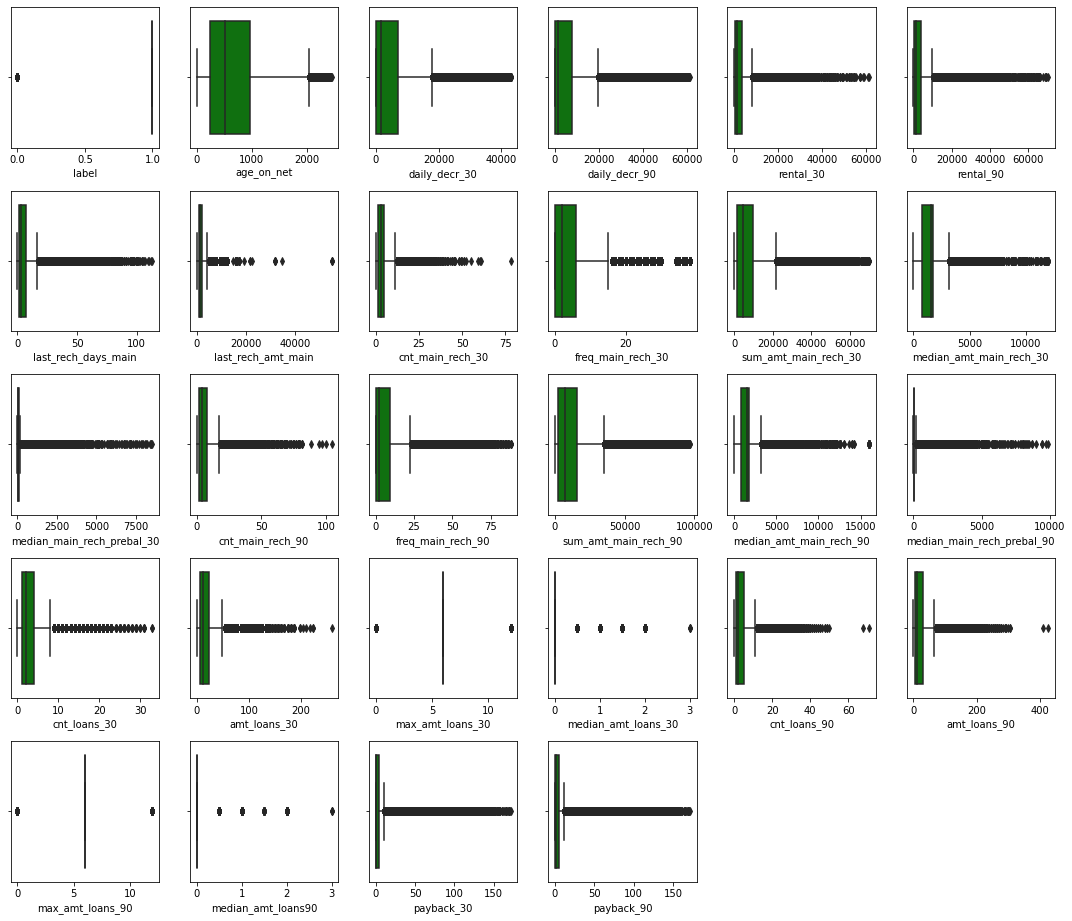

In [276]:
# Lets do an outlier detection
col=bata.columns

fig=plt.figure()

fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(len(col)):
    plt.subplot(6,6,i+1)
    sns.boxplot(bata[col[i]], orient='h', color='green')
    plt.tight_layout()

In [277]:
# Still, there are a lot of outliers in the data

<AxesSubplot:>

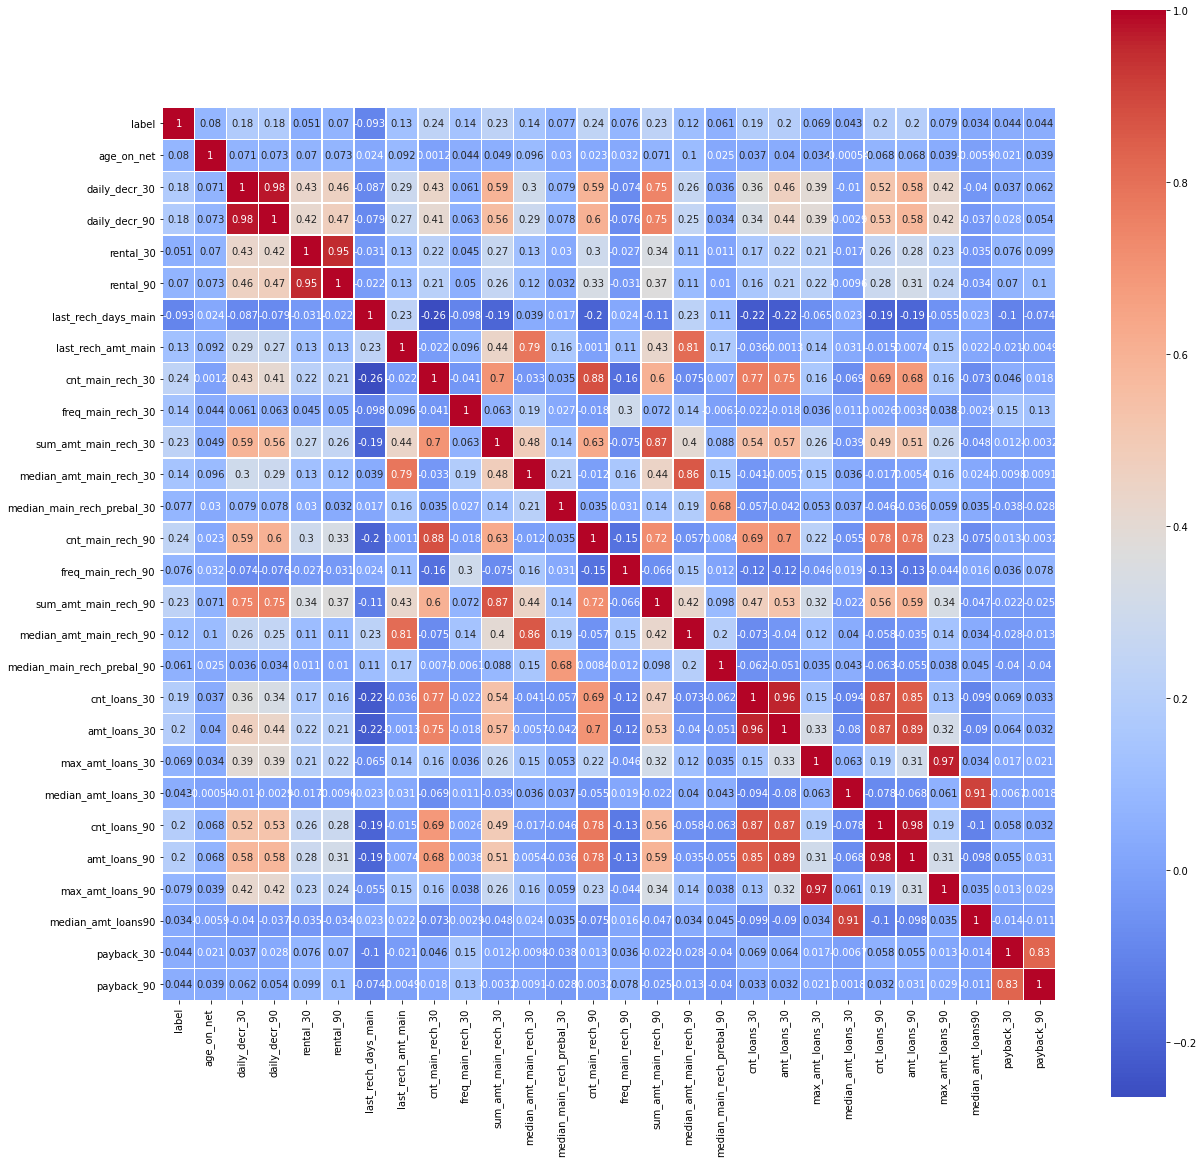

In [282]:
# lets check the correlation of columns with each other using heatmap
fig=plt.figure()

fig.set_figheight(20)
fig.set_figwidth(20)
sns.heatmap(bata.corr(), annot=True, linewidths=.5, square=True, cmap='coolwarm', cbar=True)

In [286]:
# None of the features have a very strong correlation with target variable
# daily decr 90 and daily decr 30 are highly correlated
# sum_amt_main_rech_90 and sum_amt_main_rech_30 are also highly correlated
# max_amt_loans_30 and 90 are highly correlated
# median_amt_loans_90 and 30
# payback_30 and 90
# cnt_main_rech_30 and 90, amt_main_rech_30
# cnt_loans_90 and 30 are related with amt_loans

In [287]:
# using the correlation chart, we can remove a few features

In [13]:
# Lets try to treat the skewness using box cox transform
import scipy
from scipy.stats import boxcox

In [138]:
eata=bata.copy()

In [137]:
eata[eata['age_on_net']==0].shape

(0, 28)

In [139]:
values,_=pd.Series(boxcox((eata['age_on_net']+5)))
eata['age_on_net']=pd.Series(values)
eata['age_on_net'].skew()

-0.05556654654970075

In [140]:
values,_=pd.Series(boxcox(eata['daily_decr_30']+5))
eata['daily_decr_30']=pd.Series(values)
eata['daily_decr_30'].skew()

-0.12311936483642186

In [141]:
values,_=pd.Series(boxcox(eata['daily_decr_90']+5))
eata['daily_decr_90']=pd.Series(values)
eata['daily_decr_90'].skew()

-0.11240428546332659

In [142]:
values,_=pd.Series(boxcox(eata['rental_30']+5))
eata['rental_30']=pd.Series(values)
eata['rental_30'].skew()

-0.04373219345376567

In [143]:
values,_=pd.Series(boxcox(eata['rental_90']+5))
eata['rental_90']=pd.Series(values)
eata['rental_90'].skew()

-0.045380352510364555

In [144]:
co=['last_rech_days_main', 'last_rech_amt_main',
       'cnt_main_rech_30', 'freq_main_rech_30', 'sum_amt_main_rech_30',
       'median_amt_main_rech_30', 'median_main_rech_prebal_30',
       'cnt_main_rech_90', 'freq_main_rech_90', 'sum_amt_main_rech_90',
       'median_amt_main_rech_90', 'median_main_rech_prebal_90', 'cnt_loans_30',
       'amt_loans_30', 'max_amt_loans_30', 'median_amt_loans_30',
       'cnt_loans_90', 'amt_loans_90', 'max_amt_loans_90',
       'median_amt_loans_90', 'payback_30', 'payback_90']

for i in co:    
    values,_=pd.Series(boxcox(eata[i]+5))
    eata[i]=pd.Series(values)
    print(i, " ", eata[i].skew())

last_rech_days_main   0.20674713163290684
last_rech_amt_main   0.028780069811758267
cnt_main_rech_30   0.0804556829523485
freq_main_rech_30   0.2866028337037375
sum_amt_main_rech_30   -0.2507166160659127
median_amt_main_rech_30   -0.06897561931976154
median_main_rech_prebal_30   0.009366130604748595
cnt_main_rech_90   0.08204704338328792
freq_main_rech_90   0.3337781203198966
sum_amt_main_rech_90   -0.17407349547010495
median_amt_main_rech_90   0.05216254329007571
median_main_rech_prebal_90   0.0011174598401276165
cnt_loans_30   0.1939512356230112
amt_loans_30   0.02305241522091398
max_amt_loans_30   0.05655966967899604
median_amt_loans_30   0
cnt_loans_90   0.25747701669937967
amt_loans_90   0.07127690356892477
max_amt_loans_90   -0.07025157673181831
median_amt_loans_90   0
payback_30   0.4260390926761553
payback_90   0.35101710950923576


In [145]:
eata.skew()

label                        -2.323044
age_on_net                   -0.055567
daily_decr_30                -0.123119
daily_decr_90                -0.112404
rental_30                    -0.043732
rental_90                    -0.045380
last_rech_days_main           0.206747
last_rech_amt_main            0.028780
cnt_main_rech_30              0.080456
freq_main_rech_30             0.286603
sum_amt_main_rech_30         -0.250717
median_amt_main_rech_30      -0.068976
median_main_rech_prebal_30    0.009366
cnt_main_rech_90              0.082047
freq_main_rech_90             0.333778
sum_amt_main_rech_90         -0.174073
median_amt_main_rech_90       0.052163
median_main_rech_prebal_90    0.001117
cnt_loans_30                  0.193951
amt_loans_30                  0.023052
max_amt_loans_30              0.056560
median_amt_loans_30           0.000000
cnt_loans_90                  0.257477
amt_loans_90                  0.071277
max_amt_loans_90             -0.070252
median_amt_loans_90      

In [143]:
# The skewness has come under control except for columns median_amt_loans_30 and 90
# But, we may choose to drop these columns in future because they are highly correlated with others

In [144]:
# Now, lets look at the outliers

In [146]:
eata.isnull().sum()

label                            0
age_on_net                    3344
daily_decr_30                 3344
daily_decr_90                 3344
rental_30                     3344
rental_90                     3344
last_rech_days_main           3344
last_rech_amt_main            3344
cnt_main_rech_30              3344
freq_main_rech_30             3344
sum_amt_main_rech_30          3344
median_amt_main_rech_30       3344
median_main_rech_prebal_30    3344
cnt_main_rech_90              3344
freq_main_rech_90             3344
sum_amt_main_rech_90          3344
median_amt_main_rech_90       3344
median_main_rech_prebal_90    3344
cnt_loans_30                  3344
amt_loans_30                  3344
max_amt_loans_30              3344
median_amt_loans_30           3344
cnt_loans_90                  3344
amt_loans_90                  3344
max_amt_loans_90              3344
median_amt_loans_90           3344
payback_30                    3344
payback_90                    3344
dtype: int64

In [145]:
eata.describe()

,label,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans90,payback_30,payback_90
count,191395.000000,188051.000000,188051.000000,188051.000000,188051.000000,188051.000000,188051.000000,188051.000000,188051.000000,188051.000000,188051.000000,188051.000000,188051.000000,188051.000000,188051.000000,188051.000000,188051.000000,188051.000000,188051.000000,188051.000000,188051.000000,188051.000000,188051.000000,188051.000000,188051.000000,188051.000000,188051.000000,188051.000000
mean,0.878915,15.661498,10.306434,10.052295,15.052991,15.090261,1.202582,36.251312,1.340454,0.839942,43.452606,36.047456,4.255819,1.674697,1.023725,46.779145,38.757659,4.511729,0.838205,2.744627,4.028600,0.002624,0.893168,2.529102,3.352748,0.001920,0.537619,0.688365
std,0.326226,4.338451,5.736075,5.569009,6.594228,6.551337,0.657726,16.794228,0.781040,0.741913,22.522548,18.004892,2.519823,0.923896,0.840921,22.862242,17.772211,2.419399,0.278185,0.826662,0.974753,0.009739,0.300394,0.700373,0.674671,0.007735,0.569796,0.670033
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.209915,4.729854,4.659130,10.566114,10.573483,0.642996,28.768430,0.697971,0.000000,30.569556,30.255372,2.971669,1.119443,0.000000,32.777537,31.387754,3.377260,0.583100,1.999036,3.777231,0.000000,0.579964,1.817605,3.162123,0.000000,0.000000,0.000000
50%,1.000000,15.695924,11.470884,11.148520,14.980155,15.095919,1.195246,37.919532,1.405678,0.953991,45.049133,40.140387,4.410041,1.654405,0.958806,47.836998,41.764509,4.616026,0.839383,2.657786,3.777231,0.000000,0.832504,2.345180,3.162123,0.000000,0.000000,0.842116
75%,1.000000,19.098840,15.314617,14.884419,19.694153,19.668544,1.669558,44.473885,1.824229,1.522669,58.079185,42.097506,5.741053,2.281602,1.743940,61.981802,43.835249,5.851143,1.094778,3.365976,3.777231,0.000000,1.156261,3.047802,3.162123,0.000000,1.080422,1.259216
max,1.000000,25.419901,20.716477,20.788467,38.408748,36.550415,2.944961,149.208190,4.565920,2.350436,113.645941,90.667379,15.692591,5.043441,2.679579,112.096970,107.261148,17.153503,1.627762,6.004928,6.299367,0.038778,1.689690,4.923785,4.932200,0.033081,1.755290,2.214810


In [147]:
eata.dropna(inplace=True) # skewness removal is producing null values in the data

xe=eata.drop(['label'], axis=1)
ye=eata['label']
scx=StandardScaler()
xes=pd.DataFrame(scx.fit_transform(xe), columns=xe.columns)

In [152]:
print("LR ", get_score(lrc,xes,ye))
print("RF ", get_score(rfc,xe,ye))
print("XGB ", get_score(xgbc,xe,ye))

LR  (0.8789900594166111, 0.9355988996683157)
RF  (0.9996454856138062, 0.9349045379865163)
XGB  (0.8809611594038486, 0.935474009578696)


In [153]:
# The results are approximately the same
# Skewness is not affecting our results that much

In [148]:
eata.isnull().sum()

label                         0
age_on_net                    0
daily_decr_30                 0
daily_decr_90                 0
rental_30                     0
rental_90                     0
last_rech_days_main           0
last_rech_amt_main            0
cnt_main_rech_30              0
freq_main_rech_30             0
sum_amt_main_rech_30          0
median_amt_main_rech_30       0
median_main_rech_prebal_30    0
cnt_main_rech_90              0
freq_main_rech_90             0
sum_amt_main_rech_90          0
median_amt_main_rech_90       0
median_main_rech_prebal_90    0
cnt_loans_30                  0
amt_loans_30                  0
max_amt_loans_30              0
median_amt_loans_30           0
cnt_loans_90                  0
amt_loans_90                  0
max_amt_loans_90              0
median_amt_loans_90           0
payback_30                    0
payback_90                    0
dtype: int64

In [14]:
# We'll continue modelling on bata dataset

# Lets remove outliers using IQR method in bata

# using IQR method
def outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out=(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return(df_out.sum())

def lower(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower=Q1 - 1.5 * IQR
    return lower

def upper(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper=Q3 + 1.5 * IQR
    return upper

def treat_outlier(df,col):
    for i in range(df.shape[0]):
        if (df[col].iloc[i])>upper(df,col):
            df[col].iloc[i]=upper(df,col)
        elif (df[col].iloc[i])<lower(df,col):
            df[col].iloc[i]=lower(df,col)
            
def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return (df.shape)

In [151]:
# Lets also have an outlier assessment of eata dataset
outlier(eata)

label                         22756
age_on_net                      110
daily_decr_30                     0
daily_decr_90                     0
rental_30                       115
rental_90                       100
last_rech_days_main               0
last_rech_amt_main            29798
cnt_main_rech_30                  1
freq_main_rech_30                 0
sum_amt_main_rech_30            609
median_amt_main_rech_30       36874
median_main_rech_prebal_30      771
cnt_main_rech_90                  5
freq_main_rech_90                 0
sum_amt_main_rech_90            396
median_amt_main_rech_90       31096
median_main_rech_prebal_90     1694
cnt_loans_30                      0
amt_loans_30                      0
max_amt_loans_30              26230
median_amt_loans_30               0
cnt_loans_90                      0
amt_loans_90                      0
max_amt_loans_90              25429
median_amt_loans_90               0
payback_30                        0
payback_90                  

In [152]:
outlier(bata)

label                         23175
age_on_net                     2014
daily_decr_30                 13535
daily_decr_90                 15318
rental_30                     16515
rental_90                     17334
last_rech_days_main           17183
last_rech_amt_main            16412
cnt_main_rech_30               9745
freq_main_rech_30              9686
sum_amt_main_rech_30          10696
median_amt_main_rech_30       25413
median_main_rech_prebal_30    22422
cnt_main_rech_90              12304
freq_main_rech_90             23091
sum_amt_main_rech_90          11527
median_amt_main_rech_90       25798
median_main_rech_prebal_90    21873
cnt_loans_30                   6841
amt_loans_30                   9067
max_amt_loans_30              26662
median_amt_loans_30           12944
cnt_loans_90                   9288
amt_loans_90                  11033
max_amt_loans_90              25853
median_amt_loans_90           11111
payback_30                    13710
payback_90                  

In [156]:
# According to the 1.5*IQR, there are a lot of outliers in our data 

In [154]:
# As there are a lot of outliers in the data, we can't remove them
# In order to treat them, we'll have to make a lot of unnecessary assumptions
# We'll use robust scaler for scaling
# Also, we'll use algo which are prone to outliers

In [15]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
xbrs=pd.DataFrame(rs.fit_transform(xb), columns=xb.columns)

In [157]:
print("LR ", get_score(lrc,xbrs,yb))
print("RF ", get_score(rfc,xbrs,yb))
print("XGB ", get_score(xgbc,xbrs,yb))

LR  (0.8796692349490756, 0.936003929974991)
RF  (0.9995680827051956, 0.9514533978005747)
XGB  (0.9223036517910634, 0.9524490195852402)


In [158]:
# Lets visualise the data using scatter plots

<AxesSubplot:xlabel='age_on_net', ylabel='daily_decr_30'>

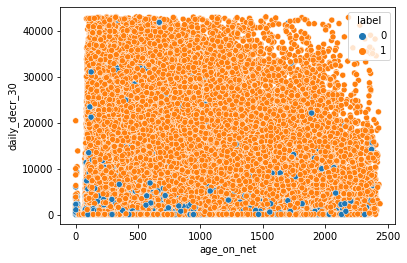

In [162]:
sns.scatterplot( 'age_on_net', 'daily_decr_30',data=bata, hue='label')

<AxesSubplot:xlabel='age_on_net', ylabel='daily_decr_90'>

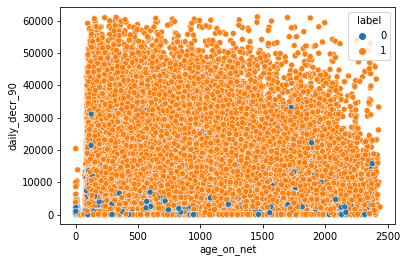

In [163]:
sns.scatterplot( 'age_on_net', 'daily_decr_90',data=bata, hue='label')

<AxesSubplot:xlabel='last_rech_days_main', ylabel='cnt_main_rech_30'>

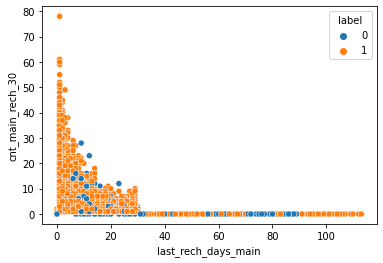

In [165]:
sns.scatterplot( 'last_rech_days_main', 'cnt_main_rech_30',data=bata, hue='label')

In [164]:
# No important insight from these plots

In [166]:
# Now, we'll start the modelling
# We'll use feature engineering, feature importance, cross validation
# and we'll also use multiple metrics to evaluate the model

# Random Forest

In [167]:
modelrf=bata.copy()

In [168]:
xrf=modelrf.drop(['label'], axis=1)
yrf=modelrf['label']
rfc=RandomForestClassifier(n_jobs=-1,random_state=45)
print("RF ", get_score(rfc,xrf,yrf))

RF  (0.9995872572556735, 0.9521826683504556)


In [ ]:
# First, we'll drop some columns based on correlation
# We'll drop

# rental_30, cnt_main_rech_90, daily_decr_90, median_amt_main_rech_90, sum_amt_main_rech_90,
# cnt_loans_90, amt_loans_90, max_amt_loans_90, median_amt_loans_90, payback_90

In [173]:
droprf=['rental_30', 'cnt_main_rech_90', 'daily_decr_90', 'median_amt_main_rech_90', 'sum_amt_main_rech_90',
'cnt_loans_90', 'amt_loans_90', 'max_amt_loans_90', 'median_amt_loans_90', 'payback_90']

modelrf.drop(droprf, axis=1, inplace=True)

In [174]:
xrfa=modelrf.drop(['label'], axis=1)
yrfa=modelrf['label']
rfc=RandomForestClassifier(n_jobs=-1,random_state=45)
print("RF ", get_score(rfc,xrfa,yrfa))

RF  (0.9995471834812534, 0.9509575718466964)


In [175]:
# There is very slight decrease in the score

In [176]:
# Now, lets check the featureimportances for the remaining features

In [177]:
rfc.feature_importances_

array([0.11940919, 0.25212122, 0.12902169, 0.05884725, 0.03002034,
       0.04188739, 0.02285434, 0.06766977, 0.03229326, 0.06504285,
       0.04015328, 0.07238421, 0.01240917, 0.01807406, 0.0075421 ,
       0.00786779, 0.02240209])

In [180]:
impfeat=pd.Series(rfc.feature_importances_,index=xrfa.columns)
impfeat

age_on_net                    0.119409
daily_decr_30                 0.252121
rental_90                     0.129022
last_rech_days_main           0.058847
last_rech_amt_main            0.030020
cnt_main_rech_30              0.041887
freq_main_rech_30             0.022854
sum_amt_main_rech_30          0.067670
median_amt_main_rech_30       0.032293
median_main_rech_prebal_30    0.065043
freq_main_rech_90             0.040153
median_main_rech_prebal_90    0.072384
cnt_loans_30                  0.012409
amt_loans_30                  0.018074
max_amt_loans_30              0.007542
median_amt_loans_30           0.007868
payback_30                    0.022402
dtype: float64

In [181]:
impfeat.sort_values(ascending=False)

daily_decr_30                 0.252121
rental_90                     0.129022
age_on_net                    0.119409
median_main_rech_prebal_90    0.072384
sum_amt_main_rech_30          0.067670
median_main_rech_prebal_30    0.065043
last_rech_days_main           0.058847
cnt_main_rech_30              0.041887
freq_main_rech_90             0.040153
median_amt_main_rech_30       0.032293
last_rech_amt_main            0.030020
freq_main_rech_30             0.022854
payback_30                    0.022402
amt_loans_30                  0.018074
cnt_loans_30                  0.012409
median_amt_loans_30           0.007868
max_amt_loans_30              0.007542
dtype: float64

In [188]:
impfeat.sort_values(ascending=False).head(12).index

Index(['daily_decr_30', 'rental_90', 'age_on_net',
       'median_main_rech_prebal_90', 'sum_amt_main_rech_30',
       'median_main_rech_prebal_30', 'last_rech_days_main', 'cnt_main_rech_30',
       'freq_main_rech_90', 'median_amt_main_rech_30', 'last_rech_amt_main',
       'freq_main_rech_30'],
      dtype='object')

In [189]:
xrfb=modelrf.loc[:, ['daily_decr_30', 'rental_90', 'age_on_net',
       'median_main_rech_prebal_90', 'sum_amt_main_rech_30',
       'median_main_rech_prebal_30', 'last_rech_days_main', 'cnt_main_rech_30',
       'freq_main_rech_90', 'median_amt_main_rech_30', 'last_rech_amt_main',
       'freq_main_rech_30']]
yrfb=modelrf['label']

print("RF ", get_score(rfc,xrfb,yrfb))

RF  (0.9995123514413499, 0.9503466064807351)


In [185]:
# The score is almost the same

In [190]:
# Therefore, we'll perform modelling on these 12 features only

In [16]:
# Now, lets tune the model
from sklearn.model_selection import RandomizedSearchCV

p={'criterion':['gini', 'impurity'], 'max_depth':[2,4,6,8,10,12,15,20,25],'min_samples_split':[2,5,6,7,8,10],
  'n_estimators':[25,50,75,100,150,200]}
rfc=RandomForestClassifier(n_jobs=-1,random_state=45)
gkb=RandomizedSearchCV(estimator=rfc,param_distributions=p,
                          cv=4,n_iter=100,
                          n_jobs=-1, verbose=5,return_train_score=True,random_state=45)

x_train, x_test, y_train, y_test=train_test_split(xrfb,yrfb,test_size=0.20,random_state=45,stratify=yrfb)

gkb.fit(x_train, y_train)
gkb.best_params_

In [198]:
rfca=RandomForestClassifier(n_jobs=-1,random_state=45, n_estimators= 200,
 min_samples_split= 8,
 max_depth= 20,
 criterion= 'gini')

rfca.fit(x_train, y_train)
train_score=rfca.score(x_train,y_train)
pred=rfca.predict(x_test)
f=f1_score(pred,y_test)
print(train_score,f)

0.9437158755453382 0.9513383043834317


In [199]:
p={'criterion':['gini', 'impurity'], 'max_depth':[15,17,19,20,22,23,25],'min_samples_split':[7,8,9,10,11,12],
  'n_estimators':[150,175,190,200,210,225,250]}
rfc=RandomForestClassifier(n_jobs=-1,random_state=45)
gkb=RandomizedSearchCV(estimator=rfc,param_distributions=p,
                          cv=4,n_iter=100,
                          n_jobs=-1, verbose=5,return_train_score=True,random_state=45)

x_train, x_test, y_train, y_test=train_test_split(xrfb,yrfb,test_size=0.20,random_state=45,stratify=yrfb)

gkb.fit(x_train, y_train)
gkb.best_params_

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 39.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 62.4min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 88.4min finished


{'n_estimators': 150,
 'min_samples_split': 10,
 'max_depth': 17,
 'criterion': 'gini'}

In [200]:
rfcb=RandomForestClassifier(n_jobs=-1,random_state=45, n_estimators= 150,
 min_samples_split= 10,
 max_depth= 17,
 criterion= 'gini')

rfcb.fit(x_train, y_train)
train_score=rfcb.score(x_train,y_train)
pred=rfcb.predict(x_test)
f=f1_score(pred,y_test)
print(train_score,f)

0.9303599885054469 0.9513671706883196


In [201]:
# The score has improved a little bit

In [202]:
# No issues of over fitting

In [204]:
# Now, lets check the classification report and confusion matrix
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.37      0.78      0.51      2217
           1       0.99      0.92      0.95     36062

    accuracy                           0.91     38279
   macro avg       0.68      0.85      0.73     38279
weighted avg       0.95      0.91      0.93     38279



In [205]:
confusion_matrix(pred,y_test)

array([[ 1731,   486],
       [ 2904, 33158]])

In [206]:
# There is some misclassification happening

In [207]:
# The f1 score for minority class is low

In [208]:
lrc.fit(x_train, y_train)
train_score=lrc.score(x_train,y_train)
pred=lrc.predict(x_test)
f=f1_score(pred,y_test)
print(train_score,f)

0.8790198281041824 0.9357438102793203


In [209]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.01      0.63      0.02        70
           1       1.00      0.88      0.94     38209

    accuracy                           0.88     38279
   macro avg       0.50      0.75      0.48     38279
weighted avg       1.00      0.88      0.93     38279



In [210]:
confusion_matrix(pred,y_test)

array([[   44,    26],
       [ 4591, 33618]])

In [211]:
data.head()

,label,mobile,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_days_data,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_data_rech_30,freq_data_rech_30,cnt_data_rech_90,freq_data_rech_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans_90,payback_30,payback_90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [212]:
data.shape

(209593, 36)

In [213]:
x=data.drop(['label'], axis=1)
y=data['label']

In [214]:
xtr, xte, ytr, yte = train_test_split(x,y,test_size=0.20,random_state=0,stratify=y)

In [215]:
xtr.shape

(167674, 35)

In [216]:
xte.shape

(41919, 35)

In [217]:
yte.value_counts()

1    36687
0     5232
Name: label, dtype: int64

In [218]:
ytr.value_counts()

1    146744
0     20930
Name: label, dtype: int64

In [219]:
# Almost same distribution of target in both train and test

In [221]:
xtr.drop(['mobile', 'pcircle', 'pdate'], axis=1, inplace=True)

In [223]:
xte.drop(['mobile', 'pcircle', 'pdate'], axis=1, inplace=True)

In [222]:
rfc=RandomForestClassifier()
rfc.fit(xtr,ytr)

RandomForestClassifier()

In [224]:
p=rfc.predict(xte)

In [225]:
print(accuracy_score(p,yte))

0.9144302106443379


In [233]:
print(precision_score(p,yte, average='weighted'))

0.9424812928437435


In [234]:
print(recall_score(p,yte, average='weighted'))

0.9144302106443379


In [235]:
print(f1_score(p,yte, average='weighted'))

0.924580702705184


In [236]:
print(classification_report(p,yte))

              precision    recall  f1-score   support

           0       0.45      0.77      0.57      3031
           1       0.98      0.93      0.95     38888

    accuracy                           0.91     41919
   macro avg       0.71      0.85      0.76     41919
weighted avg       0.94      0.91      0.92     41919



In [237]:
print(confusion_matrix(p,yte))

[[ 2338   693]
 [ 2894 35994]]


In [251]:
print(2338/5232)

0.44686544342507645


In [252]:
print(35994/36687)

0.9811104751001717


In [253]:
# 98 % accuracy for class 1 labels and 44% accuracy for class 0 labels

In [241]:
# Lets use class_weight to treat imbalance

In [242]:
ytr.value_counts()

1    146744
0     20930
Name: label, dtype: int64

In [246]:
c={0: 0.85, 1: 0.15}
rfc=RandomForestClassifier(n_jobs=-1, random_state=0, class_weight=c)
rfc.fit(xtr, ytr)

RandomForestClassifier(class_weight={0: 0.85, 1: 0.15}, n_jobs=-1,
                       random_state=0)

In [247]:
p=rfc.predict(xte)

In [248]:
print(confusion_matrix(p,yte))

[[ 2275   659]
 [ 2957 36028]]


In [249]:
# Still, there are a lot of mis-classifications

In [250]:
print(classification_report(p,yte))

              precision    recall  f1-score   support

           0       0.43      0.78      0.56      2934
           1       0.98      0.92      0.95     38985

    accuracy                           0.91     41919
   macro avg       0.71      0.85      0.75     41919
weighted avg       0.94      0.91      0.92     41919



In [254]:
lr=LogisticRegression(n_jobs=-1, random_state=0)
lr.fit(xtr,ytr)

LogisticRegression(n_jobs=-1, random_state=0)

In [255]:
p=lr.predict(xte)

In [256]:
print(confusion_matrix(p,yte))

[[ 1047  1301]
 [ 4185 35386]]


In [257]:
# Even worse for minority class labels

In [258]:
gnb=GaussianNB()
gnb.fit(xtr,ytr)
p=gnb.predict(xte)

In [259]:
print(confusion_matrix(p,yte))

[[ 4625 18263]
 [  607 18424]]


In [260]:
print(classification_report(p,yte))

              precision    recall  f1-score   support

           0       0.88      0.20      0.33     22888
           1       0.50      0.97      0.66     19031

    accuracy                           0.55     41919
   macro avg       0.69      0.59      0.50     41919
weighted avg       0.71      0.55      0.48     41919



In [261]:
# Now, it is performing poorly on class 1 data

In [17]:
import imblearn
from imblearn.over_sampling import SMOTE

In [18]:
ov=SMOTE(n_jobs=-1)

In [268]:
x.drop(['mobile','pcircle','pdate'],axis=1,inplace=True)

In [269]:
x,y=ov.fit_resample(x,y)

In [270]:
y.value_counts()

1    183431
0    183431
Name: label, dtype: int64

In [271]:
xtr, xte, ytr, yte = train_test_split(x,y,test_size=0.25,random_state=0,stratify=y)

In [272]:
ytr.value_counts()

1    137573
0    137573
Name: label, dtype: int64

In [273]:
# same distribution of target

In [274]:
rfc=RandomForestClassifier(n_jobs=-1, random_state=0)
rfc.fit(xtr,ytr)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [275]:
p=rfc.predict(xte)

In [276]:
print(confusion_matrix(p,yte))

[[42764  2425]
 [ 3094 43433]]


In [277]:
print(classification_report(p,yte))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     45189
           1       0.95      0.93      0.94     46527

    accuracy                           0.94     91716
   macro avg       0.94      0.94      0.94     91716
weighted avg       0.94      0.94      0.94     91716



In [278]:
yte.value_counts()

1    45858
0    45858
Name: label, dtype: int64

In [279]:
print(accuracy_score(p,yte))

0.9398251123031969


In [280]:
42764/45858

0.9325308561210693

In [281]:
43433/45858

0.9471193684853243

In [282]:
# SMOTE is working well

In [284]:
# Now, lets treat the data first
# And then apply SMOTE on it 

In [345]:
aata.head()

,label,mobile,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_days_data,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_data_rech_30,freq_data_rech_30,cnt_data_rech_90,freq_data_rech_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans_90,payback_30,payback_90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [346]:
aata.shape

(193826, 36)

In [287]:
# We have already done some data cleaning on aata
# Lets apply smote on top of it first

In [347]:
x=aata.drop(['label'],axis=1)
y=aata['label']

In [348]:
ov=SMOTE(n_jobs=-1)

In [349]:
x.drop(['mobile','pcircle','pdate'],axis=1,inplace=True)

In [350]:
y.value_counts()

1    170630
0     23196
Name: label, dtype: int64

In [351]:
x,y=ov.fit_resample(x,y)

In [352]:
y.value_counts()

1    170630
0    170630
Name: label, dtype: int64

In [353]:
xtr, xte, ytr, yte = train_test_split(x,y,test_size=0.25,random_state=0,stratify=y)

In [354]:
yte.value_counts()

0    42658
1    42657
Name: label, dtype: int64

In [355]:
rfc=RandomForestClassifier(n_jobs=-1, random_state=0)
rfc.fit(xtr,ytr)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [356]:
p=rfc.predict(xte)

In [357]:
print(confusion_matrix(p,yte))

[[39892  2345]
 [ 2766 40312]]


In [358]:
print(accuracy_score(p,yte))

0.9400925980191057


In [359]:
# It is still performing well

In [360]:
print(precision_score(p,yte))

0.9450266075907823


In [361]:
print(recall_score(p,yte))

0.9357908909420122


In [362]:
# Now, there are two main problems with the data
# Presence of Outliers and
# Skewness

In [365]:
# Lets load the data again and start cleaning

In [366]:
data.head()

,label,mobile,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_days_data,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_data_rech_30,freq_data_rech_30,cnt_data_rech_90,freq_data_rech_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans_90,payback_30,payback_90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [367]:
data.shape

(209593, 36)

In [368]:
# First, lets try to use boxcox transform to remove skewness

In [369]:
data.skew()

label                         -2.270254
age_on_net                    10.392949
daily_decr_30                  3.946230
daily_decr_90                  4.252565
rental_30                      4.521929
rental_90                      4.437681
last_rech_days_main           14.790974
last_rech_days_data           14.814857
last_rech_amt_main             3.781149
cnt_main_rech_30               3.283842
freq_main_rech_30             14.772833
sum_amt_main_rech_30           6.386787
median_amt_main_rech_30        3.512324
median_main_rech_prebal_30    14.779875
cnt_main_rech_90               3.425254
freq_main_rech_90              2.285423
sum_amt_main_rech_90           4.897950
median_amt_main_rech_90        3.752706
median_main_rech_prebal_90    44.880503
cnt_data_rech_30              17.818364
freq_data_rech_30             14.776430
cnt_data_rech_90              27.267278
freq_data_rech_90             28.988083
cnt_loans_30                   2.713421
amt_loans_30                   2.975719


In [421]:
deta=data.copy()

In [373]:
# co=['age_on_net', 'daily_decr_30', 'daily_decr_90',
#        'rental_30', 'rental_90', 'last_rech_days_main', 'last_rech_days_data',
#        'last_rech_amt_main', 'cnt_main_rech_30', 'freq_main_rech_30',
#        'sum_amt_main_rech_30', 'median_amt_main_rech_30',
#        'median_main_rech_prebal_30', 'cnt_main_rech_90', 'freq_main_rech_90',
#        'sum_amt_main_rech_90', 'median_amt_main_rech_90',
#        'median_main_rech_prebal_90', 'cnt_data_rech_30', 'freq_data_rech_30',
#        'cnt_data_rech_90', 'freq_data_rech_90', 'cnt_loans_30', 'amt_loans_30',
#        'max_amt_loans_30', 'median_amt_loans_30', 'cnt_loans_90',
#        'amt_loans_90', 'max_amt_loans_90', 'median_amt_loans_90', 'payback_30',
#        'payback_90']

# for i in co:    
#     values,_=pd.Series(boxcox(deta[i]+1))
#     deta[i]=pd.Series(values)
#     print(i, " ", deta[i].skew())

In [422]:
deta.columns

Index(['label', 'mobile', 'age_on_net', 'daily_decr_30', 'daily_decr_90',
       'rental_30', 'rental_90', 'last_rech_days_main', 'last_rech_days_data',
       'last_rech_amt_main', 'cnt_main_rech_30', 'freq_main_rech_30',
       'sum_amt_main_rech_30', 'median_amt_main_rech_30',
       'median_main_rech_prebal_30', 'cnt_main_rech_90', 'freq_main_rech_90',
       'sum_amt_main_rech_90', 'median_amt_main_rech_90',
       'median_main_rech_prebal_90', 'cnt_data_rech_30', 'freq_data_rech_30',
       'cnt_data_rech_90', 'freq_data_rech_90', 'cnt_loans_30', 'amt_loans_30',
       'max_amt_loans_30', 'median_amt_loans_30', 'cnt_loans_90',
       'amt_loans_90', 'max_amt_loans_90', 'median_amt_loans_90', 'payback_30',
       'payback_90', 'pcircle', 'pdate'],
      dtype='object')

In [374]:
# Lets first remove outliers using z score method

In [423]:
deta.drop(['pcircle','pdate','mobile'],axis=1,inplace=True)

In [424]:
from scipy.stats import zscore
z=np.abs(zscore(deta))
np.where(z>3)

(array([    21,     22,     22, ..., 209586, 209587, 209587]),
 array([15, 15, 32, ..., 28, 26, 30]))

In [425]:
len(np.where(z>3)[0])

96625

In [380]:
# There are 96k outliers according to z score method
# We can't afford to lose so much of data

In [381]:
# Hypothetically, if we were to drop all these values
# Lets see if we can get rid of the problems of Skewness as well

In [426]:
# deta=deta[(z<3).all(axis=1)]

In [427]:
deta.shape

(209593, 33)

In [428]:
# Now, lets again check for outliers using IQR method
outlier(deta)

label                         26162
age_on_net                     3607
daily_decr_30                 16350
daily_decr_90                 18187
rental_30                     18526
rental_90                     19399
last_rech_days_main           20145
last_rech_days_data            6732
last_rech_amt_main            20864
cnt_main_rech_30              11294
freq_main_rech_30             11450
sum_amt_main_rech_30          13219
median_amt_main_rech_30       24928
median_main_rech_prebal_30    27252
cnt_main_rech_90              14155
freq_main_rech_90             26845
sum_amt_main_rech_90          13954
median_amt_main_rech_90       25457
median_main_rech_prebal_90    25933
cnt_data_rech_30               4114
freq_data_rech_30              1579
cnt_data_rech_90               5367
freq_data_rech_90               865
cnt_loans_30                   7817
amt_loans_30                  10416
max_amt_loans_30              30400
median_amt_loans_30           14148
cnt_loans_90                

In [429]:
deta.skew()

label                         -2.270254
age_on_net                    10.392949
daily_decr_30                  3.946230
daily_decr_90                  4.252565
rental_30                      4.521929
rental_90                      4.437681
last_rech_days_main           14.790974
last_rech_days_data           14.814857
last_rech_amt_main             3.781149
cnt_main_rech_30               3.283842
freq_main_rech_30             14.772833
sum_amt_main_rech_30           6.386787
median_amt_main_rech_30        3.512324
median_main_rech_prebal_30    14.779875
cnt_main_rech_90               3.425254
freq_main_rech_90              2.285423
sum_amt_main_rech_90           4.897950
median_amt_main_rech_90        3.752706
median_main_rech_prebal_90    44.880503
cnt_data_rech_30              17.818364
freq_data_rech_30             14.776430
cnt_data_rech_90              27.267278
freq_data_rech_90             28.988083
cnt_loans_30                   2.713421
amt_loans_30                   2.975719


In [388]:
# The problem of skewness and outliers is still there

In [391]:
# Lets do one thing, treat values one by one from each column
# We'll replace the value with extreme limits as per the IQR
# Also, we'll treat for negative values and fractional values

In [430]:
deta['age_on_net'].max()

999860.755167902

In [431]:
deta['age_on_net'].min()

-48.0

In [432]:
upper(deta, 'age_on_net')

2086.0

<AxesSubplot:xlabel='age_on_net'>

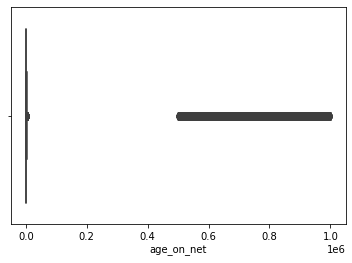

In [433]:
sns.boxplot(deta['age_on_net'])

In [434]:
deta[deta['age_on_net']>2020].shape

(4469, 33)

In [435]:
print(np.percentile(deta['age_on_net'],99))

2420.079999999987


In [436]:
deta['age_on_net'].values[deta['age_on_net'] < 0] = 0

In [437]:
deta['age_on_net'].min()

0.0

In [438]:
deta['age_on_net'].values[deta['age_on_net'] > 2018] = 2018

In [439]:
deta[deta['age_on_net']>2018].shape

(0, 33)

<AxesSubplot:xlabel='age_on_net'>

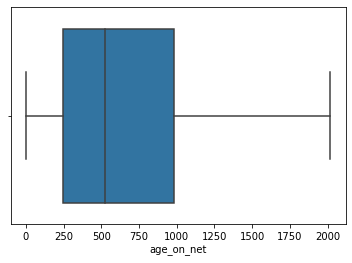

In [440]:
sns.boxplot(deta['age_on_net'])

In [441]:
deta.shape

(209593, 33)

In [442]:
deta['age_on_net'].skew()

0.9209768543310076

<AxesSubplot:xlabel='age_on_net', ylabel='Density'>

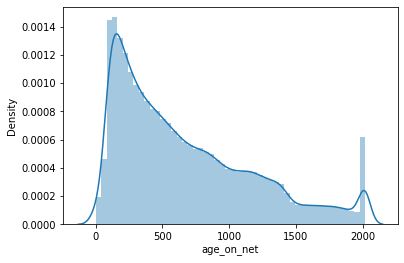

In [443]:
# Skewness also reduced
sns.distplot(deta['age_on_net'])

In [451]:
print(np.cbrt((deta['age_on_net']+1)).skew())
deta['age_on_net']=np.cbrt((deta['age_on_net']+1))

-0.04754043807618085


In [452]:
deta['age_on_net'].describe()

count    209593.000000
mean          8.122595
std           2.336537
min           1.000000
25%           6.274305
50%           8.082480
75%           9.943009
max          12.638982
Name: age_on_net, dtype: float64

In [453]:
deta['age_on_net'].isnull().sum()

0

In [19]:
X, Y=data.drop(['label'], axis=1), data['label']

In [20]:
xtr, xte, ytr, yte = train_test_split(X,Y,test_size=0.25,random_state=0,stratify=Y)

In [21]:
yte.value_counts()

1    45858
0     6541
Name: label, dtype: int64

In [22]:
ytr.value_counts()

1    137573
0     19621
Name: label, dtype: int64

In [23]:
# Now, lets concat and make two data frames train and test
train=pd.concat([xtr, ytr], axis=1)
test=pd.concat([xte, yte], axis=1)

In [24]:
xtr.shape

(157194, 35)

In [25]:
train.shape

(157194, 36)

In [26]:
xte.shape

(52399, 35)

In [27]:
test.shape

(52399, 36)

In [506]:
# All the shapes are sensible

In [507]:
# Now, lets drop unwanted columns
train['pcircle'].value_counts()

UPW    157194
Name: pcircle, dtype: int64

In [28]:
train.drop(['mobile', 'pdate', 'pcircle'], axis=1, inplace=True)
test.drop(['mobile', 'pdate', 'pcircle'], axis=1, inplace=True)

In [475]:
# Also, lets look into some other columns

print(train[train['last_rech_days_data']==0].shape)
print(train[train['cnt_data_rech_30']==0].shape)
print(train[train['freq_data_rech_30']==0].shape)
print(train[train['cnt_data_rech_90']==0].shape)
print(train[train['freq_data_rech_90']==0].shape)

(152218, 33)
(154126, 33)
(155998, 33)
(153240, 33)
(156552, 33)


In [473]:
152218/157194 # Almost 97% values are same, so lets drop it

0.9683448477677266

In [29]:
train.drop(['last_rech_days_data', 'cnt_data_rech_30', 'freq_data_rech_30','cnt_data_rech_90','freq_data_rech_90'], axis=1, inplace=True)
test.drop(['last_rech_days_data', 'cnt_data_rech_30', 'freq_data_rech_30','cnt_data_rech_90','freq_data_rech_90'], axis=1, inplace=True)

In [477]:
train.describe()

,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans_90,payback_30,payback_90,label
count,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.00000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000
mean,8220.498504,5370.032445,6069.213407,2699.437609,3490.128759,3721.205966,2066.06298,3.969274,3788.011288,7696.004510,1813.517472,3781.904889,6.297390,7.712731,12377.353035,1866.357819,91.031520,2.753909,17.918623,275.962072,0.054468,18.569770,23.605672,6.705905,0.046373,3.382187,4.298295,0.875180
std,76251.326142,9181.549303,10889.687522,4335.573459,5795.562362,53637.465185,2367.99088,4.223202,53938.424385,10162.003846,2066.133385,53630.807232,7.130586,12.592858,16867.685603,2076.060096,339.568333,2.547300,17.337394,4254.192127,0.218957,225.419974,26.395764,2.104685,0.201316,8.724612,10.218313,0.330516
min,-48.000000,-46.215000,-46.215000,-23737.140000,-24720.580000,-29.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,246.000000,42.364500,42.591250,280.130000,300.700000,1.000000,770.00000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.000000,0.000000,2316.000000,773.000000,14.610000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,1.000000
50%,528.000000,1462.918000,1500.000000,1085.080000,1334.685000,3.000000,1539.00000,3.000000,2.000000,4626.000000,1539.000000,34.000000,4.000000,2.000000,7226.000000,1539.000000,36.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,1.000000
75%,984.000000,7239.942167,7795.830000,3362.822500,4205.300000,7.000000,2309.00000,5.000000,6.000000,10009.000000,1924.000000,83.000000,8.000000,8.000000,16000.000000,1924.000000,79.200000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,1.000000
max,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,997676.760075,55000.00000,115.000000,999606.368132,810096.000000,55000.000000,999479.419319,172.000000,88.000000,953036.000000,55000.000000,41456.500000,50.000000,306.000000,99864.560864,3.000000,4992.821587,438.000000,12.000000,3.000000,171.500000,171.500000,1.000000


In [478]:
# Lets start treating the columns one by one

In [479]:
# Age_on_net
# Problems
# data is fractional
# data is negative
# max is very high

In [481]:
# we can just replace all the -ve values with 0 
# or we can remove them
# or we can just flip the negative sign

# Broadly, we'll either flip the sign or replace it with zero
# At last we may try removing it completely
# Therefore, there will be three stages in our data cleaning



In [ ]:
# First of all, there are no missing values

# Looking at the results of describe, we can say that something is fishy in:

# age_on_net (min is -ve and max is too large, also days can't be in fraction)

# daily_dec_30, daily_dec_90, rental_30, rental_90 (all has -ve min and way too large max)

# last_rech_days_main, last_rech_days_data (unusual min and max values, also days can't be in fraction)

# last_rech_amt_main (how the value of recharge can be 0, also very high maxm)

# cnt_main_rech_30, freq_main_rech_30 (unusually high values)

# sum_amt_main_rech_30, median_amt_main_rech_30 (unusually high values)

# median_main_rech_prebal_30 (-ve min and too high max)

# cnt_main_rech_90, freq_main_rech_90 (unusually high values)

# sum_amt_main_rech_90, median_amt_main_rech_90 (unusually high values)

# median_main_rech_prebal_90 (-ve min and too high max)

# cnt_data_rech_30, freq_data_rech_30 (most of the values are 0 but still max is very very high, count in fraction)

# cnt_data_rech_90, freq_data_rech_90 (most of the values are 0 but still max is high)

# cnt_loans_30, amt_loans_30 (max values are little high)

# max_amt_loans_30 (max is tooo high)

# median_amt_loans_30 (how can the max of median be 3)
# That means probably a lot of people didn't even take any loan

# cnt_loans_90 (max is very high, also count can't be fraction), amt_loans_90 (max is a little high)
              
# payback_30, payback_90 (max is too high)
              
# Also check whether there are fraction values in the count columns

# Data Cleaning 1

### Age on net

In [482]:
# Replace -ve values with 0

In [30]:
train['age_on_net'].values[train['age_on_net'] < 0] = 0

In [511]:
upper(train, 'age_on_net')

2091.0

In [31]:
train['age_on_net'].values[train['age_on_net'] > 2091] = 2091

In [513]:
# Lets check for fractional values

index=[]
for i in range(len(train['age_on_net'])):
    if int(train['age_on_net'].iloc[i]) < train['age_on_net'].iloc[i]:
        index.append(i)
        
len(index)

0

In [522]:
# There are no fractional values
# Another way to check for the same

len(np.where(train['age_on_net'].apply(float.is_integer))[0])

157194

In [523]:
len(np.where(~train['age_on_net'].apply(float.is_integer))[0])

0

In [524]:
print(train['age_on_net'].skew())

0.9493131605364541


In [32]:
# Lets remove the skewness
print(np.cbrt((train['age_on_net']+1)).skew())
train['age_on_net']=np.cbrt((train['age_on_net']+1))

-0.03909890457971135


In [526]:
print(train['age_on_net'].describe())

count    157194.000000
mean          8.130698
std           2.343186
min           1.000000
25%           6.274305
50%           8.087579
75%           9.949748
max          12.789510
Name: age_on_net, dtype: float64


<AxesSubplot:xlabel='age_on_net'>

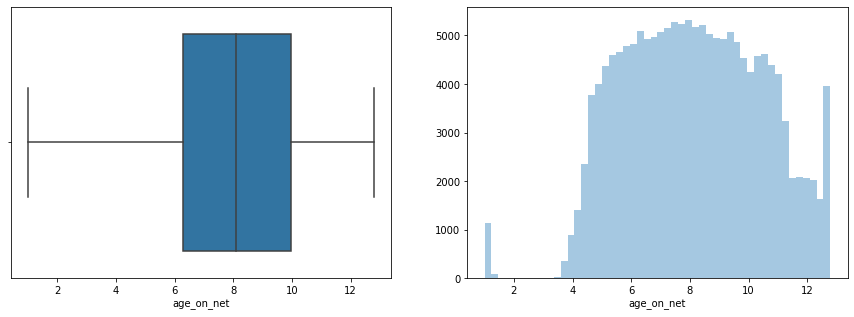

In [527]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['age_on_net'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['age_on_net'], label='age_on_net', ax=ax2, kde=False)

In [33]:
# Now, lets extend the changes to test
test['age_on_net'].values[test['age_on_net'] < 0] = 0
test['age_on_net'].values[test['age_on_net'] > 2091] = 2091

In [34]:
len(np.where(~test['age_on_net'].apply(float.is_integer))[0])

0

In [35]:

test['age_on_net']=np.cbrt((test['age_on_net']+1))

### Daily decr 30

In [36]:
train['daily_decr_30'].values[train['daily_decr_30'] < 0] = 0

In [534]:
upper(train, 'daily_decr_30')

18036.30866666667

In [37]:
train['daily_decr_30'].values[train['daily_decr_30'] > 18036] = 18036

In [536]:
print(train['daily_decr_30'].skew())

1.2402314390054963


In [38]:
# Lets remove the skewness
# print(np.cbrt((train['daily_decr_30']+1)).skew())
print(np.power((train['daily_decr_30']+1), 0.20).skew())
train['daily_decr_30']=np.power((train['daily_decr_30']+1),0.20)
print(train['daily_decr_30'].skew())

0.014499352850032295
0.014499352850032295


In [544]:
print(train['daily_decr_30'].describe())

count    157194.000000
mean          4.103549
std           2.001434
min           1.000000
25%           2.125332
50%           4.296387
75%           5.915058
max           7.099583
Name: daily_decr_30, dtype: float64


<AxesSubplot:xlabel='daily_decr_30'>

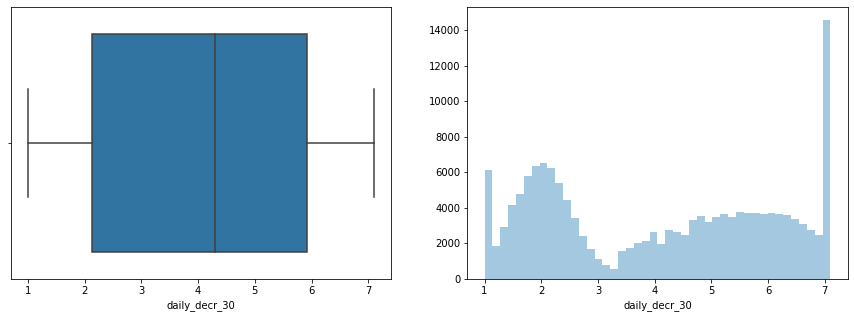

In [545]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['daily_decr_30'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['daily_decr_30'], ax=ax2, kde=False)

In [39]:
# Now, lets extend the changes to test
test['daily_decr_30'].values[test['daily_decr_30'] < 0] = 0
test['daily_decr_30'].values[test['daily_decr_30'] > 18036] = 18036
test['daily_decr_30']=np.power((test['daily_decr_30']+1),0.20)

In [59]:
test['daily_decr_30'].isnull().sum()

0

### Daily decr 90

In [40]:
train['daily_decr_90'].values[train['daily_decr_90'] < 0] = 0

In [548]:
upper(train, 'daily_decr_90')

19425.688125

In [41]:
train['daily_decr_90'].values[train['daily_decr_90'] > 19425] = 19425

In [42]:
print(train['daily_decr_90'].skew())

1.2393357866680275


In [43]:
# Lets remove the skewness
# print(np.cbrt((train['daily_decr_90']+1)).skew())
print(np.power((train['daily_decr_90']+1), 0.20).skew())
train['daily_decr_90']=np.power((train['daily_decr_90']+1),0.20)
print(train['daily_decr_90'].skew())

0.03488706339307617
0.03488706339307617


In [553]:
print(train['daily_decr_90'].skew())

0.03488706339307617


In [554]:
print(train['daily_decr_90'].describe())

count    157194.000000
mean          4.149304
std           2.048202
min           1.000000
25%           2.127550
50%           4.317935
75%           6.003211
max           7.205708
Name: daily_decr_90, dtype: float64


<AxesSubplot:xlabel='daily_decr_90'>

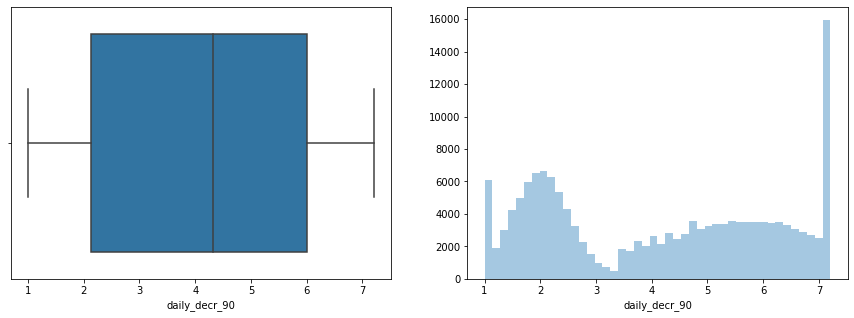

In [555]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['daily_decr_90'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['daily_decr_90'], ax=ax2, kde=False)

In [44]:
# Now, lets extend the changes to test
test['daily_decr_90'].values[test['daily_decr_90'] < 0] = 0
test['daily_decr_90'].values[test['daily_decr_90'] > 19425] = 19425
test['daily_decr_90']=np.power((test['daily_decr_90']+1),0.20)

### Rental 30

In [45]:
train['rental_30'].values[train['rental_30'] < 0] = 0

In [559]:
upper(train, 'rental_30')

7986.86125

In [46]:
train['rental_30'].values[train['rental_30'] > 7986] = 7986

In [561]:
print(train['rental_30'].skew())

1.2154231459989406


<AxesSubplot:xlabel='rental_30'>

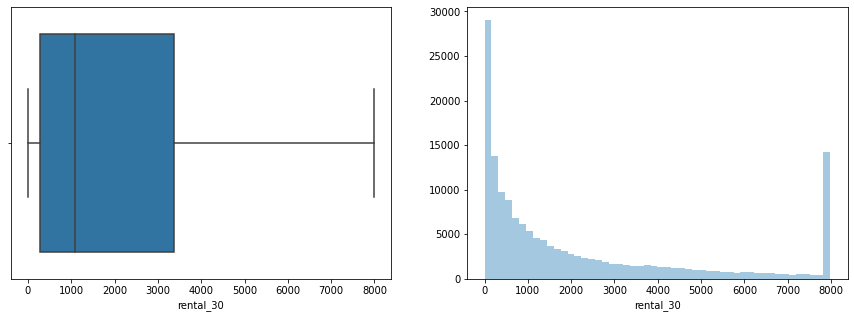

In [562]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['rental_30'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['rental_30'], ax=ax2, kde=False)

In [47]:
# Lets remove the skewness
print(np.cbrt((train['rental_30']+1)).skew())
print(np.power((train['rental_30']+1), 0.30).skew())
train['rental_30']=np.power((train['rental_30']+1),0.30)
print(train['rental_30'].skew())

0.10009528649077395
-0.004955216888331301
-0.004955216888331301


<AxesSubplot:xlabel='rental_30'>

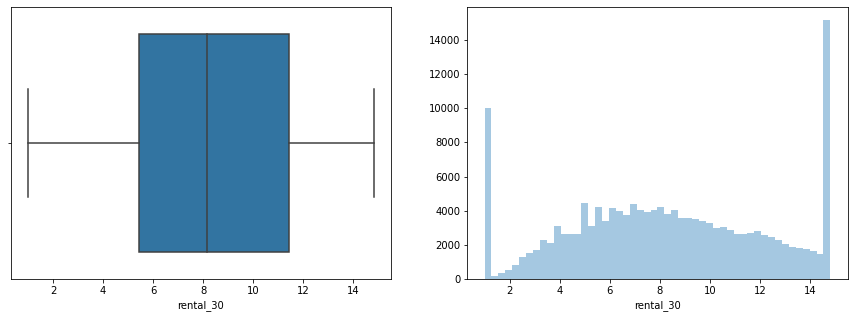

In [567]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['rental_30'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['rental_30'], ax=ax2, kde=False)

In [48]:
# Now, lets extend the changes to test
test['rental_30'].values[test['rental_30'] < 0] = 0
test['rental_30'].values[test['rental_30'] > 7986] = 7986
test['rental_30']=np.power((test['rental_30']+1),0.30)

### Rental_90

In [49]:
train['rental_90'].values[train['rental_90'] < 0] = 0

In [50]:
upper(train, 'rental_90')

10062.2

In [51]:
train['rental_90'].values[train['rental_90'] > 10062] = 10062

In [572]:
print(train['rental_90'].skew())

1.2117342950593228


<AxesSubplot:xlabel='rental_90'>

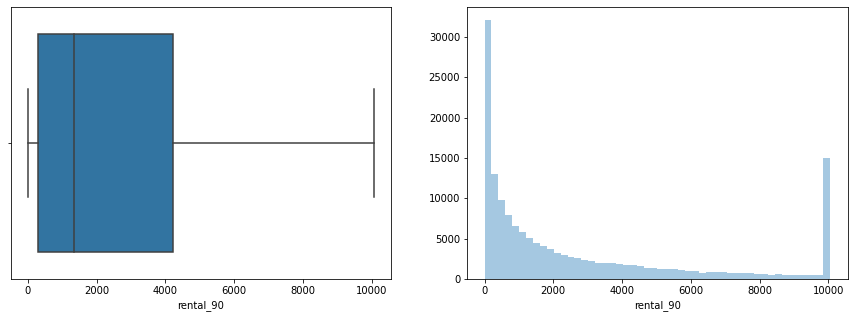

In [573]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['rental_90'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['rental_90'], ax=ax2, kde=False)

In [52]:
# Lets remove the skewness
print(np.cbrt((train['rental_90']+1)).skew())
print(np.power((train['rental_90']+1), 0.30).skew())
train['rental_90']=np.power((train['rental_90']+1),0.30)
print(train['rental_90'].skew())

0.11534469173635
0.012969499131128614
0.012969499131128614


<AxesSubplot:xlabel='rental_90'>

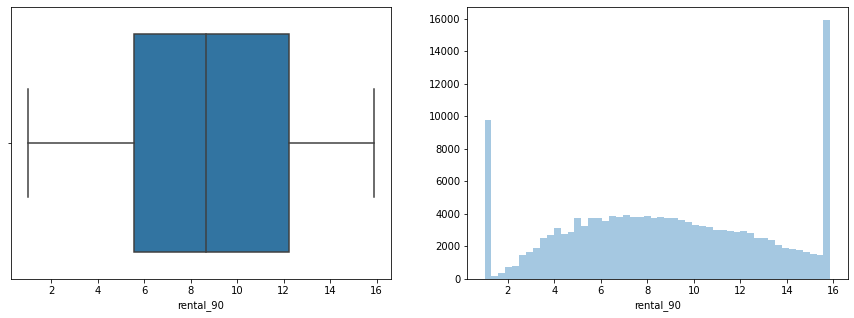

In [576]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['rental_90'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['rental_90'], ax=ax2, kde=False)

In [53]:
# Now, lets extend the changes to test
test['rental_90'].values[test['rental_90'] < 0] = 0
test['rental_90'].values[test['rental_90'] > 10062] = 10062
test['rental_90']=np.power((test['rental_90']+1),0.30)

### last_rech_days_main

In [54]:
train['last_rech_days_main'].values[train['last_rech_days_main'] < 0] = 0

In [579]:
upper(train, 'last_rech_days_main')

16.0

In [55]:
train['last_rech_days_main'].values[train['last_rech_days_main'] > 16] = 16

In [56]:
print(train['last_rech_days_main'].skew())

1.1571093455317683


<AxesSubplot:xlabel='last_rech_days_main'>

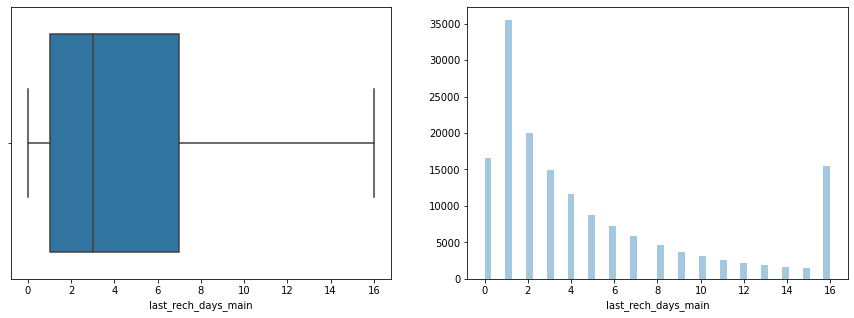

In [582]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['last_rech_days_main'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['last_rech_days_main'], ax=ax2, kde=False)

In [57]:
# Lets remove the skewness
print(np.cbrt((train['last_rech_days_main']+1)).skew())
print(np.power((train['last_rech_days_main']+1), 0.01).skew())
train['last_rech_days_main']=np.power((train['last_rech_days_main']+1),0.01)
print(train['last_rech_days_main'].skew())

0.505060104914651
0.10526282417155654
0.10526282417155654


<AxesSubplot:xlabel='last_rech_days_main'>

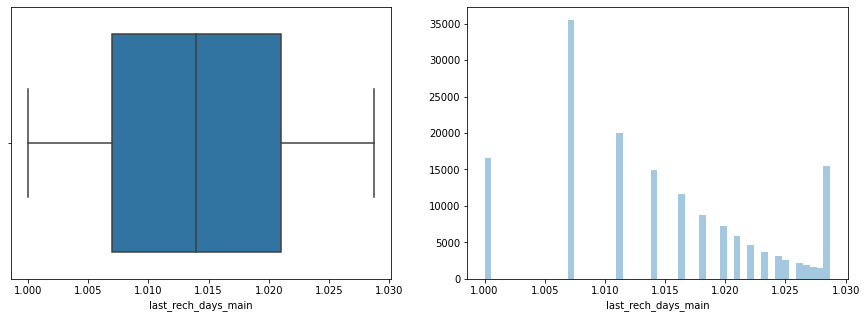

In [588]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['last_rech_days_main'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['last_rech_days_main'], ax=ax2, kde=False)

In [58]:
# Now, lets extend the changes to test
test['last_rech_days_main'].values[test['last_rech_days_main'] < 0] = 0
test['last_rech_days_main'].values[test['last_rech_days_main'] > 16] = 16
test['last_rech_days_main']=np.power((test['last_rech_days_main']+1),0.01)

### last_rech_amt_main

In [590]:
train[train['last_rech_amt_main']==0].shape

(15762, 28)

In [591]:
upper(train, 'last_rech_amt_main')

4617.5

In [60]:
train['last_rech_amt_main'].values[train['last_rech_amt_main'] > 4617] = 4617

In [593]:
print(train['last_rech_amt_main'].skew())

1.0006239880802579


<AxesSubplot:xlabel='last_rech_amt_main'>

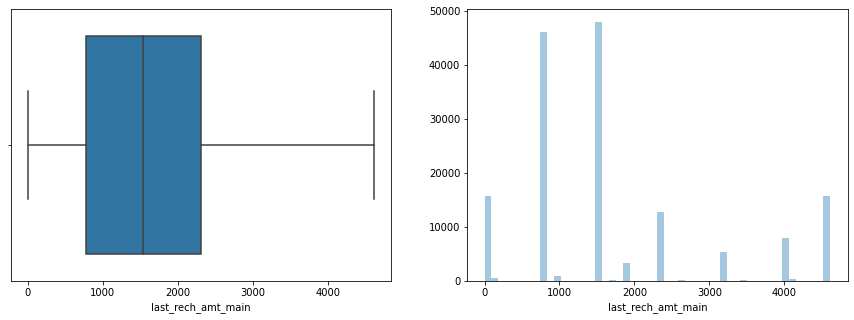

In [594]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['last_rech_amt_main'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['last_rech_amt_main'], ax=ax2, kde=False)

In [61]:
# Lets remove the skewness
print(np.sqrt((train['last_rech_amt_main']+1)).skew())
print(np.power((train['last_rech_amt_main']+1), 0.55).skew())
train['last_rech_amt_main']=np.power((train['last_rech_amt_main']+1),0.55)
print(train['last_rech_amt_main'].skew())

-0.19161766474259007
-0.002772233891237218
-0.002772233891237218


<AxesSubplot:xlabel='last_rech_amt_main'>

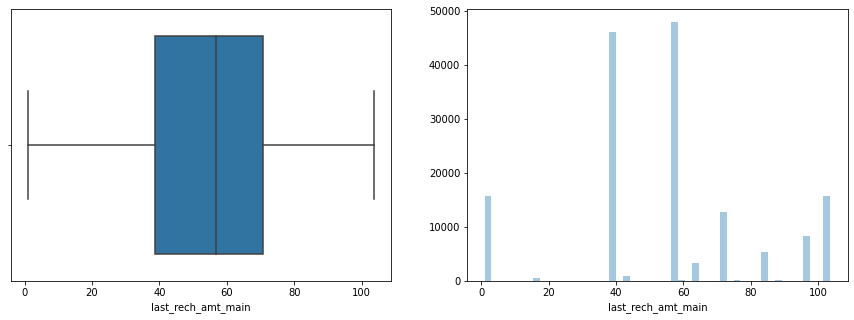

In [600]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['last_rech_amt_main'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['last_rech_amt_main'], ax=ax2, kde=False)

In [62]:
# Now, lets extend the changes to test
test['last_rech_amt_main'].values[test['last_rech_amt_main'] < 0] = 0
test['last_rech_amt_main'].values[test['last_rech_amt_main'] > 4617] = 4617
test['last_rech_amt_main']=np.power((test['last_rech_amt_main']+1),0.55)

### cnt_main_rech_30

In [603]:
upper(train, 'cnt_main_rech_30')

11.0

In [63]:
train['cnt_main_rech_30'].values[train['cnt_main_rech_30'] > 11] = 11

In [606]:
print(train['cnt_main_rech_30'].skew())

0.90612292964646


<AxesSubplot:xlabel='cnt_main_rech_30'>

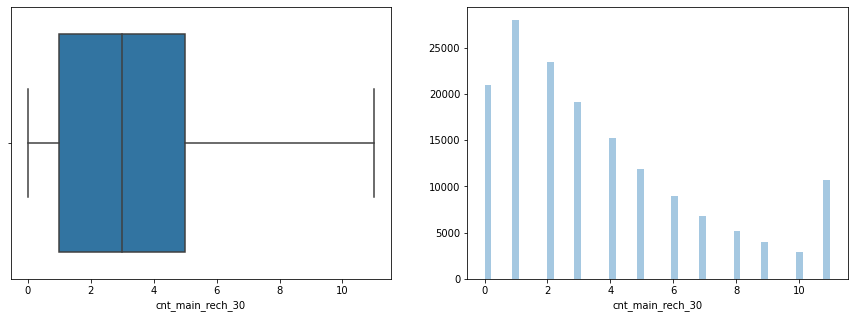

In [607]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['cnt_main_rech_30'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['cnt_main_rech_30'], ax=ax2, kde=False)

In [64]:
# Lets remove the skewness
print(np.cbrt((train['cnt_main_rech_30']+1)).skew())
print(np.power((train['cnt_main_rech_30']+1), 0.20).skew())
train['cnt_main_rech_30']=np.power((train['cnt_main_rech_30']+1),0.20)
print(train['cnt_main_rech_30'].skew())

0.1881972716553821
0.028328858802292953
0.028328858802292953


<AxesSubplot:xlabel='cnt_main_rech_30'>

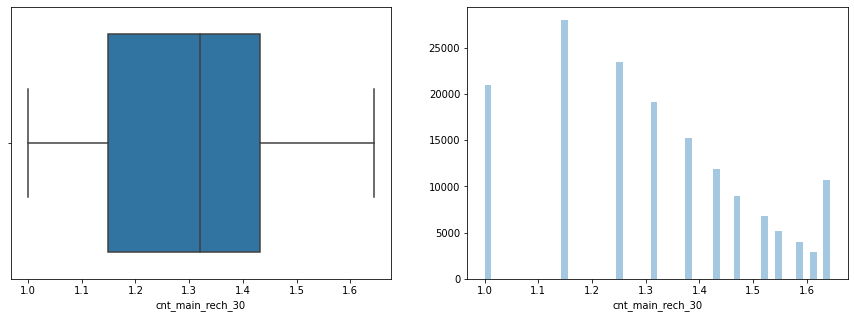

In [611]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['cnt_main_rech_30'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['cnt_main_rech_30'], ax=ax2, kde=False)

In [65]:
# Now, lets extend the changes to test
test['cnt_main_rech_30'].values[test['cnt_main_rech_30'] < 0] = 0
test['cnt_main_rech_30'].values[test['cnt_main_rech_30'] > 11] = 11
test['cnt_main_rech_30']=np.power((test['cnt_main_rech_30']+1),0.20)

### freq_main_rech_30

In [613]:
upper(train, 'freq_main_rech_30')

15.0

In [66]:
train['freq_main_rech_30'].values[train['freq_main_rech_30'] > 15] = 15

In [615]:
print(train['freq_main_rech_30'].skew())

1.2532855425436644


<AxesSubplot:xlabel='freq_main_rech_30'>

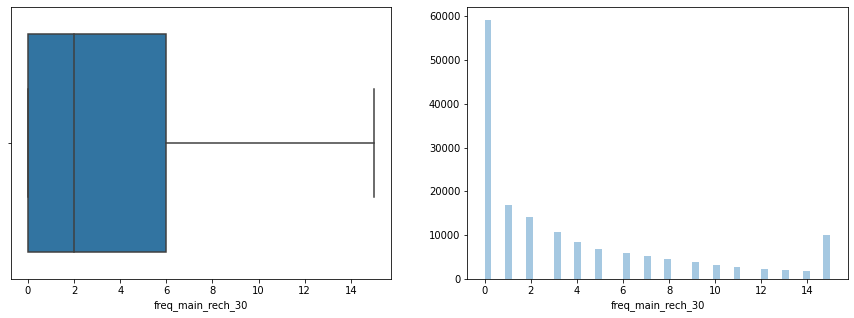

In [616]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['freq_main_rech_30'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['freq_main_rech_30'], ax=ax2, kde=False)

In [67]:
# Lets remove the skewness
print(np.cbrt((train['freq_main_rech_30']+1)).skew())
print(np.power((train['freq_main_rech_30']+1), 0.01).skew())
train['freq_main_rech_30']=np.power((train['freq_main_rech_30']+1),0.01)
print(train['freq_main_rech_30'].skew())

0.6081888959970673
0.31360779891474017
0.31360779891474017


<AxesSubplot:xlabel='freq_main_rech_30'>

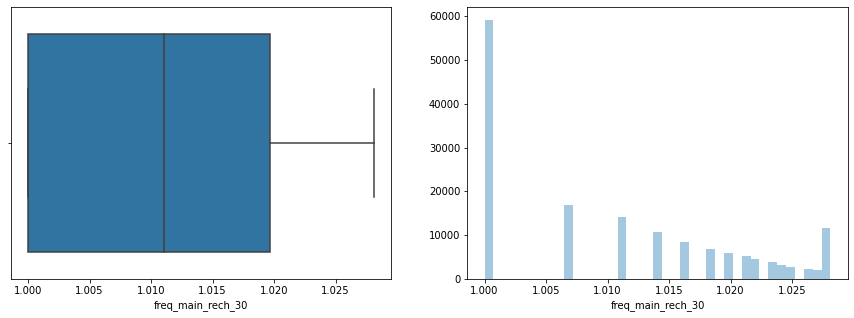

In [624]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['freq_main_rech_30'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['freq_main_rech_30'], ax=ax2, kde=False)

In [68]:
# Now, lets extend the changes to test
test['freq_main_rech_30'].values[test['freq_main_rech_30'] < 0] = 0
test['freq_main_rech_30'].values[test['freq_main_rech_30'] > 15] = 15
test['freq_main_rech_30']=np.power((test['freq_main_rech_30']+1),0.01)

### sum_amt_main_rech_30

In [626]:
upper(train, 'sum_amt_main_rech_30')

22712.5

In [69]:
train['sum_amt_main_rech_30'].values[train['sum_amt_main_rech_30'] > 22712] = 22712

In [628]:
print(train['sum_amt_main_rech_30'].skew())

1.0813201155641965


<AxesSubplot:xlabel='sum_amt_main_rech_30'>

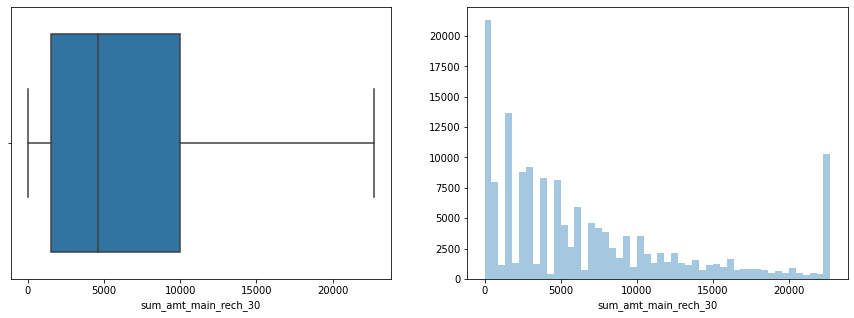

In [629]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['sum_amt_main_rech_30'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['sum_amt_main_rech_30'], ax=ax2, kde=False)

In [70]:
# Lets remove the skewness
print(np.sqrt((train['sum_amt_main_rech_30']+1)).skew())
print(np.power((train['sum_amt_main_rech_30']+1), 0.50).skew())
train['sum_amt_main_rech_30']=np.power((train['sum_amt_main_rech_30']+1),0.50)
print(train['sum_amt_main_rech_30'].skew())

0.09846647729254272
0.09846647729254272
0.09846647729254272


<AxesSubplot:xlabel='sum_amt_main_rech_30'>

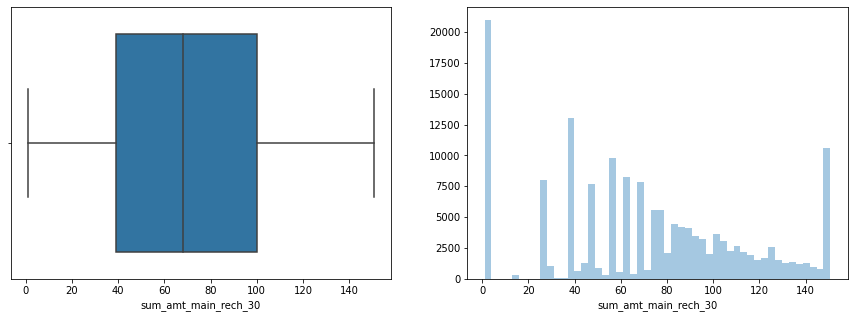

In [634]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['sum_amt_main_rech_30'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['sum_amt_main_rech_30'], ax=ax2, kde=False)

In [635]:
train['sum_amt_main_rech_30'].isnull().sum()

0

In [71]:
# Now, lets extend the changes to test
test['sum_amt_main_rech_30'].values[test['sum_amt_main_rech_30'] < 0] = 0
test['sum_amt_main_rech_30'].values[test['sum_amt_main_rech_30'] > 22712] = 22712
test['sum_amt_main_rech_30']=np.power((test['sum_amt_main_rech_30']+1),0.50)

### median_amt_main_rech_30

In [637]:
upper(train, 'median_amt_main_rech_30')

3655.0

In [72]:
train['median_amt_main_rech_30'].values[train['median_amt_main_rech_30'] > 3655] = 3655

In [639]:
print(train['median_amt_main_rech_30'].skew())

0.7280022906501523


<AxesSubplot:xlabel='median_amt_main_rech_30'>

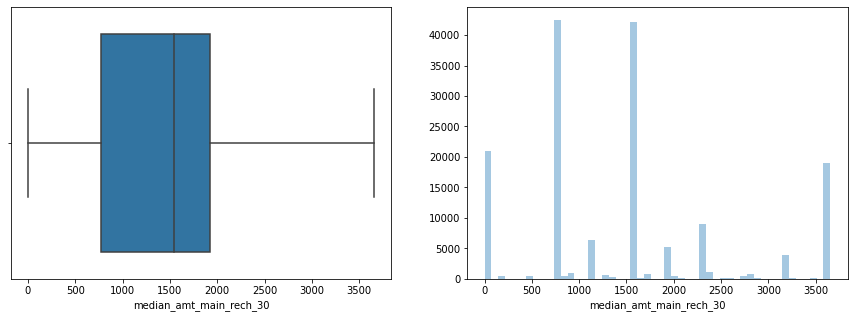

In [640]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['median_amt_main_rech_30'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['median_amt_main_rech_30'], ax=ax2, kde=False)

In [73]:
# Lets remove the skewness
print(np.sqrt((train['median_amt_main_rech_30']+1)).skew())
print(np.power((train['median_amt_main_rech_30']+1), 0.66).skew())
train['median_amt_main_rech_30']=np.power((train['median_amt_main_rech_30']+1),0.66)
print(train['median_amt_main_rech_30'].skew())

-0.518940045057658
-0.008415041101574447
-0.008415041101574447


<AxesSubplot:xlabel='median_amt_main_rech_30'>

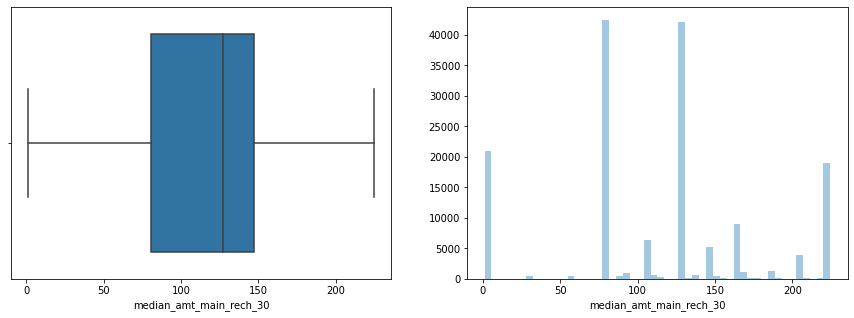

In [648]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['median_amt_main_rech_30'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['median_amt_main_rech_30'], ax=ax2, kde=False)

In [74]:
# Now, lets extend the changes to test
test['median_amt_main_rech_30'].values[test['median_amt_main_rech_30'] < 0] = 0
test['median_amt_main_rech_30'].values[test['median_amt_main_rech_30'] > 3655] = 3655
test['median_amt_main_rech_30']=np.power((test['median_amt_main_rech_30']+1),0.66)

### median_main_rech_prebal_30

In [651]:
train[train['median_main_rech_prebal_30']<0].shape

(1236, 28)

In [75]:
train['median_main_rech_prebal_30'].values[train['median_main_rech_prebal_30'] < 0] = 0

In [653]:
upper(train, 'median_main_rech_prebal_30')

191.0

In [76]:
train['median_main_rech_prebal_30'].values[train['median_main_rech_prebal_30'] > 191] = 191

In [655]:
print(train['median_main_rech_prebal_30'].skew())

1.1128845110518404


<AxesSubplot:xlabel='median_main_rech_prebal_30'>

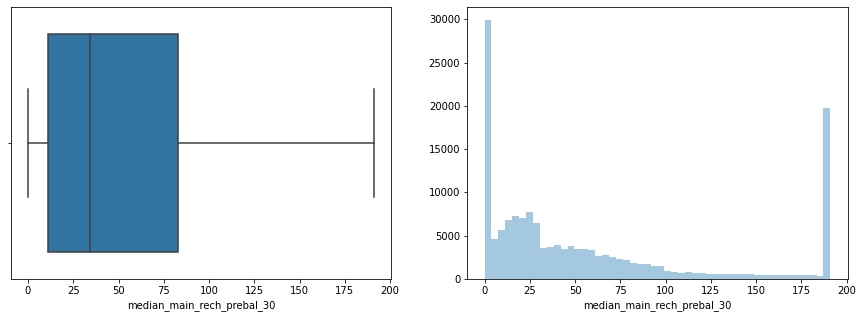

In [656]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['median_main_rech_prebal_30'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['median_main_rech_prebal_30'], ax=ax2, kde=False)

In [77]:
# Lets remove the skewness
print(np.cbrt((train['median_main_rech_prebal_30']+1)).skew())
print(np.power((train['median_main_rech_prebal_30']+1), 0.33).skew())
train['median_main_rech_prebal_30']=np.power((train['median_main_rech_prebal_30']+1),0.33)
print(train['median_main_rech_prebal_30'].skew())

0.03864627198592242
0.030928136022544645
0.030928136022544645


<AxesSubplot:xlabel='median_main_rech_prebal_30'>

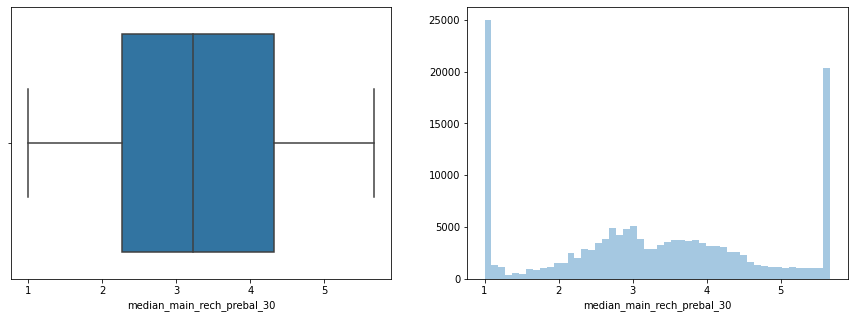

In [661]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['median_main_rech_prebal_30'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['median_main_rech_prebal_30'], ax=ax2, kde=False)

In [78]:
# Now, lets extend the changes to test
test['median_main_rech_prebal_30'].values[test['median_main_rech_prebal_30'] < 0] = 0
test['median_main_rech_prebal_30'].values[test['median_main_rech_prebal_30'] > 191] = 191
test['median_main_rech_prebal_30']=np.power((test['median_main_rech_prebal_30']+1),0.33)

### cnt_main_rech_90

In [672]:
upper(train, 'cnt_main_rech_90')

17.0

In [79]:
train['cnt_main_rech_90'].values[train['cnt_main_rech_90'] > 17] = 17

In [675]:
print(train['cnt_main_rech_90'].skew())

0.9364544929067854


<AxesSubplot:xlabel='cnt_main_rech_90'>

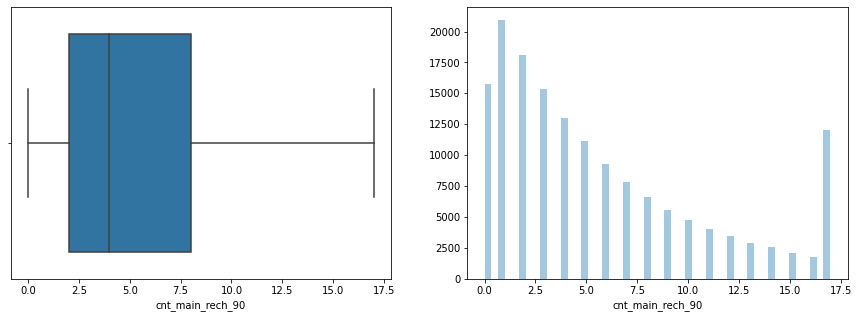

In [676]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['cnt_main_rech_90'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['cnt_main_rech_90'], ax=ax2, kde=False)

In [80]:
# Lets remove the skewness
print(np.cbrt((train['cnt_main_rech_90']+1)).skew())
print(np.power((train['cnt_main_rech_90']+1), 0.2).skew())
train['cnt_main_rech_90']=np.power((train['cnt_main_rech_90']+1),0.2)
print(train['cnt_main_rech_90'].skew())

0.1951400473479153
0.01948169929417003
0.01948169929417003


In [81]:
# Now, lets extend the changes to test
test['cnt_main_rech_90'].values[test['cnt_main_rech_90'] > 17] = 17
test['cnt_main_rech_90']=np.power((test['cnt_main_rech_90']+1),0.2)

### freq_main_rech_90

In [683]:
upper(train, 'freq_main_rech_90')

20.0

In [82]:
train['freq_main_rech_90'].values[train['freq_main_rech_90'] > 20] = 20

In [685]:
print(train['freq_main_rech_90'].skew())

1.1725737724571592


<AxesSubplot:xlabel='freq_main_rech_90'>

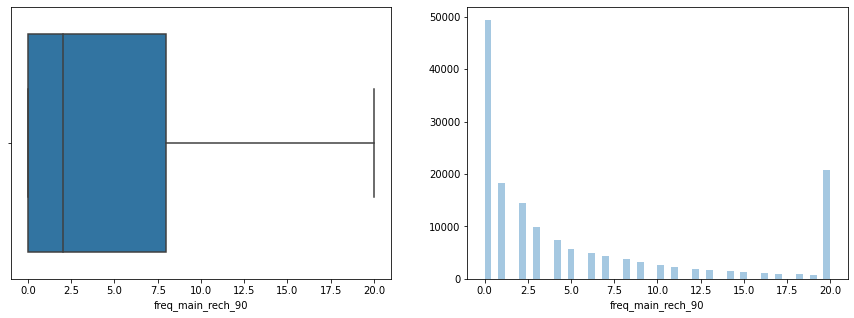

In [686]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['freq_main_rech_90'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['freq_main_rech_90'], ax=ax2, kde=False)

In [83]:
# Lets remove the skewness
print(np.cbrt((train['freq_main_rech_90']+1)).skew())
print(np.power((train['freq_main_rech_90']+1), 0.01).skew())
train['freq_main_rech_90']=np.power((train['freq_main_rech_90']+1),0.01)
print(train['freq_main_rech_90'].skew())

0.5999674777133461
0.270771493519475
0.270771493519475


<AxesSubplot:xlabel='freq_main_rech_90'>

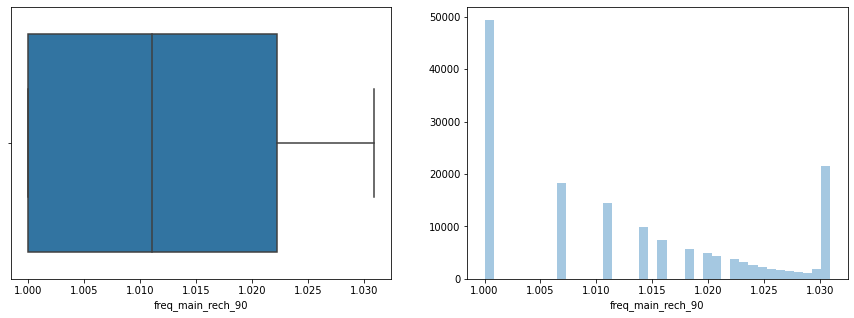

In [692]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['freq_main_rech_90'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['freq_main_rech_90'], ax=ax2, kde=False)

In [84]:
# Now, lets extend the changes to test
test['freq_main_rech_90'].values[test['freq_main_rech_90'] > 20] = 20
test['freq_main_rech_90']=np.power((test['freq_main_rech_90']+1),0.01)

### sum_amt_main_rech_90

In [694]:
upper(train, 'sum_amt_main_rech_90')

36526.0

In [85]:
train['sum_amt_main_rech_90'].values[train['sum_amt_main_rech_90'] > 36526] = 36526

In [696]:
print(train['sum_amt_main_rech_90'].skew())

1.1281573698750813


In [86]:
# Lets remove the skewness
print(np.sqrt((train['sum_amt_main_rech_90']+1)).skew())
print(np.power((train['sum_amt_main_rech_90']+1), 0.45).skew())
train['sum_amt_main_rech_90']=np.power((train['sum_amt_main_rech_90']+1),0.45)
print(train['sum_amt_main_rech_90'].skew())

0.22538958494629355
0.0753299327690901
0.0753299327690901


<AxesSubplot:xlabel='sum_amt_main_rech_90'>

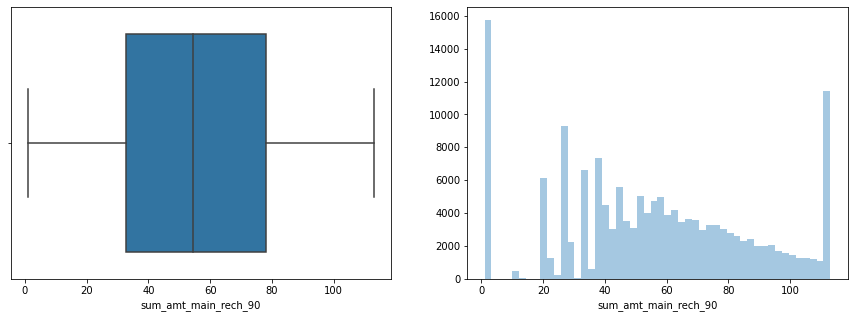

In [703]:
fig=plt.figure()

fig.set_figheight(5)
fig.set_figwidth(15)

ax1=fig.add_subplot(121)
sns.boxplot(train['sum_amt_main_rech_90'], ax=ax1)

ax2=fig.add_subplot(122)
sns.distplot(train['sum_amt_main_rech_90'], ax=ax2, kde=False)

In [87]:
# Now, lets extend the changes to test
test['sum_amt_main_rech_90'].values[test['sum_amt_main_rech_90'] > 36526] = 36526
test['sum_amt_main_rech_90']=np.power((test['sum_amt_main_rech_90']+1),0.45)

### median_amt_main_rech_90

In [705]:
upper(train, 'median_amt_main_rech_90')

3650.5

In [88]:
train['median_amt_main_rech_90'].values[train['median_amt_main_rech_90'] > 3650] = 3650

In [707]:
train['median_amt_main_rech_90'].skew()

0.7625261704138723

In [89]:
# Lets remove the skewness
print(np.sqrt((train['median_amt_main_rech_90']+1)).skew())
print(np.power((train['median_amt_main_rech_90']+1), 0.65).skew())
train['median_amt_main_rech_90']=np.power((train['median_amt_main_rech_90']+1),0.65)
print(train['median_amt_main_rech_90'].skew())

-0.5101956654352553
0.009293780723668878
0.009293780723668878


In [90]:
def plot(i):
    fig=plt.figure()

    fig.set_figheight(5)
    fig.set_figwidth(15)

    ax1=fig.add_subplot(121)
    sns.boxplot(train[i], ax=ax1)

    ax2=fig.add_subplot(122)
    sns.distplot(train[i], ax=ax2, kde=False)

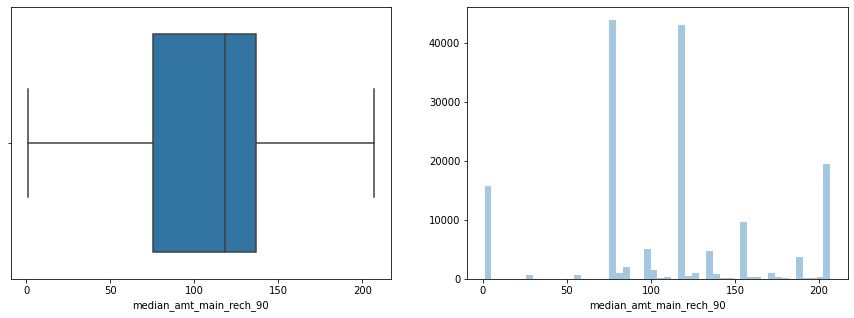

In [713]:
plot('median_amt_main_rech_90')

In [91]:
# Now, lets extend the changes to test
test['median_amt_main_rech_90'].values[test['median_amt_main_rech_90'] > 3650] = 3650
test['median_amt_main_rech_90']=np.power((test['median_amt_main_rech_90']+1),0.65)

### median_main_rech_prebal_90

In [92]:
train['median_main_rech_prebal_90'].values[train['median_main_rech_prebal_90'] < 0] = 0

In [716]:
upper(train, 'median_main_rech_prebal_90')

176.08499999999992

In [93]:
train['median_main_rech_prebal_90'].values[train['median_main_rech_prebal_90'] > 176] = 176

In [718]:
train['median_main_rech_prebal_90'].skew()

1.0860692050034628

In [94]:
# Lets remove the skewness
print(np.sqrt((train['median_main_rech_prebal_90']+1)).skew())
print(np.power((train['median_main_rech_prebal_90']+1), 0.36).skew())
train['median_main_rech_prebal_90']=np.power((train['median_main_rech_prebal_90']+1),0.36)
print(train['median_main_rech_prebal_90'].skew())

0.32976001065685345
0.011134308449782682
0.011134308449782682


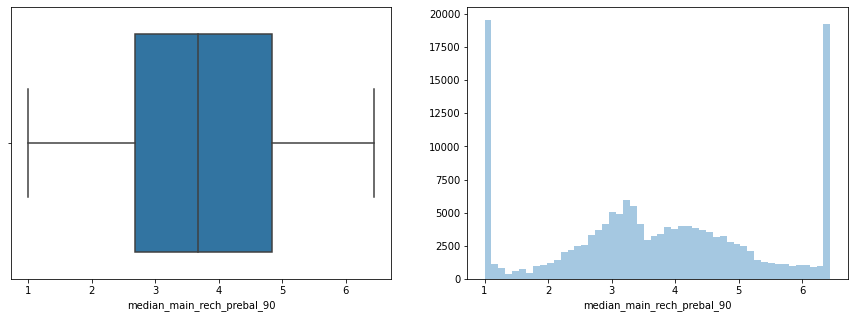

In [724]:
plot('median_main_rech_prebal_90')

In [95]:
# Now, lets extend the changes to test
test['median_main_rech_prebal_90'].values[test['median_main_rech_prebal_90'] < 0] = 0
test['median_main_rech_prebal_90'].values[test['median_main_rech_prebal_90'] > 176] = 176
test['median_main_rech_prebal_90']=np.power((test['median_main_rech_prebal_90']+1),0.36)

### cnt_loans_30

In [744]:
train[train['cnt_loans_30']==0].shape

(2425, 28)

In [726]:
upper(train, 'cnt_loans_30')

8.5

In [96]:
train['cnt_loans_30'].values[train['cnt_loans_30'] > 8] = 8

In [730]:
index=[]
for i in range(len(train['cnt_loans_30'])):
    if int(train['cnt_loans_30'].iloc[i]) < train['cnt_loans_30'].iloc[i]:
        index.append(i)
        
len(index)

0

In [731]:
# All the fraction values are automatically removed

In [732]:
train['cnt_loans_30'].skew()

1.2663162929197866

In [97]:
# Lets remove the skewness
print(np.log((train['cnt_loans_30']+1)).skew())
print(np.power((train['cnt_loans_30']+1), 0.01).skew())
# train['cnt_loans_30']=np.power((train['cnt_loans_30']+1),0.36)
train['cnt_loans_30']=np.log((train['cnt_loans_30']+1))
print(train['cnt_loans_30'].skew())

0.4736125248834737
0.48238014160397946
0.4736125248834737


In [741]:
train['cnt_loans_30'].isnull().sum()

0

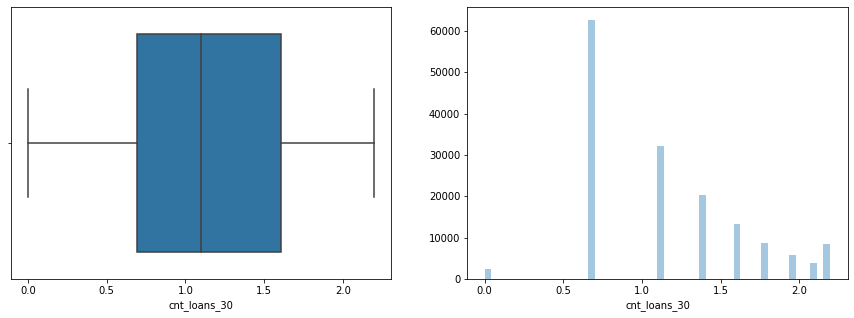

In [742]:
plot('cnt_loans_30')

In [98]:
# Now, lets extend the changes to test
test['cnt_loans_30'].values[test['cnt_loans_30'] > 8] = 8
test['cnt_loans_30']=np.log((test['cnt_loans_30']+1))

In [746]:
index=[]
for i in range(len(test['cnt_loans_30'])):
    if int(test['cnt_loans_30'].iloc[i]) < test['cnt_loans_30'].iloc[i]:
        index.append(i)
        
len(index)

0

### amt_loans_30

In [748]:
train[train['amt_loans_30']==0].shape

(2425, 28)

In [749]:
upper(train, 'amt_loans_30')

51.0

In [99]:
train['amt_loans_30'].values[train['amt_loans_30'] > 51] = 51

In [751]:
index=[]
for i in range(len(train['amt_loans_30'])):
    if int(train['amt_loans_30'].iloc[i]) < train['amt_loans_30'].iloc[i]:
        index.append(i)
        
len(index)

0

In [752]:
train['amt_loans_30'].skew()

1.2347568309078882

In [100]:
# Lets remove the skewness
print(np.sqrt((train['amt_loans_30']+1)).skew())
print(np.power((train['amt_loans_30']+1), 0.10).skew())
train['amt_loans_30']=np.power((train['amt_loans_30']+1),0.10)
# train['amt_loans_30']=np.log((train['amt_loans_30']+1))
print(train['amt_loans_30'].skew())

0.6998138564993042
0.012163939617745484
0.012163939617745484


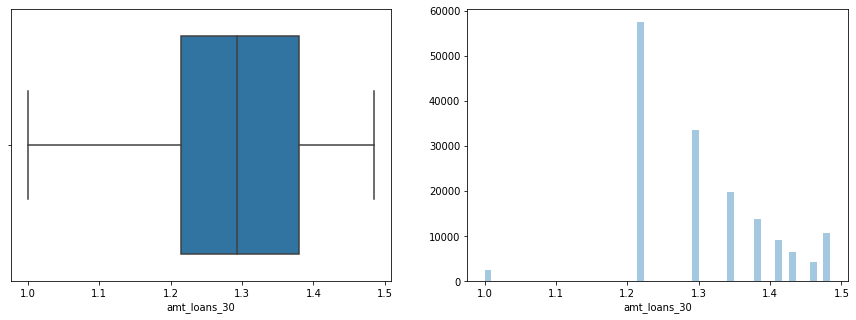

In [757]:
plot('amt_loans_30')

In [101]:
# Now, lets extend the changes to test
test['amt_loans_30'].values[test['amt_loans_30'] > 51] = 51
test['amt_loans_30']=np.power((test['amt_loans_30']+1),0.10)

In [759]:
index=[]
for i in range(len(test['amt_loans_30'])):
    if int(test['amt_loans_30'].iloc[i]) < test['amt_loans_30'].iloc[i]:
        index.append(i)
        
len(index)

0

### max_amt_loans_30

In [761]:
upper(train, 'max_amt_loans_30')

6.0

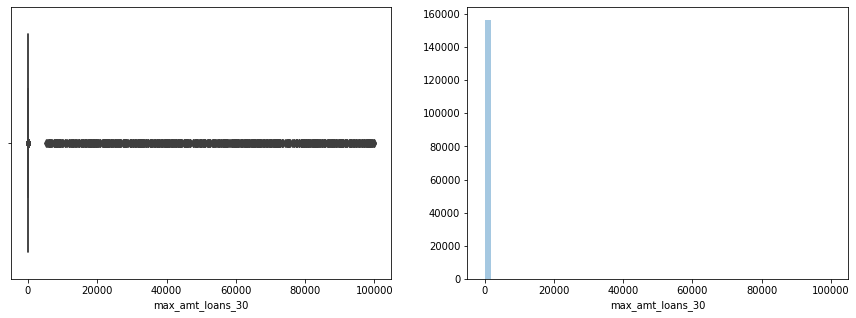

In [762]:
plot('max_amt_loans_30')

In [102]:
train['max_amt_loans_30'].values[train['max_amt_loans_30'] > 12] = 12

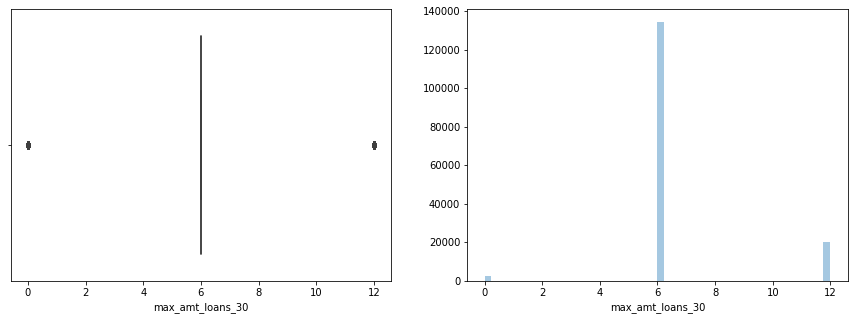

In [764]:
plot('max_amt_loans_30')

In [765]:
train['max_amt_loans_30'].skew()

1.4070278720159086

In [103]:
# Lets remove the skewness
print(np.sqrt((train['max_amt_loans_30']+1)).skew())
print(np.power((train['max_amt_loans_30']+1), 0.10).skew())
train['max_amt_loans_30']=np.power((train['max_amt_loans_30']+1),0.5)
print(train['max_amt_loans_30'].skew())

0.0027566648895767354
-2.210468762736686
0.0027566648895767354


In [104]:
# Now, lets extend the changes to test
test['max_amt_loans_30'].values[test['max_amt_loans_30'] > 12] = 12
test['max_amt_loans_30']=np.power((test['max_amt_loans_30']+1),0.50)

### median_amt_loans_30

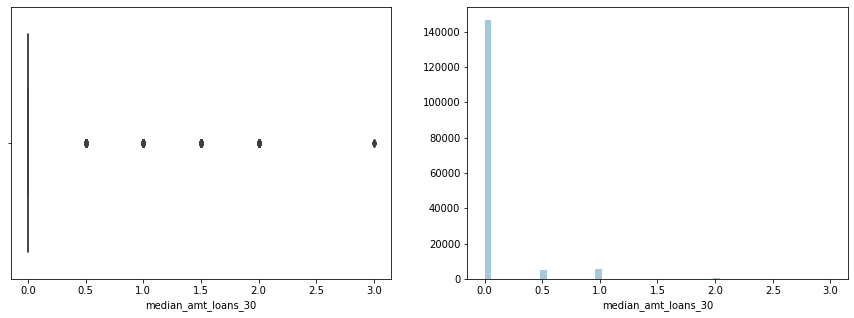

In [769]:
plot('median_amt_loans_30')

In [770]:
upper(train,'median_amt_loans_30')

0.0

In [771]:
train['median_amt_loans_30'].skew()

4.524459989710167

In [775]:
# Lets remove the skewness
print(np.sqrt((train['median_amt_loans_30']+1)).skew())
print(np.power((train['median_amt_loans_30']+1), 0.0001).skew())
# train['median_amt_loans_30']=np.power((train['median_amt_loans_30']+1),0.5)
print(train['median_amt_loans_30'].skew())

4.195402578880325
3.9754858390112977
4.524459989710167


In [776]:
# Skewness can't be removed

### cnt_loans_90

In [777]:
upper(train,'cnt_loans_90')

11.0

In [105]:
train['cnt_loans_90'].values[train['cnt_loans_90'] > 11] = 11

In [779]:
index=[]
for i in range(len(train['cnt_loans_90'])):
    if int(train['cnt_loans_90'].iloc[i]) < train['cnt_loans_90'].iloc[i]:
        index.append(i)
        
len(index)

0

In [780]:
# fraction values automatically removed

In [781]:
train['cnt_loans_90'].skew()

1.2845755336261315

In [106]:
# Lets remove the skewness
print(np.sqrt((train['cnt_loans_90']+1)).skew())
print(np.power((train['cnt_loans_90']+1), 0.01).skew())
train['cnt_loans_90']=np.power((train['cnt_loans_90']+1),0.01)
print(train['cnt_loans_90'].skew())

0.9021635065716508
0.5068944636684523
0.5068944636684523


In [787]:
# Skewness is still there

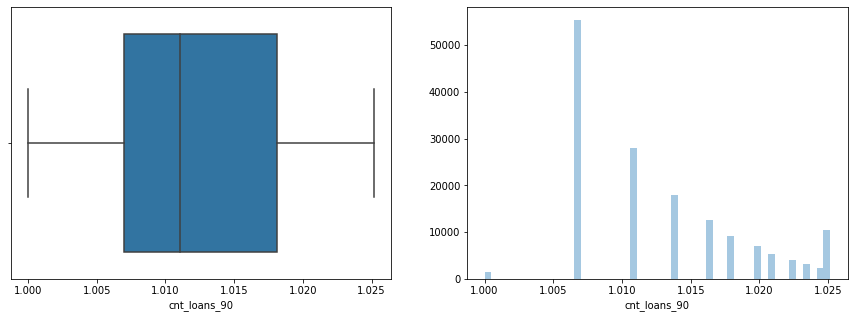

In [788]:
plot('cnt_loans_90')

In [107]:
# Now, lets extend the changes to test
test['cnt_loans_90'].values[test['cnt_loans_90'] > 11] = 11
test['cnt_loans_90']=np.power((test['cnt_loans_90']+1),0.01)

### amt_loans_90

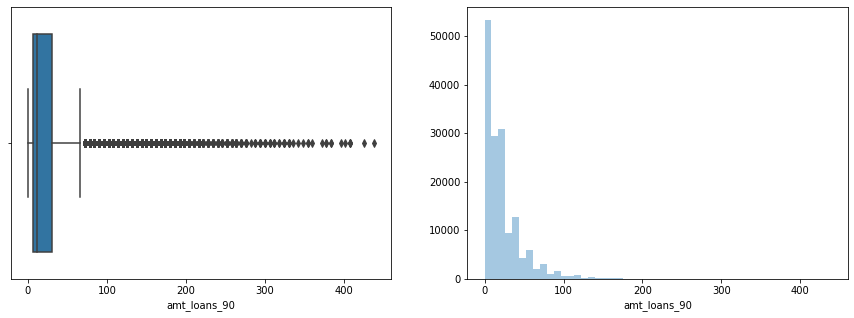

In [790]:
plot('amt_loans_90')

In [791]:
upper(train,'amt_loans_90')

66.0

In [108]:
train['amt_loans_90'].values[train['amt_loans_90'] > 66] = 66

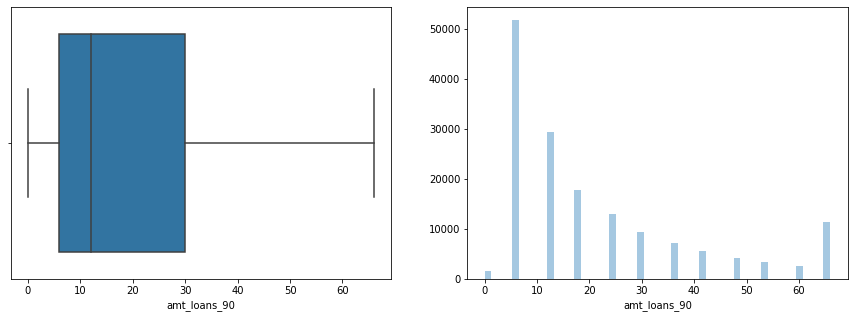

In [793]:
plot('amt_loans_90')

In [794]:
train['amt_loans_90'].skew()

1.2207026236656264

In [109]:
# Lets remove the skewness
print(np.sqrt((train['amt_loans_90']+1)).skew())
print(np.power((train['amt_loans_90']+1), 0.01).skew())
train['amt_loans_90']=np.power((train['amt_loans_90']+1),0.01)
print(train['amt_loans_90'].skew())

0.7393403226378736
0.016908923421981907
0.016908923421981907


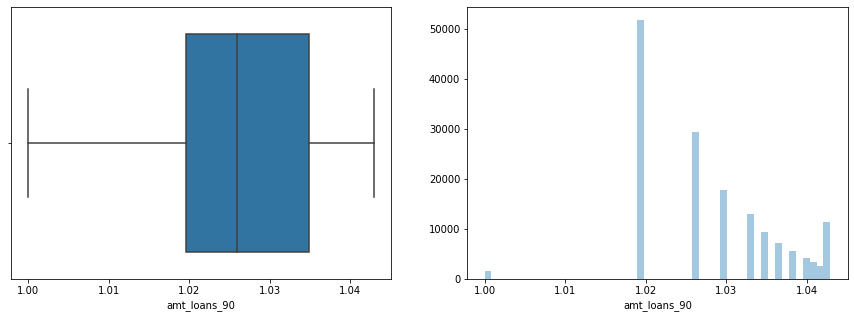

In [801]:
plot('amt_loans_90')

In [110]:
# Now, lets extend the changes to test
test['amt_loans_90'].values[test['amt_loans_90'] > 66] = 66
test['amt_loans_90']=np.power((test['amt_loans_90']+1),0.01)

In [ ]:
              
# payback_30, payback_90 (max is too high)
              
# Also check whether there are fraction values in the count columns

### max_amt_loans_90

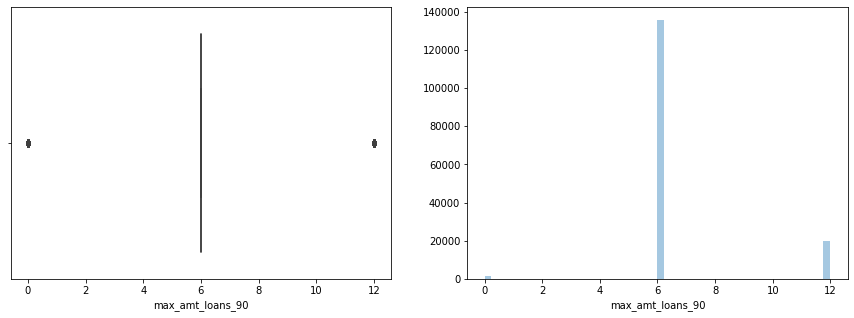

In [803]:
plot('max_amt_loans_90')

In [804]:
train['max_amt_loans_90'].skew()

1.681875251065019

In [111]:
# Lets remove the skewness
print(np.sqrt((train['max_amt_loans_90']+1)).skew())
print(np.power((train['max_amt_loans_90']+1), 0.37).skew())
train['max_amt_loans_90']=np.power((train['max_amt_loans_90']+1),0.37)
print(train['max_amt_loans_90'].skew())

0.5495315198993023
-0.0021538595450058327
-0.0021538595450058327


In [112]:
test['max_amt_loans_90']=np.power((test['max_amt_loans_90']+1),0.37)

### median_amt_loans_90

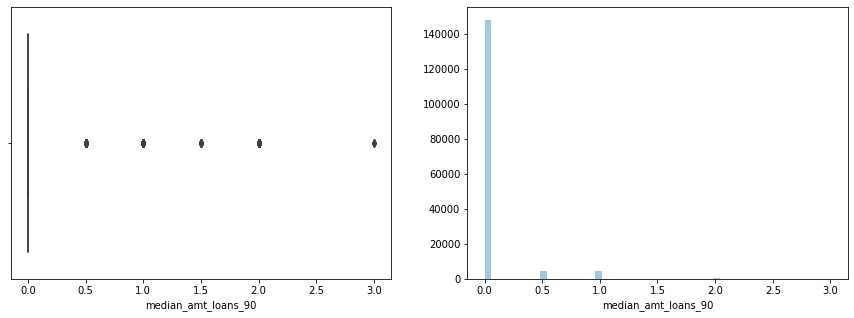

In [815]:
plot('median_amt_loans_90')

In [816]:
train['median_amt_loans_90'].skew()

4.8755372085355235

In [817]:
# Lets remove the skewness
print(np.sqrt((train['median_amt_loans_90']+1)).skew())
print(np.power((train['median_amt_loans_90']+1), 0.001).skew())
# train['median_amt_loans_90']=np.power((train['median_amt_loans_90']+1),0.37)
print(train['median_amt_loans_90'].skew())

4.543993892498988
4.323127436554862
4.8755372085355235


In [818]:
# skewness can't be removed

### payback_30

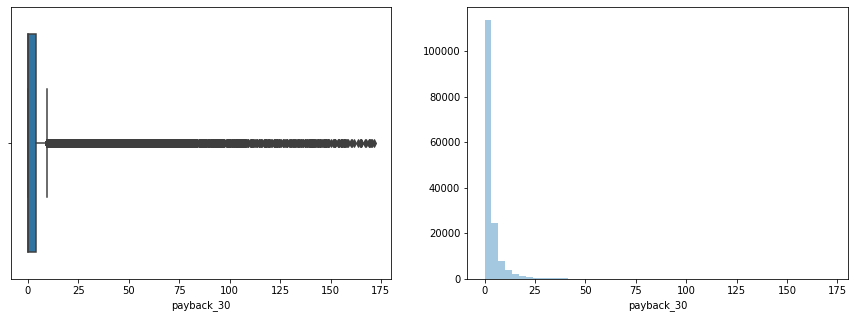

In [819]:
plot('payback_30')

In [821]:
upper(train,'payback_30')

9.375

In [113]:
train['payback_30'].values[train['payback_30'] > 9] = 9

In [823]:
train['payback_30'].skew()

1.141089821957283

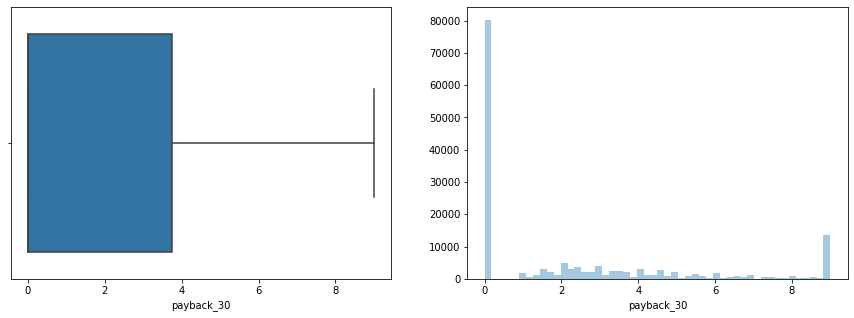

In [824]:
plot('payback_30')

In [114]:
# Lets remove the skewness
print(np.log((train['payback_30']+1)).skew())
print(np.power((train['payback_30']+1), 0.01).skew())
train['payback_30']=np.log((train['payback_30']+1))
print(train['payback_30'].skew())

0.4462119660796644
0.4514667294120521
0.4462119660796644


In [115]:
# Now, lets extend the changes to test
test['payback_30'].values[test['payback_30'] > 9] = 9
test['payback_30']=np.log((test['payback_30']+1))

### payback_90

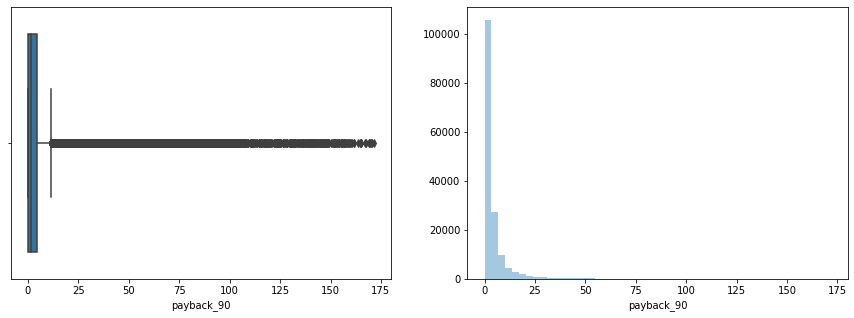

In [833]:
plot('payback_90')

In [834]:
upper(train,'payback_90')

11.25

In [116]:
train['payback_90'].values[train['payback_90'] > 11] = 11

In [836]:
train['payback_90'].skew()

1.1437191531357738

In [117]:
# Lets remove the skewness
print(np.log((train['payback_90']+1)).skew())
print(np.power((train['payback_90']+1), 0.001).skew())
train['payback_90']=np.log((train['payback_90']+1))
print(train['payback_90'].skew())

0.31389924147467274
0.3145480913094965
0.31389924147467274


In [118]:
# Now, lets extend the changes to test
test['payback_90'].values[test['payback_90'] > 11] = 11
test['payback_90']=np.log((test['payback_90']+1))

In [119]:
# Lets check for the outliers
outlier(train)

age_on_net                        0
daily_decr_30                     0
daily_decr_90                     0
rental_30                         0
rental_90                         0
last_rech_days_main               0
last_rech_amt_main                0
cnt_main_rech_30                  0
freq_main_rech_30                 0
sum_amt_main_rech_30              0
median_amt_main_rech_30           0
median_main_rech_prebal_30        0
cnt_main_rech_90                  0
freq_main_rech_90                 0
sum_amt_main_rech_90              0
median_amt_main_rech_90           0
median_main_rech_prebal_90        0
cnt_loans_30                      0
amt_loans_30                      0
max_amt_loans_30              22839
median_amt_loans_30           10673
cnt_loans_90                      0
amt_loans_90                      0
max_amt_loans_90              21518
median_amt_loans_90            9176
payback_30                        0
payback_90                        0
label                       

In [120]:
train.skew()

age_on_net                   -0.039099
daily_decr_30                 0.014499
daily_decr_90                 0.034887
rental_30                    -0.004955
rental_90                     0.012969
last_rech_days_main           0.105263
last_rech_amt_main           -0.002772
cnt_main_rech_30              0.028329
freq_main_rech_30             0.313608
sum_amt_main_rech_30          0.098466
median_amt_main_rech_30      -0.008415
median_main_rech_prebal_30    0.030928
cnt_main_rech_90              0.019482
freq_main_rech_90             0.270771
sum_amt_main_rech_90          0.075330
median_amt_main_rech_90       0.009294
median_main_rech_prebal_90    0.011134
cnt_loans_30                  0.473613
amt_loans_30                  0.012164
max_amt_loans_30              0.002757
median_amt_loans_30           4.524460
cnt_loans_90                  0.506894
amt_loans_90                  0.016909
max_amt_loans_90             -0.002154
median_amt_loans_90           4.875537
payback_30               

In [121]:
train.describe()

,age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,last_rech_amt_main,cnt_main_rech_30,freq_main_rech_30,sum_amt_main_rech_30,median_amt_main_rech_30,median_main_rech_prebal_30,cnt_main_rech_90,freq_main_rech_90,sum_amt_main_rech_90,median_amt_main_rech_90,median_main_rech_prebal_90,cnt_loans_30,amt_loans_30,max_amt_loans_30,median_amt_loans_30,cnt_loans_90,amt_loans_90,max_amt_loans_90,median_amt_loans_90,payback_30,payback_90,label
count,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000,157194.000000
mean,8.130698,4.103549,4.149304,8.318008,8.848757,1.014363,54.679378,1.309127,1.010702,70.697615,113.798589,3.272566,1.391959,1.012984,55.743012,108.817592,3.728558,1.151498,1.303312,2.745123,0.054468,1.013059,1.028292,2.111564,0.046373,0.792004,0.923294,0.875180
std,2.343186,2.001434,2.048202,3.960630,4.312893,0.008641,27.508359,0.190332,0.009994,43.093554,63.828249,1.498280,0.230403,0.011301,31.567459,56.004992,1.658818,0.504043,0.095766,0.389183,0.218957,0.006157,0.008384,0.207401,0.201316,0.874060,0.932114,0.330516
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.274305,2.125332,2.127550,5.428404,5.544630,1.006956,38.715057,1.148698,1.000000,39.255573,80.437005,2.270543,1.245731,1.000000,32.675084,75.453888,2.689212,0.693147,1.214814,2.645751,0.000000,1.006956,1.019650,2.054406,0.000000,0.000000,0.000000,1.000000
50%,8.087579,4.296387,4.317935,8.142515,8.663856,1.013959,56.641715,1.319508,1.011047,68.022055,126.988290,3.232529,1.379730,1.011047,54.516896,118.001756,3.669041,1.098612,1.292392,2.645751,0.000000,1.011047,1.025981,2.054406,0.000000,0.000000,0.980829,1.000000
75%,9.949748,5.915058,6.003211,11.430097,12.222782,1.021012,70.792392,1.430969,1.019650,100.049988,147.137809,4.315312,1.551846,1.022215,77.958990,136.420607,4.847332,1.609438,1.379730,2.645751,0.000000,1.018079,1.034936,2.054406,0.000000,1.558145,1.704748,1.000000
max,12.789510,7.099583,7.205708,14.815459,15.878821,1.028737,103.621449,1.643752,1.028114,150.708328,224.690176,5.668777,1.782602,1.030913,113.025465,206.808170,6.445704,2.197225,1.484569,3.605551,3.000000,1.025160,1.042943,2.583206,3.000000,2.302585,2.484907,1.000000


In [123]:
train.isnull().sum()

age_on_net                    0
daily_decr_30                 0
daily_decr_90                 0
rental_30                     0
rental_90                     0
last_rech_days_main           0
last_rech_amt_main            0
cnt_main_rech_30              0
freq_main_rech_30             0
sum_amt_main_rech_30          0
median_amt_main_rech_30       0
median_main_rech_prebal_30    0
cnt_main_rech_90              0
freq_main_rech_90             0
sum_amt_main_rech_90          0
median_amt_main_rech_90       0
median_main_rech_prebal_90    0
cnt_loans_30                  0
amt_loans_30                  0
max_amt_loans_30              0
median_amt_loans_30           0
cnt_loans_90                  0
amt_loans_90                  0
max_amt_loans_90              0
median_amt_loans_90           0
payback_30                    0
payback_90                    0
label                         0
dtype: int64

In [122]:
test.isnull().sum()

age_on_net                    0
daily_decr_30                 0
daily_decr_90                 0
rental_30                     0
rental_90                     0
last_rech_days_main           0
last_rech_amt_main            0
cnt_main_rech_30              0
freq_main_rech_30             0
sum_amt_main_rech_30          0
median_amt_main_rech_30       0
median_main_rech_prebal_30    0
cnt_main_rech_90              0
freq_main_rech_90             0
sum_amt_main_rech_90          0
median_amt_main_rech_90       0
median_main_rech_prebal_90    0
cnt_loans_30                  0
amt_loans_30                  0
max_amt_loans_30              0
median_amt_loans_30           0
cnt_loans_90                  0
amt_loans_90                  0
max_amt_loans_90              0
median_amt_loans_90           0
payback_30                    0
payback_90                    0
label                         0
dtype: int64

In [943]:
# test.dropna(inplace=True)

In [945]:
# There were 170 null values in daily_decr_30, we removed them

# Data Cleaning 2

In [139]:
train2=train.copy()
test2=test.copy()

In [846]:
# Now, instead of replacing all the -ve values with 0, we'll reverse the sign

In [848]:
# columns which need to be changed
# age_on_net,daily_decr_30,daily_decr_90,rental_30,rental_90,last_rech_days_main,median_main_rech_prebal_30
# median_main_rech_prebal_90

In [140]:
train2['age_on_net']=xtr['age_on_net']
train2['daily_decr_30']=xtr['daily_decr_30']
train2['daily_decr_90']=xtr['daily_decr_90']
train2['rental_30']=xtr['rental_30']
train2['rental_90']=xtr['rental_90']
train2['last_rech_days_main']=xtr['last_rech_days_main']
train2['median_main_rech_prebal_30']=xtr['median_main_rech_prebal_30']
train2['median_main_rech_prebal_90']=xtr['median_main_rech_prebal_90']

In [141]:
test2['age_on_net']=xte['age_on_net']
test2['daily_decr_30']=xte['daily_decr_30']
test2['daily_decr_90']=xte['daily_decr_90']
test2['rental_30']=xte['rental_30']
test2['rental_90']=xte['rental_90']
test2['last_rech_days_main']=xte['last_rech_days_main']
test2['median_main_rech_prebal_30']=xte['median_main_rech_prebal_30']
test2['median_main_rech_prebal_90']=xte['median_main_rech_prebal_90']

In [851]:
# Now, first we'll convert all the -ve values to +ve values

In [142]:
def negative(x):
    if x<0:
        return (-1*x)
    else:
        return x

In [128]:
# train2['age_on_net'] = train2['age_on_net'].apply(lambda x : negative(x))
# train2['daily_decr_30'] = train2['daily_decr_30'].apply(lambda x : negative(x))
# train2['daily_decr_90'] = train2['daily_decr_90'].apply(lambda x : negative(x))
# train2['rental_30'] = train2['rental_30'].apply(lambda x : negative(x))
# train2['rental_90'] = train2['rental_90'].apply(lambda x : negative(x))
# train2['last_rech_days_main'] = train2['last_rech_days_main'].apply(lambda x : negative(x))
# train2['median_main_rech_prebal_30'] = train2['median_main_rech_prebal_30'].apply(lambda x : negative(x))
# train2['median_main_rech_prebal_90'] = train2['median_main_rech_prebal_90'].apply(lambda x : negative(x))

In [129]:
# test2['age_on_net'] = test2['age_on_net'].apply(lambda x : negative(x))
# test2['daily_decr_30'] = test2['daily_decr_30'].apply(lambda x : negative(x))
# test2['daily_decr_90'] = test2['daily_decr_90'].apply(lambda x : negative(x))
# test2['rental_30'] = test2['rental_30'].apply(lambda x : negative(x))
# test2['rental_90'] = test2['rental_90'].apply(lambda x : negative(x))
# test2['last_rech_days_main'] = test2['last_rech_days_main'].apply(lambda x : negative(x))
# test2['median_main_rech_prebal_30'] = test2['median_main_rech_prebal_30'].apply(lambda x : negative(x))
# test2['median_main_rech_prebal_90'] = test2['median_main_rech_prebal_90'].apply(lambda x : negative(x))

In [143]:
train2=train2[train2['age_on_net']>=0]
train2=train2[train2['daily_decr_30']>=0]
train2=train2[train2['daily_decr_90']>=0]
train2=train2[train2['rental_30']>=0]
train2=train2[train2['rental_90']>=0]
train2=train2[train2['last_rech_days_main']>=0]
train2=train2[train2['median_main_rech_prebal_30']>=0]
train2=train2[train2['median_main_rech_prebal_90']>=0]

In [144]:
test2=test2[test2['age_on_net']>=0]
test2=test2[test2['daily_decr_30']>=0]
test2=test2[test2['daily_decr_90']>=0]
test2=test2[test2['rental_30']>=0]
test2=test2[test2['rental_90']>=0]
test2=test2[test2['last_rech_days_main']>=0]
test2=test2[test2['median_main_rech_prebal_30']>=0]
test2=test2[test2['median_main_rech_prebal_90']>=0]

In [145]:
train2.reset_index(drop=True, inplace=True)
test2.reset_index(drop=True, inplace=True)

In [146]:
# Now, lets treat for outliers
print(upper(train2, 'age_on_net'))
print(upper(train2, 'daily_decr_30'))
print(upper(train2, 'daily_decr_90'))
print(upper(train2, 'rental_30'))
print(upper(train2, 'rental_90'))
print(upper(train2, 'last_rech_days_main'))
print(upper(train2, 'median_main_rech_prebal_30'))
print(upper(train2, 'median_main_rech_prebal_90'))

2080.0
19056.036749999985
20631.425000000032
8404.0175
10500.807500000006
16.0
191.50500000000017
176.0


In [132]:
# train2['age_on_net'].values[train2['age_on_net'] > 2091] = 2091
# train2['daily_decr_30'].values[train2['daily_decr_30'] > 18036] = 18036
# train2['daily_decr_90'].values[train2['daily_decr_90'] > 19425] = 19425
# train2['rental_30'].values[train2['rental_30'] > 7965] = 7965
# train2['rental_90'].values[train2['rental_90'] > 10025] = 10025
# train2['last_rech_days_main'].values[train2['last_rech_days_main'] > 16] = 16
# train2['median_main_rech_prebal_30'].values[train2['median_main_rech_prebal_30'] > 195] = 195
# train2['median_main_rech_prebal_90'].values[train2['median_main_rech_prebal_90'] > 180] = 180

In [147]:
train2['age_on_net'].values[train2['age_on_net'] > 2080] = 2080
train2['daily_decr_30'].values[train2['daily_decr_30'] > 19056] = 19056
train2['daily_decr_90'].values[train2['daily_decr_90'] > 20631] = 20631
train2['rental_30'].values[train2['rental_30'] > 8404] = 8404
train2['rental_90'].values[train2['rental_90'] > 10500] = 10500
train2['last_rech_days_main'].values[train2['last_rech_days_main'] > 16] = 16
train2['median_main_rech_prebal_30'].values[train2['median_main_rech_prebal_30'] > 191] = 191
train2['median_main_rech_prebal_90'].values[train2['median_main_rech_prebal_90'] > 176] = 176

In [133]:
# test2['age_on_net'].values[test2['age_on_net'] > 2091] = 2091
# test2['daily_decr_30'].values[test2['daily_decr_30'] > 18036] = 18036
# test2['daily_decr_90'].values[test2['daily_decr_90'] > 19425] = 19425
# test2['rental_30'].values[test2['rental_30'] > 7965] = 7965
# test2['rental_90'].values[test2['rental_90'] > 10025] = 10025
# test2['last_rech_days_main'].values[test2['last_rech_days_main'] > 16] = 16
# test2['median_main_rech_prebal_30'].values[test2['median_main_rech_prebal_30'] > 195] = 195
# test2['median_main_rech_prebal_90'].values[test2['median_main_rech_prebal_90'] > 180] = 180

In [148]:
test2['age_on_net'].values[test2['age_on_net'] > 2080] = 2080
test2['daily_decr_30'].values[test2['daily_decr_30'] > 19056] = 19056
test2['daily_decr_90'].values[test2['daily_decr_90'] > 20631] = 20631
test2['rental_30'].values[test2['rental_30'] > 8404] = 8404
test2['rental_90'].values[test2['rental_90'] > 10500] = 10500
test2['last_rech_days_main'].values[test2['last_rech_days_main'] > 16] = 16
test2['median_main_rech_prebal_30'].values[test2['median_main_rech_prebal_30'] > 191] = 191
test2['median_main_rech_prebal_90'].values[test2['median_main_rech_prebal_90'] > 176] = 176

In [865]:
# Everything is okk

In [149]:
# Now, lets treat the skewness
print(train2['age_on_net'].skew())
print(train2['daily_decr_30'].skew())
print(train2['daily_decr_90'].skew())
print(train2['rental_30'].skew())
print(train2['rental_90'].skew())
print(train2['last_rech_days_main'].skew())
print(train2['median_main_rech_prebal_30'].skew())
print(train2['median_main_rech_prebal_90'].skew())

0.9578081837960849
1.2369314376085714
1.2379215498441292
1.2187468406639597
1.2013810588153375
1.1536193267123245
1.1001512491855108
1.081021565681061


In [150]:
print(np.power((train2['age_on_net']+1), 0.3).skew())
print(np.power((train2['daily_decr_30']+1), 0.2).skew())
print(np.power((train2['daily_decr_90']+1), 0.2).skew())
print(np.power((train2['rental_30']+1), 0.3).skew())
print(np.power((train2['rental_90']+1), 0.3).skew())
print(np.power((train2['last_rech_days_main']+1), 0.01).skew())
print(np.power((train2['median_main_rech_prebal_30']+1), 0.33).skew())
print(np.power((train2['median_main_rech_prebal_90']+1), 0.36).skew())

0.07565840276521157
-0.03449817837695223
-0.012140077697397752
0.049985235948726676
0.06043456388708166
0.10275250845578454
0.01019562326309762
0.0017546808491059045


In [151]:
train2['age_on_net']=np.power((train2['age_on_net']+1),0.3)
train2['daily_decr_30']=np.power((train2['daily_decr_30']+1),0.2)
train2['daily_decr_90']=np.power((train2['daily_decr_90']+1),0.2)
train2['rental_30']=np.power((train2['rental_30']+1),0.3)
train2['rental_90']=np.power((train2['rental_90']+1),0.3)
train2['last_rech_days_main']=np.power((train2['last_rech_days_main']+1),0.01)
train2['median_main_rech_prebal_30']=np.power((train2['median_main_rech_prebal_30']+1),0.33)
train2['median_main_rech_prebal_90']=np.power((train2['median_main_rech_prebal_90']+1),0.36)

In [152]:
test2['age_on_net']=np.power((test2['age_on_net']+1),0.3)
test2['daily_decr_30']=np.power((test2['daily_decr_30']+1),0.2)
test2['daily_decr_90']=np.power((test2['daily_decr_90']+1),0.2)
test2['rental_30']=np.power((test2['rental_30']+1),0.3)
test2['rental_90']=np.power((test2['rental_90']+1),0.3)
test2['last_rech_days_main']=np.power((test2['last_rech_days_main']+1),0.01)
test2['median_main_rech_prebal_30']=np.power((test2['median_main_rech_prebal_30']+1),0.33)
test2['median_main_rech_prebal_90']=np.power((test2['median_main_rech_prebal_90']+1),0.36)

In [138]:
# train3=train2.copy()
# test3=test2.copy()

In [892]:
# Now, train3 has become the data in which we replaced the -ve sign with +ve
# Now, we'll again re-write train2 and test2 such that this time, we'll remove the -ve values
# go back to the top and make the changes

In [918]:
# Data cleaning has been done
# Now, we'll do modelling on these three sets of data

In [153]:
test3.isnull().sum()

age_on_net                    0
daily_decr_30                 0
daily_decr_90                 0
rental_30                     0
rental_90                     0
last_rech_days_main           0
last_rech_amt_main            0
cnt_main_rech_30              0
freq_main_rech_30             0
sum_amt_main_rech_30          0
median_amt_main_rech_30       0
median_main_rech_prebal_30    0
cnt_main_rech_90              0
freq_main_rech_90             0
sum_amt_main_rech_90          0
median_amt_main_rech_90       0
median_main_rech_prebal_90    0
cnt_loans_30                  0
amt_loans_30                  0
max_amt_loans_30              0
median_amt_loans_30           0
cnt_loans_90                  0
amt_loans_90                  0
max_amt_loans_90              0
median_amt_loans_90           0
payback_30                    0
payback_90                    0
label                         0
dtype: int64

In [154]:
test.isnull().sum()

age_on_net                    0
daily_decr_30                 0
daily_decr_90                 0
rental_30                     0
rental_90                     0
last_rech_days_main           0
last_rech_amt_main            0
cnt_main_rech_30              0
freq_main_rech_30             0
sum_amt_main_rech_30          0
median_amt_main_rech_30       0
median_main_rech_prebal_30    0
cnt_main_rech_90              0
freq_main_rech_90             0
sum_amt_main_rech_90          0
median_amt_main_rech_90       0
median_main_rech_prebal_90    0
cnt_loans_30                  0
amt_loans_30                  0
max_amt_loans_30              0
median_amt_loans_30           0
cnt_loans_90                  0
amt_loans_90                  0
max_amt_loans_90              0
median_amt_loans_90           0
payback_30                    0
payback_90                    0
label                         0
dtype: int64

# Modelling Stage 1

In [919]:
# First, lets model the data without upsampling

In [155]:
xtrain=train.drop(['label'],axis=1)
ytrain=train['label']
xtest=test.drop(['label'],axis=1)
ytest=test['label']

In [156]:
rfc=RandomForestClassifier(n_jobs=-1, random_state=0)
rfc.fit(xtrain,ytrain)
p=rfc.predict(xtest)
print(accuracy_score(p,ytest))
print(f1_score(p,ytest))
print('\n\n')
print(classification_report(p,ytest))
print('\n\n')
print(confusion_matrix(p,ytest))

0.9132044504666119
0.9518648660090596



              precision    recall  f1-score   support

           0       0.44      0.76      0.56      3773
           1       0.98      0.92      0.95     48626

    accuracy                           0.91     52399
   macro avg       0.71      0.84      0.76     52399
weighted avg       0.94      0.91      0.92     52399




[[ 2883   890]
 [ 3658 44968]]


In [157]:
print('Logistic Regression')
print('\n')
lrc=LogisticRegression(n_jobs=-1, random_state=0)
lrc.fit(xtrain,ytrain)
p=lrc.predict(xtest)
print(accuracy_score(p,ytest))
print(f1_score(p,ytest))
print('\n\n')
print(classification_report(p,ytest))
print('\n\n')
print(confusion_matrix(p,ytest))

Logistic Regression


0.8816771312429627
0.9359504132231405



              precision    recall  f1-score   support

           0       0.14      0.62      0.22      1457
           1       0.99      0.89      0.94     50942

    accuracy                           0.88     52399
   macro avg       0.56      0.75      0.58     52399
weighted avg       0.96      0.88      0.92     52399




[[  899   558]
 [ 5642 45300]]


In [949]:
print('KNN')
print('\n')
knn=KNeighborsClassifier(n_jobs=-1)
knn.fit(xtrain,ytrain)
p=knn.predict(xtest)
print(accuracy_score(p,ytest))
print(f1_score(p,ytest))
print('\n\n')
print(classification_report(p,ytest))
print('\n\n')
print(confusion_matrix(p,ytest))

KNN


0.8961113557602098
0.9423587651645526



              precision    recall  f1-score   support

           0       0.38      0.63      0.47      3909
           1       0.97      0.92      0.94     48320

    accuracy                           0.90     52229
   macro avg       0.67      0.77      0.71     52229
weighted avg       0.92      0.90      0.91     52229




[[ 2449  1460]
 [ 3966 44354]]


In [950]:
print('GNB')
print('\n')
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
p=gnb.predict(xtest)
print(accuracy_score(p,ytest))
print(f1_score(p,ytest))
print('\n\n')
print(classification_report(p,ytest))
print('\n\n')
print(confusion_matrix(p,ytest))

GNB


0.7520151639893545
0.841565749235474



              precision    recall  f1-score   support

           0       0.76      0.30      0.43     16293
           1       0.75      0.96      0.84     35936

    accuracy                           0.75     52229
   macro avg       0.76      0.63      0.64     52229
weighted avg       0.75      0.75      0.71     52229




[[ 4878 11415]
 [ 1537 34399]]


In [951]:
print('XGBoosting')
print('\n')
xgb=XGBClassifier(n_jobs=-1,random_state=45)
xgb.fit(xtrain,ytrain)
p=xgb.predict(xtest)
print(accuracy_score(p,ytest))
print(f1_score(p,ytest))
print('\n\n')
print(classification_report(p,ytest))
print('\n\n')
print(confusion_matrix(p,ytest))

XGBoosting


0.9159470792088686
0.9534780212793014



              precision    recall  f1-score   support

           0       0.44      0.78      0.57      3679
           1       0.98      0.93      0.95     48550

    accuracy                           0.92     52229
   macro avg       0.71      0.85      0.76     52229
weighted avg       0.94      0.92      0.93     52229




[[ 2852   827]
 [ 3563 44987]]


In [952]:
print('DecisionTree')
print('\n')
dtc=DecisionTreeClassifier(random_state=45)
dtc.fit(xtrain,ytrain)
p=dtc.predict(xtest)
print(accuracy_score(p,ytest))
print(f1_score(p,ytest))
print('\n\n')
print(classification_report(p,ytest))
print('\n\n')
print(confusion_matrix(p,ytest))

DecisionTree


0.8665683815504797
0.92369011771147



              precision    recall  f1-score   support

           0       0.48      0.46      0.47      6718
           1       0.92      0.93      0.92     45511

    accuracy                           0.87     52229
   macro avg       0.70      0.69      0.70     52229
weighted avg       0.86      0.87      0.87     52229




[[ 3082  3636]
 [ 3333 42178]]


In [953]:
print('GradientBoosting')
print('\n')
gbc=GradientBoostingClassifier(random_state=45)
gbc.fit(xtrain,ytrain)
p=gbc.predict(xtest)
print(accuracy_score(p,ytest))
print(f1_score(p,ytest))
print('\n\n')
print(classification_report(p,ytest))
print('\n\n')
print(confusion_matrix(p,ytest))

GradientBoosting


0.910203143847288
0.9508148583174276



              precision    recall  f1-score   support

           0       0.34      0.82      0.48      2689
           1       0.99      0.92      0.95     49540

    accuracy                           0.91     52229
   macro avg       0.67      0.87      0.72     52229
weighted avg       0.96      0.91      0.93     52229




[[ 2207   482]
 [ 4208 45332]]


### Dataset 2

In [159]:
xtrain2=train2.drop(['label'],axis=1)
ytrain2=train2['label']
xtest2=test2.drop(['label'],axis=1)
ytest2=test2['label']

In [160]:
print('RandomForest')
print('\n')
rfc=RandomForestClassifier(n_jobs=-1, random_state=0)
rfc.fit(xtrain2,ytrain2)
p=rfc.predict(xtest2)
print(accuracy_score(p,ytest2))
print(f1_score(p,ytest2))
print('\n\n')
print(classification_report(p,ytest2))
print('\n\n')
print(confusion_matrix(p,ytest2))

RandomForest


0.9145316455696203
0.952921751935563



              precision    recall  f1-score   support

           0       0.42      0.75      0.54      3265
           1       0.98      0.93      0.95     46110

    accuracy                           0.91     49375
   macro avg       0.70      0.84      0.74     49375
weighted avg       0.94      0.91      0.93     49375




[[ 2446   819]
 [ 3401 42709]]


In [956]:
print('Logistic Regression')
print('\n')
lrc=LogisticRegression(n_jobs=-1, random_state=0)
lrc.fit(xtrain2,ytrain2)
p=lrc.predict(xtest2)
print(accuracy_score(p,ytest2))
print(f1_score(p,ytest2))
print('\n\n')
print(classification_report(p,ytest2))
print('\n\n')
print(confusion_matrix(p,ytest2))

Logistic Regression


0.886420253164557
0.938821373246351



              precision    recall  f1-score   support

           0       0.13      0.60      0.21      1237
           1       0.99      0.89      0.94     48138

    accuracy                           0.89     49375
   macro avg       0.56      0.75      0.57     49375
weighted avg       0.97      0.89      0.92     49375




[[  738   499]
 [ 5109 43029]]


In [957]:
print('KNN')
print('\n')
knn=KNeighborsClassifier(n_jobs=-1)
knn.fit(xtrain2,ytrain2)
p=knn.predict(xtest2)
print(accuracy_score(p,ytest2))
print(f1_score(p,ytest2))
print('\n\n')
print(classification_report(p,ytest2))
print('\n\n')
print(confusion_matrix(p,ytest2))

KNN


0.8998278481012658
0.9446446558477897



              precision    recall  f1-score   support

           0       0.38      0.63      0.47      3553
           1       0.97      0.92      0.94     45822

    accuracy                           0.90     49375
   macro avg       0.68      0.77      0.71     49375
weighted avg       0.93      0.90      0.91     49375




[[ 2227  1326]
 [ 3620 42202]]


In [958]:
print('GNB')
print('\n')
gnb=GaussianNB()
gnb.fit(xtrain2,ytrain2)
p=gnb.predict(xtest2)
print(accuracy_score(p,ytest2))
print(f1_score(p,ytest2))
print('\n\n')
print(classification_report(p,ytest2))
print('\n\n')
print(confusion_matrix(p,ytest2))

GNB


0.7531544303797468
0.8431362454632036



              precision    recall  f1-score   support

           0       0.76      0.29      0.42     15205
           1       0.75      0.96      0.84     34170

    accuracy                           0.75     49375
   macro avg       0.76      0.63      0.63     49375
weighted avg       0.75      0.75      0.71     49375




[[ 4432 10773]
 [ 1415 32755]]


In [959]:
print('XGBoosting')
print('\n')
xgb=XGBClassifier(n_jobs=-1,random_state=45)
xgb.fit(xtrain2,ytrain2)
p=xgb.predict(xtest2)
print(accuracy_score(p,ytest2))
print(f1_score(p,ytest2))
print('\n\n')
print(classification_report(p,ytest2))
print('\n\n')
print(confusion_matrix(p,ytest2))

XGBoosting


0.9174278481012659
0.9545266961865778



              precision    recall  f1-score   support

           0       0.43      0.77      0.55      3246
           1       0.98      0.93      0.95     46129

    accuracy                           0.92     49375
   macro avg       0.71      0.85      0.75     49375
weighted avg       0.95      0.92      0.93     49375




[[ 2508   738]
 [ 3339 42790]]


### Dataset 3

In [960]:
xtrain3=train3.drop(['label'],axis=1)
ytrain3=train3['label']
xtest3=test3.drop(['label'],axis=1)
ytest3=test3['label']

In [961]:
print('RandomForest')
print('\n')
rfc=RandomForestClassifier(n_jobs=-1, random_state=0)
rfc.fit(xtrain3,ytrain3)
p=rfc.predict(xtest3)
print(accuracy_score(p,ytest3))
print(f1_score(p,ytest3))
print('\n\n')
print(classification_report(p,ytest3))
print('\n\n')
print(confusion_matrix(p,ytest3))

RandomForest


0.9128800167942136
0.9516680606875523



              precision    recall  f1-score   support

           0       0.44      0.76      0.56      3806
           1       0.98      0.92      0.95     48593

    accuracy                           0.91     52399
   macro avg       0.71      0.84      0.76     52399
weighted avg       0.94      0.91      0.92     52399




[[ 2891   915]
 [ 3650 44943]]


In [962]:
print('Logistic Regression')
print('\n')
lrc=LogisticRegression(n_jobs=-1, random_state=0)
lrc.fit(xtrain3,ytrain3)
p=lrc.predict(xtest3)
print(accuracy_score(p,ytest3))
print(f1_score(p,ytest3))
print('\n\n')
print(classification_report(p,ytest3))
print('\n\n')
print(confusion_matrix(p,ytest3))

Logistic Regression


0.8813526975705643
0.9358006588254731



              precision    recall  f1-score   support

           0       0.13      0.61      0.22      1418
           1       0.99      0.89      0.94     50981

    accuracy                           0.88     52399
   macro avg       0.56      0.75      0.58     52399
weighted avg       0.96      0.88      0.92     52399




[[  871   547]
 [ 5670 45311]]


In [963]:
print('KNN')
print('\n')
knn=KNeighborsClassifier(n_jobs=-1)
knn.fit(xtrain3,ytrain3)
p=knn.predict(xtest3)
print(accuracy_score(p,ytest3))
print(f1_score(p,ytest3))
print('\n\n')
print(classification_report(p,ytest3))
print('\n\n')
print(confusion_matrix(p,ytest3))

KNN


0.8975743811904807
0.9430091427479214



              precision    recall  f1-score   support

           0       0.40      0.64      0.49      4084
           1       0.97      0.92      0.94     48315

    accuracy                           0.90     52399
   macro avg       0.69      0.78      0.72     52399
weighted avg       0.92      0.90      0.91     52399




[[ 2629  1455]
 [ 3912 44403]]


In [964]:
print('GNB')
print('\n')
gnb=GaussianNB()
gnb.fit(xtrain3,ytrain3)
p=gnb.predict(xtest3)
print(accuracy_score(p,ytest3))
print(f1_score(p,ytest3))
print('\n\n')
print(classification_report(p,ytest3))
print('\n\n')
print(confusion_matrix(p,ytest3))

GNB


0.7513120479398462
0.8406403248095291



              precision    recall  f1-score   support

           0       0.76      0.30      0.43     16486
           1       0.75      0.96      0.84     35913

    accuracy                           0.75     52399
   macro avg       0.76      0.63      0.64     52399
weighted avg       0.75      0.75      0.71     52399




[[ 4998 11488]
 [ 1543 34370]]


In [965]:
print('XGBoosting')
print('\n')
xgb=XGBClassifier(n_jobs=-1,random_state=45)
xgb.fit(xtrain3,ytrain3)
p=xgb.predict(xtest3)
print(accuracy_score(p,ytest3))
print(f1_score(p,ytest3))
print('\n\n')
print(classification_report(p,ytest3))
print('\n\n')
print(confusion_matrix(p,ytest3))

XGBoosting


0.9153609801713773
0.9530364801186001



              precision    recall  f1-score   support

           0       0.45      0.78      0.57      3822
           1       0.98      0.93      0.95     48577

    accuracy                           0.92     52399
   macro avg       0.72      0.85      0.76     52399
weighted avg       0.94      0.92      0.93     52399




[[ 2964   858]
 [ 3577 45000]]


In [966]:
# Models are not performing well due to imbalance in data

In [ ]:
# x=df.drop(['label'],axis=1)
# y=df['label']

# x1, xval, y1, yval = train_test_split(x,y,test_size=0.10,random_state=0,stratify=y)

# ov=SMOTE(n_jobs=-1)
# x1,y1=ov.fit_resample(x1,y1)

# xtrain3, xtest3, ytrain3, ytest3 = train_test_split(x1,y1,test_size=0.25,random_state=0,stratify=y1)

# Modelling Stage 2

### Dataset 2

In [161]:
# Lets now upsample the data to make it balanced
# But before that lets make a copy of our data

traincopy=train.copy()
train2copy=train2.copy()
train3copy=train3.copy()

testcopy=test.copy()
test2copy=test2.copy()
test3copy=test3.copy()

In [162]:
# Now, lets combine the entire data and then apply SMOTE first, then split into train and test

df=pd.concat([train3,test3],axis=0)

In [163]:
x=df.drop(['label'],axis=1)
y=df['label']

ov=SMOTE(n_jobs=-1)
x,y=ov.fit_resample(x,y)

In [164]:
y.value_counts()

1    183431
0    183431
Name: label, dtype: int64

In [165]:
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(x,y,test_size=0.25,random_state=0,stratify=y)

In [166]:
ytrain3.value_counts()

1    137573
0    137573
Name: label, dtype: int64

In [167]:
ytest3.value_counts()

1    45858
0    45858
Name: label, dtype: int64

In [168]:
print('RandomForest')
print('\n')
rfc=RandomForestClassifier(n_jobs=-1, random_state=0)
rfc.fit(xtrain3,ytrain3)
p=rfc.predict(xtest3)
print(accuracy_score(p,ytest3))
print(f1_score(p,ytest3))
print('\n\n')
print(classification_report(p,ytest3))
print('\n\n')
print(confusion_matrix(p,ytest3))

RandomForest


0.939203628592612
0.9395149043259428



              precision    recall  f1-score   support

           0       0.93      0.94      0.94     45386
           1       0.94      0.93      0.94     46330

    accuracy                           0.94     91716
   macro avg       0.94      0.94      0.94     91716
weighted avg       0.94      0.94      0.94     91716




[[42834  2552]
 [ 3024 43306]]


In [170]:
# Lets apply cross validation

from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,x,y,cv=5,n_jobs=-1)
print(score.mean(), score.std())

0.9370909877712444 0.049957328428138346


In [171]:
# The cross validation score is also ggod

In [173]:
# Lets tune the hyper parameters of the model as it is performing the best

from sklearn.model_selection import RandomizedSearchCV

p={'criterion':['gini', 'impurity'], 'max_depth':[2,4,6,8,10,12,15,20,25],'min_samples_split':[2,5,6,7,8,10],
  'n_estimators':[25,50,75,100,150,200]}
rfc=RandomForestClassifier(n_jobs=-1,random_state=45)
gkb=RandomizedSearchCV(estimator=rfc,param_distributions=p,
                          cv=4,n_iter=100,
                          n_jobs=-1, verbose=5,return_train_score=True,random_state=45)

gkb.fit(xtrain3, ytrain3)
gkb.best_params_

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 57.1min finished


{'n_estimators': 75,
 'min_samples_split': 2,
 'max_depth': 25,
 'criterion': 'gini'}

In [174]:
print('RandomForest')
print('\n')
rfc1=RandomForestClassifier(n_jobs=-1, random_state=0,n_estimators= 75,
 min_samples_split= 2,
 max_depth= 25,
 criterion= 'gini')
rfc1.fit(xtrain3,ytrain3)
p=rfc1.predict(xtest3)
print(accuracy_score(p,ytest3))
print(f1_score(p,ytest3))
print('\n\n')
print(classification_report(p,ytest3))
print('\n\n')
print(confusion_matrix(p,ytest3))

RandomForest


0.9338828557721662
0.9340711909369632



              precision    recall  f1-score   support

           0       0.93      0.94      0.93     45596
           1       0.94      0.93      0.93     46120

    accuracy                           0.93     91716
   macro avg       0.93      0.93      0.93     91716
weighted avg       0.93      0.93      0.93     91716




[[42695  2901]
 [ 3163 42957]]


In [175]:
p={'criterion':['gini', 'impurity'], 'max_depth':[20,22,23,25,27],'min_samples_split':[2,3,5,7,8,9,10],
  'n_estimators':[25,50,65,75,100,110,120]}
rfc=RandomForestClassifier(n_jobs=-1,random_state=45)
gkb=RandomizedSearchCV(estimator=rfc,param_distributions=p,
                          cv=4,n_iter=100,
                          n_jobs=-1, verbose=5,return_train_score=True,random_state=45)

gkb.fit(xtrain3, ytrain3)
gkb.best_params_

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 56.0min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 74.2min finished


{'n_estimators': 50,
 'min_samples_split': 2,
 'max_depth': 27,
 'criterion': 'gini'}

In [179]:
print('RandomForest')
print('\n')
rfc2=RandomForestClassifier(n_jobs=-1, random_state=0,n_estimators= 50,
 min_samples_split= 2,
 max_depth= 27,
 criterion= 'gini')
rfc2.fit(xtrain3,ytrain3)
p=rfc2.predict(xtest3)
print(accuracy_score(p,ytest3))
print(f1_score(p,ytest3))
print('\n\n')
print(classification_report(p,ytest3))
print('\n\n')
print(confusion_matrix(p,ytest3))

RandomForest


0.935278468315234
0.9354824685346608



              precision    recall  f1-score   support

           0       0.93      0.94      0.94     45568
           1       0.94      0.93      0.94     46148

    accuracy                           0.94     91716
   macro avg       0.94      0.94      0.94     91716
weighted avg       0.94      0.94      0.94     91716




[[42745  2823]
 [ 3113 43035]]


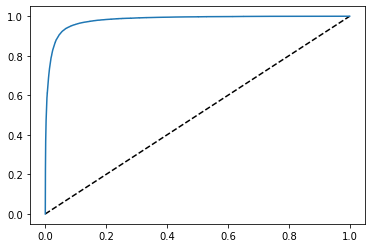

In [180]:

y_pred_pro=rfc2.predict_proba(xtest3)[:,1]
fpr,tpr,threshold=roc_curve(ytest3,y_pred_pro)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr,label='DTC')
plt.show()

In [181]:
roc_auc_score(ytest3,y_pred_pro)

0.9807590499542149

In [182]:
# AUC ROC score is also very good

In [177]:
# The results are good
# Lets cross validate it
score=cross_val_score(rfc2,x,y,cv=5,n_jobs=-1)
print(score.mean(), score.std())

0.9334084010309324 0.0491637614219216


In [178]:
# The model is not over fitting
# Lets save it

In [183]:
import joblib
joblib.dump(rfc2,'rfc2_micro_credit.pkl')

['rfc2_micro_credit.pkl']